In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_row',None)
pd.options.display.max_columns=226
pd.options.display.max_rows=8000

In [2]:
# Importing the data
data=pd.read_csv('telecom_churn_data.csv')

In [3]:
# Displaying the top 5 rows of the dataset
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# Displaying the number of rows and columns
data.shape

(99999, 226)

In [5]:
# Taking a backup of the original dataset
data_backup = data.copy()

In [6]:
data_backup.shape

(99999, 226)

In [7]:
# Finding the percentage of null values in each column
null_vals=pd.DataFrame(round(data.isnull().mean()*100,2))
null_vals.columns=['Null %']

# Removing columns which do not have any missing values
null_vals=null_vals[null_vals['Null %']!=0.00]

#  Displaying columns in decreasing order
null_vals.sort_values('Null %',ascending=False)

# count_rech_2g_6 , max_rech_data_6,av_rech_amt_data_6,count_rech_3g_6,total_rech_data_6,count_rech_3g_7,av_rech_amt_data_7,
# max_rech_data_7,av_rech_amt_data_9,av_rech_amt_data_8,count_rech_3g_8,max_rech_data_8,total_rech_data_8

Null %
count_rech_2g_6            74.85
max_rech_data_6            74.85
arpu_3g_6                  74.85
av_rech_amt_data_6         74.85
count_rech_3g_6            74.85
night_pck_user_6           74.85
arpu_2g_6                  74.85
fb_user_6                  74.85
total_rech_data_6          74.85
date_of_last_rech_data_6   74.85
count_rech_3g_7            74.43
arpu_3g_7                  74.43
av_rech_amt_data_7         74.43
fb_user_7                  74.43
total_rech_data_7          74.43
count_rech_2g_7            74.43
arpu_2g_7                  74.43
night_pck_user_7           74.43
max_rech_data_7            74.43
date_of_last_rech_data_7   74.43
date_of_last_rech_data_9   74.08
count_rech_2g_9            74.08
total_rech_data_9          74.08
count_rech_3g_9            74.08
max_rech_data_9            74.08
av_rech_amt_data_9         74.08
arpu_3g_9                  74.08
fb_user_9                  74.08
night_pck_user_9           74.08
arpu_2g_9                  74.08
av_rech_amt_data_8         73.66
fb_user_8                  73.66
night_pck_user_8           73.66
count_rech_2g_8            73.66
count_rech_3g_8            73.66
max_rech_data_8            73.66
date_of_last_rech_data_8   73.66
total_rech_data_8          73.66
arpu_3g_8                  73.66
arpu_2g_8                  73.66
roam_og_mou_9               7.75
std_og_t2c_mou_9            7.75
std_ic_t2f_mou_9            7.75
std_ic_t2m_mou_9            7.75
loc_ic_mou_9                7.75
std_og_mou_9                7.75
og_others_9                 7.75
std_ic_t2o_mou_9            7.75
isd_og_mou_9                7.75
offnet_mou_9                7.75
spl_og_mou_9                7.75
std_og_t2f_mou_9            7.75
std_og_t2m_mou_9            7.75
loc_ic_t2t_mou_9            7.75
std_ic_mou_9                7.75
loc_og_t2f_mou_9            7.75
ic_others_9                 7.75
loc_og_t2t_mou_9            7.75
loc_ic_t2m_mou_9            7.75
loc_og_t2c_mou_9            7.75
isd_ic_mou_9                7.75
loc_og_mou_9                7.75
loc_ic_t2f_mou_9            7.75
roam_ic_mou_9               7.75
spl_ic_mou_9                7.75
std_og_t2t_mou_9            7.75
loc_og_t2m_mou_9            7.75
onnet_mou_9                 7.75
std_ic_t2t_mou_9            7.75
std_ic_t2t_mou_8            5.38
loc_ic_mou_8                5.38
loc_og_t2m_mou_8            5.38
std_ic_t2m_mou_8            5.38
offnet_mou_8                5.38
std_ic_t2f_mou_8            5.38
roam_ic_mou_8               5.38
std_ic_t2o_mou_8            5.38
std_ic_mou_8                5.38
spl_ic_mou_8                5.38
onnet_mou_8                 5.38
isd_ic_mou_8                5.38
ic_others_8                 5.38
loc_ic_t2f_mou_8            5.38
isd_og_mou_8                5.38
roam_og_mou_8               5.38
loc_og_t2c_mou_8            5.38
std_og_t2t_mou_8            5.38
loc_ic_t2m_mou_8            5.38
std_og_t2f_mou_8            5.38
std_og_t2c_mou_8            5.38
loc_og_t2t_mou_8            5.38
std_og_mou_8                5.38
loc_og_mou_8                5.38
spl_og_mou_8                5.38
std_og_t2m_mou_8            5.38
og_others_8                 5.38
loc_og_t2f_mou_8            5.38
loc_ic_t2t_mou_8            5.38
date_of_last_rech_9         4.76
loc_og_t2c_mou_6            3.94
loc_og_mou_6                3.94
spl_ic_mou_6                3.94
ic_others_6                 3.94
std_og_t2t_mou_6            3.94
onnet_mou_6                 3.94
loc_og_t2m_mou_6            3.94
isd_ic_mou_6                3.94
loc_og_t2f_mou_6            3.94
std_og_t2m_mou_6            3.94
loc_ic_t2f_mou_6            3.94
std_ic_mou_6                3.94
std_og_t2f_mou_6            3.94
std_ic_t2m_mou_6            3.94
loc_ic_mou_6                3.94
roam_og_mou_6               3.94
loc_ic_t2t_mou_6            3.94
std_ic_t2t_mou_6            3.94
roam_ic_mou_6               3.94
og_others_6                 3.94
spl_og_mou_6                3.94
loc_og_t2t_mou_6            3.94


In [8]:
recharge_info=['max_rech_data_6','av_rech_amt_data_6','total_rech_data_6','av_rech_amt_data_7',
'max_rech_data_7','av_rech_amt_data_9','av_rech_amt_data_8','max_rech_data_8','total_rech_data_8','total_rech_data_7',
               'max_rech_data_9','total_rech_data_9']

data[recharge_info].describe()

max_rech_data_6  av_rech_amt_data_6  total_rech_data_6  \
count     25153.000000        25153.000000       25153.000000   
mean        126.393392          192.600982           2.463802   
std         108.477235          192.646318           2.789128   
min           1.000000            1.000000           1.000000   
25%          25.000000           82.000000           1.000000   
50%         145.000000          154.000000           1.000000   
75%         177.000000          252.000000           3.000000   
max        1555.000000         7546.000000          61.000000   

       av_rech_amt_data_7  max_rech_data_7  av_rech_amt_data_9  \
count        25571.000000     25571.000000        25922.000000   
mean           200.981292       126.729459          192.734315   
std            196.791224       109.765267          188.400286   
min              0.500000         1.000000            1.000000   
25%             92.000000        25.000000           69.000000   
50%            154.000000       145.000000          164.000000   
75%            252.000000       177.000000          252.000000   
max           4365.000000      1555.000000         4061.000000   

       av_rech_amt_data_8  max_rech_data_8  total_rech_data_8  \
count        26339.000000     26339.000000       26339.000000   
mean           197.526489       125.717301           2.651999   
std            191.301305       109.437851           3.074987   
min              0.500000         1.000000           1.000000   
25%             87.000000        25.000000           1.000000   
50%            154.000000       145.000000           1.000000   
75%            252.000000       179.000000           3.000000   
max           4076.000000      1555.000000          60.000000   

       total_rech_data_7  max_rech_data_9  total_rech_data_9  
count       25571.000000      25922.00000       25922.000000  
mean            2.666419        124.94144           2.441170  
std             3.031593        111.36376           2.516339  
min             1.000000          1.00000           1.000000  
25%             1.000000         25.00000           1.000000  
50%             1.000000        145.00000           2.000000  
75%             3.000000        179.00000           3.000000  
max            54.000000       1555.00000          84.000000

In [9]:
data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [10]:
# imputing 0 for recharge columns

data[recharge_info] = data[recharge_info].apply(lambda x: x.fillna(0))

data[recharge_info] .isnull().mean()*100

max_rech_data_6       0.0
av_rech_amt_data_6    0.0
total_rech_data_6     0.0
av_rech_amt_data_7    0.0
max_rech_data_7       0.0
av_rech_amt_data_9    0.0
av_rech_amt_data_8    0.0
max_rech_data_8       0.0
total_rech_data_8     0.0
total_rech_data_7     0.0
max_rech_data_9       0.0
total_rech_data_9     0.0
dtype: float64

In [11]:
# Finding the percentage of null values in each column
null_vals=pd.DataFrame(round(data.isnull().mean()*100,2))
null_vals.columns=['Null %']

# Removing columns which do not have any missing values
null_vals=null_vals[null_vals['Null %']!=0.00]

#  Displaying columns in decreasing order
null_vals.sort_values('Null %',ascending=False)



Null %
night_pck_user_6           74.85
count_rech_2g_6            74.85
count_rech_3g_6            74.85
arpu_2g_6                  74.85
arpu_3g_6                  74.85
fb_user_6                  74.85
date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
night_pck_user_7           74.43
arpu_2g_7                  74.43
fb_user_7                  74.43
count_rech_3g_7            74.43
arpu_3g_7                  74.43
count_rech_2g_7            74.43
date_of_last_rech_data_9   74.08
count_rech_3g_9            74.08
count_rech_2g_9            74.08
fb_user_9                  74.08
night_pck_user_9           74.08
arpu_3g_9                  74.08
arpu_2g_9                  74.08
night_pck_user_8           73.66
arpu_3g_8                  73.66
fb_user_8                  73.66
date_of_last_rech_data_8   73.66
count_rech_3g_8            73.66
count_rech_2g_8            73.66
arpu_2g_8                  73.66
std_og_t2c_mou_9            7.75
loc_ic_mou_9                7.75
std_og_mou_9                7.75
isd_og_mou_9                7.75
spl_og_mou_9                7.75
og_others_9                 7.75
loc_ic_t2m_mou_9            7.75
loc_ic_t2f_mou_9            7.75
std_ic_mou_9                7.75
std_ic_t2t_mou_9            7.75
std_ic_t2m_mou_9            7.75
std_ic_t2f_mou_9            7.75
std_ic_t2o_mou_9            7.75
spl_ic_mou_9                7.75
isd_ic_mou_9                7.75
ic_others_9                 7.75
std_og_t2m_mou_9            7.75
std_og_t2f_mou_9            7.75
loc_ic_t2t_mou_9            7.75
loc_og_t2m_mou_9            7.75
roam_ic_mou_9               7.75
loc_og_mou_9                7.75
std_og_t2t_mou_9            7.75
loc_og_t2t_mou_9            7.75
loc_og_t2c_mou_9            7.75
loc_og_t2f_mou_9            7.75
offnet_mou_9                7.75
onnet_mou_9                 7.75
roam_og_mou_9               7.75
roam_og_mou_8               5.38
loc_ic_t2m_mou_8            5.38
roam_ic_mou_8               5.38
loc_ic_mou_8                5.38
std_ic_t2t_mou_8            5.38
loc_og_t2c_mou_8            5.38
std_og_t2m_mou_8            5.38
std_ic_t2m_mou_8            5.38
std_ic_t2o_mou_8            5.38
loc_og_t2t_mou_8            5.38
std_ic_mou_8                5.38
loc_og_t2f_mou_8            5.38
spl_ic_mou_8                5.38
isd_ic_mou_8                5.38
loc_og_t2m_mou_8            5.38
ic_others_8                 5.38
loc_ic_t2t_mou_8            5.38
std_ic_t2f_mou_8            5.38
loc_ic_t2f_mou_8            5.38
std_og_mou_8                5.38
loc_og_mou_8                5.38
onnet_mou_8                 5.38
isd_og_mou_8                5.38
std_og_t2t_mou_8            5.38
std_og_t2c_mou_8            5.38
spl_og_mou_8                5.38
std_og_t2f_mou_8            5.38
offnet_mou_8                5.38
og_others_8                 5.38
date_of_last_rech_9         4.76
isd_ic_mou_6                3.94
loc_og_t2m_mou_6            3.94
onnet_mou_6                 3.94
loc_og_t2f_mou_6            3.94
std_og_t2c_mou_6            3.94
spl_ic_mou_6                3.94
std_ic_mou_6                3.94
std_og_mou_6                3.94
ic_others_6                 3.94
std_og_t2f_mou_6            3.94
std_ic_t2o_mou_6            3.94
std_og_t2m_mou_6            3.94
loc_og_t2c_mou_6            3.94
loc_ic_t2t_mou_6            3.94
loc_og_t2t_mou_6            3.94
isd_og_mou_6                3.94
roam_ic_mou_6               3.94
loc_ic_t2m_mou_6            3.94
loc_ic_t2f_mou_6            3.94
og_others_6                 3.94
loc_og_mou_6                3.94
loc_ic_mou_6                3.94
roam_og_mou_6               3.94
std_ic_t2f_mou_6            3.94
std_ic_t2t_mou_6            3.94
spl_og_mou_6                3.94
std_og_t2t_mou_6            3.94
std_ic_t2m_mou_6            3.94
offnet_mou_6                3.94
onnet_mou_7                 3.86
roam_og_mou_7               3.86
loc_og_t2m_mou_7            3.86
roam_ic_mou_7               3.86
loc_og_t2t_mou_7            3.86


In [12]:
# Removing all columns that have more than 40% of their data missing
for col in data:
    if data[col].isnull().mean()*100>=40:
        data.drop(col,axis=1,inplace=True)

# Number of rows and columns remaining
data.shape

(99999, 198)

In [13]:
# Displaying the top 5 rows after removing columns
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [14]:
# Displaying the percentiles of all numerical columns
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

# Using Simple Median/Mode to impute missing values

In [15]:
# Copying original dataframe into another dataframe
data_imputed=data.copy()

In [16]:
# Finding the % of missing values after removing columns which have no missing values
null_vals=pd.DataFrame(round(data_imputed.isnull().mean()*100,2))
null_vals.columns=['Null %']
null_vals=null_vals[null_vals['Null %']!=0.00]

In [17]:
# Imputing the median (for int and float datatypes) or mode (for date datatypes) for all null values in null_vals
for row in null_vals.index:
    if data_imputed[row].dtype in ['int32','int64','float32','float64']:
        data_imputed[row].fillna(data_imputed[row].median(),inplace=True)
    else:
        temp=data_imputed[row].mode()
        data_imputed[row].fillna(temp[0],inplace=True)

In [18]:
# Finding the percentage of null values in each column after imputation
null_vals=pd.DataFrame(round(data_imputed.isnull().mean()*100,2))
null_vals.columns=['Null %']
null_vals.sort_values('Null %',ascending=False)

Null %
mobile_number            0.0
total_ic_mou_9           0.0
spl_ic_mou_7             0.0
spl_ic_mou_8             0.0
spl_ic_mou_9             0.0
isd_ic_mou_6             0.0
isd_ic_mou_7             0.0
isd_ic_mou_8             0.0
isd_ic_mou_9             0.0
ic_others_6              0.0
ic_others_7              0.0
ic_others_8              0.0
ic_others_9              0.0
total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_rech_num_9         0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
total_rech_amt_9         0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
spl_ic_mou_6             0.0
total_ic_mou_8           0.0
max_rech_amt_9           0.0
total_ic_mou_7           0.0
std_ic_t2t_mou_6         0.0
std_ic_t2t_mou_7         0.0
std_ic_t2t_mou_8         0.0
std_ic_t2t_mou_9         0.0
std_ic_t2m_mou_6         0.0
std_ic_t2m_mou_7         0.0
std_ic_t2m_mou_8         0.0
std_ic_t2m_mou_9         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_8         0.0
std_ic_t2f_mou_9         0.0
std_ic_t2o_mou_6         0.0
std_ic_t2o_mou_7         0.0
std_ic_t2o_mou_8         0.0
std_ic_t2o_mou_9         0.0
std_ic_mou_6             0.0
std_ic_mou_7             0.0
std_ic_mou_8             0.0
std_ic_mou_9             0.0
total_ic_mou_6           0.0
max_rech_amt_8           0.0
date_of_last_rech_6      0.0
circle_id                0.0
vol_3g_mb_7              0.0
vol_3g_mb_9              0.0
monthly_2g_6             0.0
monthly_2g_7             0.0
monthly_2g_8             0.0
monthly_2g_9             0.0
sachet_2g_6              0.0
sachet_2g_7              0.0
sachet_2g_8              0.0
sachet_2g_9              0.0
monthly_3g_6             0.0
monthly_3g_7             0.0
monthly_3g_8             0.0
monthly_3g_9             0.0
sachet_3g_6              0.0
sachet_3g_7              0.0
sachet_3g_8              0.0
sachet_3g_9              0.0
aon                      0.0
aug_vbc_3g               0.0
jul_vbc_3g               0.0
jun_vbc_3g               0.0
vol_3g_mb_8              0.0
vol_3g_mb_6              0.0
date_of_last_rech_7      0.0
vol_2g_mb_9              0.0
date_of_last_rech_8      0.0
date_of_last_rech_9      0.0
last_day_rch_amt_6       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_8       0.0
last_day_rch_amt_9       0.0
total_rech_data_6        0.0
total_rech_data_7        0.0
total_rech_data_8        0.0
total_rech_data_9        0.0
max_rech_data_6          0.0
max_rech_data_7          0.0
max_rech_data_8          0.0
max_rech_data_9          0.0
av_rech_amt_data_6       0.0
av_rech_amt_data_7       0.0
av_rech_amt_data_8       0.0
av_rech_amt_data_9       0.0
vol_2g_mb_6              0.0
vol_2g_mb_7              0.0
vol_2g_mb_8              0.0
loc_ic_mou_9             0.0
loc_ic_mou_8             0.0
loc_ic_mou_7             0.0
roam_og_mou_6            0.0
roam_og_mou_8            0.0
roam_og_mou_9            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2t_mou_9         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2m_mou_9         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2f_mou_9         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou_8         0.0
loc_og_t2c_mou_9         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
roam_og_mou_7            0.0
roam_ic_mou_9            0.0
loc_ic_mou_6             0.0
roam_ic_mou_8            0.0
loc_og_t2o_mou           0.0
std_og_t2o_mou           0.0
loc_ic_t2o_mou           0.0
last_date_of_month_6     0.0
last_date_of_month_7     0.0
last_date_of_month_8     0.0
last_date_of_month_9     0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
arpu_9              

There are no missing values in any column

In [19]:
null_vals.shape

(198, 1)

No column has missing values

## Filtering High Value Customer

#### Total data recharge amount for the month of june and july

In [20]:
data_imputed['total_data_recharge_6']=data_imputed['total_rech_data_6']*data_imputed['av_rech_amt_data_6']
data_imputed['total_data_recharge_7']=data_imputed['total_rech_data_7']*data_imputed['av_rech_amt_data_7'] #


#### Total recharge amount  for the month of june and july

In [21]:
data_imputed['total_recharge_6']=data_imputed['total_data_recharge_6']+data_imputed['total_rech_amt_6']
data_imputed['total_recharge_7']=data_imputed['total_data_recharge_7'] + data_imputed['total_rech_amt_7']


#### average recharge done by customer in june and july

In [22]:
data_imputed['avg_recharge_6_7']=(data_imputed['total_recharge_6']+data_imputed['total_recharge_7'])/2

#### 70th percentile recharge amount

In [23]:
data_imputed['avg_recharge_6_7'].quantile(0.7)

478.0

#### Filtering out high value customers (hvc)

In [24]:
hvc_filtered = data_imputed.loc[data_imputed.avg_recharge_6_7 >= data_imputed.avg_recharge_6_7.quantile(0.7), :]
hvc_filtered = hvc_filtered.reset_index(drop=True)
hvc_filtered.shape

(30001, 203)

In [25]:
hvc_filtered.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7000701601        109             0.0             0.0             0.0   
2     7001524846        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7000887461        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100        34.31   
1            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
2            9/30/2014   378.721   492.223   137.362  166.787       413.69   
3            9/30/2014   514.453   597.753   637.760  578.596       102.41   
4            9/30/2014    74.350   193.897   366.966  811.480        48.96   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0        32.33         0.00        29.84         96.31        91.735   
1        54.68        52.29        29.84        453.43       567.160   
2       351.03        35.08        33.46         94.66        80.630   
3       132.11        85.14       161.63        757.93       896.680   
4        50.66        33.58        15.74         85.41        89.360   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00         87.29           0.00           0.00           0.00   
1        325.91         87.29          16.23          33.49          31.64   
2        136.48        108.71           0.00           0.00           0.00   
3        983.39        869.89           0.00           0.00           0.00   
4        205.89        111.88           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.0           0.00           0.00           0.00            0.0   
1            0.0          23.74          12.59          38.06            0.0   
2            0.0           0.00           0.00           0.00            0.0   
3            0.0           0.00           0.00           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0             11.91             11.61              0.00             11.26   
1             51.39             31.38             40.28             11.26   
2            297.13            217.59             12.49             26.13   
3              4.48              6.16             23.34             29.98   
4             48.96             50.66             33.58             15.74   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0             41.03             40.43              0.00             39.12   
1            308.63            447.38            162.28             39.12   
2             80.96             70.58             50.54             34.58   
3             91.81             87.93            104.81            107.54   
4             82.94             83.01            148.56             83.73   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1             62.13             55.14             53.23              0.00   
2              0.00              0.00              0.00              0.00   
3              0.75              

In [26]:
hvc_filtered=hvc_filtered.drop(['total_data_recharge_6','total_data_recharge_7','total_recharge_6','total_recharge_7','avg_recharge_6_7'], axis=1)
hvc_filtered.shape

(30001, 198)

In [27]:
hvc_filtered.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7000701601        109             0.0             0.0             0.0   
2     7001524846        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7000887461        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100        34.31   
1            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
2            9/30/2014   378.721   492.223   137.362  166.787       413.69   
3            9/30/2014   514.453   597.753   637.760  578.596       102.41   
4            9/30/2014    74.350   193.897   366.966  811.480        48.96   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0        32.33         0.00        29.84         96.31        91.735   
1        54.68        52.29        29.84        453.43       567.160   
2       351.03        35.08        33.46         94.66        80.630   
3       132.11        85.14       161.63        757.93       896.680   
4        50.66        33.58        15.74         85.41        89.360   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00         87.29           0.00           0.00           0.00   
1        325.91         87.29          16.23          33.49          31.64   
2        136.48        108.71           0.00           0.00           0.00   
3        983.39        869.89           0.00           0.00           0.00   
4        205.89        111.88           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.0           0.00           0.00           0.00            0.0   
1            0.0          23.74          12.59          38.06            0.0   
2            0.0           0.00           0.00           0.00            0.0   
3            0.0           0.00           0.00           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0             11.91             11.61              0.00             11.26   
1             51.39             31.38             40.28             11.26   
2            297.13            217.59             12.49             26.13   
3              4.48              6.16             23.34             29.98   
4             48.96             50.66             33.58             15.74   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0             41.03             40.43              0.00             39.12   
1            308.63            447.38            162.28             39.12   
2             80.96             70.58             50.54             34.58   
3             91.81             87.93            104.81            107.54   
4             82.94             83.01            148.56             83.73   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1             62.13             55.14             53.23              0.00   
2              0.00              0.00              0.00              0.00   
3              0.75              

## Deriving usage-based churn for 9th month

#### Total incoming and outgoing minutes of usage

In [28]:
hvc_filtered['total_mou_9']=hvc_filtered['total_ic_mou_9'] + hvc_filtered['total_og_mou_9']

#### 2g and 3g data consumption

In [29]:
hvc_filtered['total_vol_2g_3g_9'] = hvc_filtered['vol_2g_mb_9']+hvc_filtered['vol_3g_mb_9']

#### creating churn variable : customers who have not used calls or internet in the month of September



In [30]:
hvc_filtered['churn']=hvc_filtered.apply(lambda i:1 if (i.total_mou_9==0 and i.total_vol_2g_3g_9==0)else 0 ,axis=1)



#### churn percentile

In [31]:
hvc_filtered.churn.value_counts()*100/len(hvc_filtered)

0    91.863605
1     8.136395
Name: churn, dtype: float64

There is high class imbalance in this dataset. Due to this, instead of using accuracy as a performance metric, it is better to use precision and sensitivity

#### deleting columns that belong to churn month



In [32]:
# hvc_filtered = hvc_filtered.drop(['total_mou_9', 'total_vol_2g_3g_9'], axis=1)

# Creating a list of all column names which has 9 in the name
target_var=[]
for col in hvc_filtered.columns:
    if '9' in col:
        target_var.append(col)
        
hvc_filtered.drop(target_var,axis=1,inplace=True)

In [33]:
hvc_filtered.shape

(30001, 152)

In [34]:
# Finding unique values of all columns
hvc_filtered.nunique().sort_values(ascending=False)

mobile_number           30001
arpu_7                  29084
arpu_6                  29072
arpu_8                  28073
total_og_mou_7          23684
total_og_mou_6          23519
total_og_mou_8          22316
offnet_mou_7            21264
offnet_mou_6            21220
offnet_mou_8            20164
total_ic_mou_7          20161
total_ic_mou_6          20121
total_ic_mou_8          19581
loc_ic_mou_6            18525
loc_og_mou_7            18503
loc_ic_mou_7            18497
loc_og_mou_6            18348
loc_ic_mou_8            18069
loc_og_mou_8            17583
onnet_mou_7             16987
onnet_mou_6             16890
std_og_mou_7            15958
std_og_mou_6            15922
onnet_mou_8             15872
loc_og_t2m_mou_7        15674
loc_og_t2m_mou_6        15625
loc_ic_t2m_mou_7        15547
loc_ic_t2m_mou_6        15461
loc_og_t2m_mou_8        15130
loc_ic_t2m_mou_8        15122
std_og_mou_8            14719
std_og_t2m_mou_7        12889
std_og_t2m_mou_6        12875
std_og_t2m

In [35]:
one_val=['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']
for x in one_val:
    print(x,'=',hvc_filtered[x].unique())

circle_id = [109]
loc_og_t2o_mou = [0.]
std_og_t2o_mou = [0.]
loc_ic_t2o_mou = [0.]
std_og_t2c_mou_6 = [0.]
std_og_t2c_mou_7 = [0.]
std_og_t2c_mou_8 = [0.]
std_ic_t2o_mou_6 = [0.]
std_ic_t2o_mou_7 = [0.]
std_ic_t2o_mou_8 = [0.]


Since value in one_val is only 0. Dropping these columns will not affect the dataset/results negatively.

In [36]:
# Dropping columns which have just one unique value
hvc_filtered.drop(one_val,axis=1,inplace=True)

In [37]:
hvc_filtered.shape

(30001, 142)

In [38]:
# Retrieving numerical columns from the dataset
num_var=[]
for col in hvc_filtered.columns:
    if hvc_filtered[col].dtype in ['int32','int64','float32','float64']:
        num_var.append(col)

In [39]:
# Dropping 'mobile_number' and 'churn' from num_var
num_var.remove('mobile_number')
num_var.remove('churn')

# Dropping sachet and monthly service schemes since these numbers represent categorical variable
# num_var.remove('monthly_2g_8')
# num_var.remove('monthly_2g_7')
# num_var.remove('monthly_2g_6')
# num_var.remove('monthly_3g_8')
# num_var.remove('monthly_3g_7')
# num_var.remove('monthly_3g_6')
# num_var.remove('sachet_3g_6')
# num_var.remove('sachet_3g_7')
# num_var.remove('sachet_3g_8')
# num_var.remove('sachet_2g_6')
# num_var.remove('sachet_2g_7')
# num_var.remove('sachet_2g_8')

##### Checking the distribution of each column

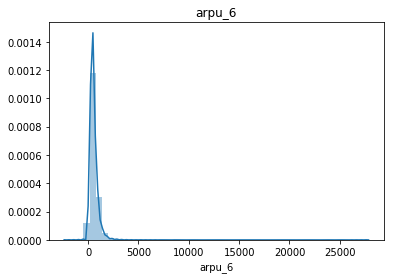

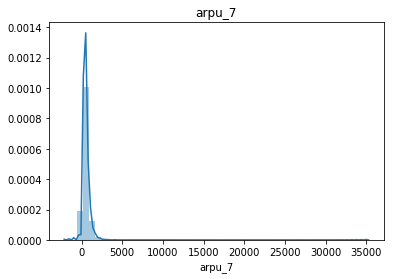

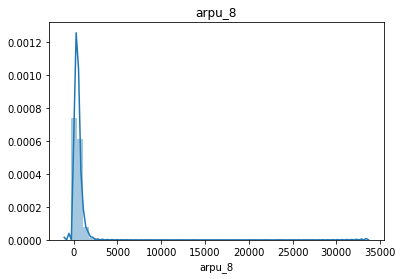

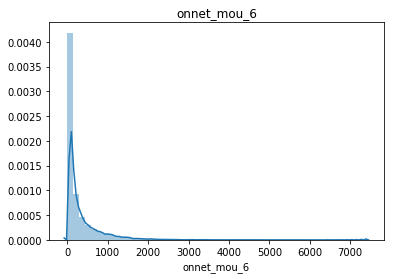

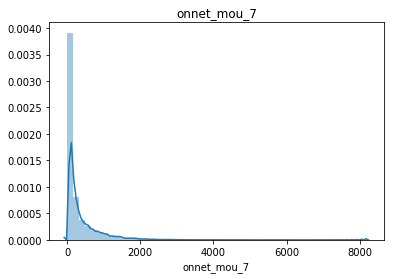

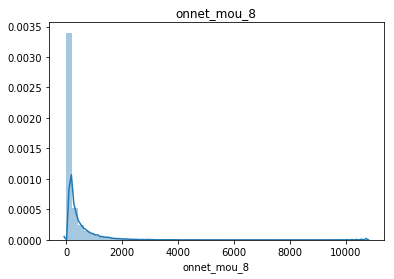

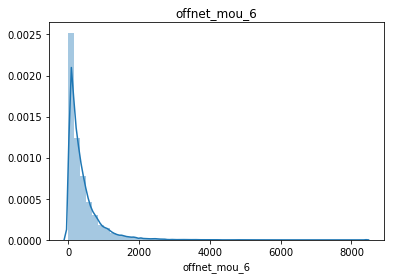

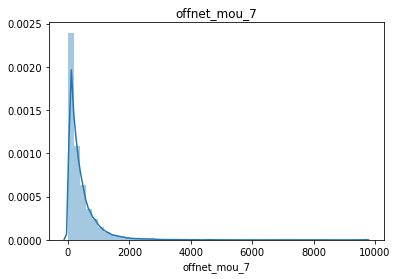

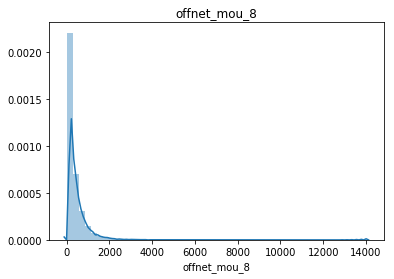

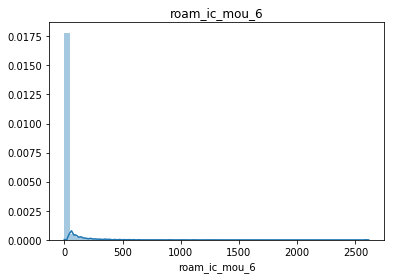

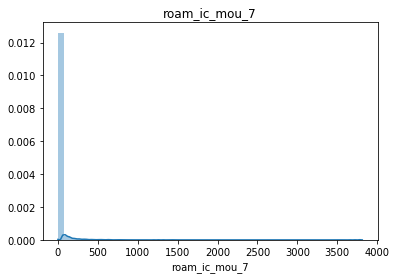

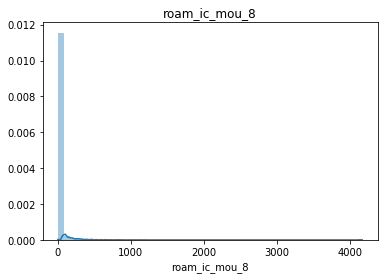

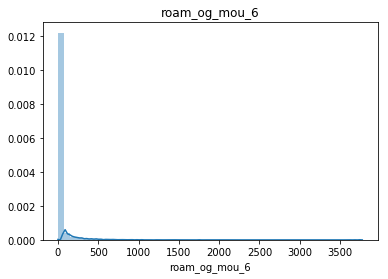

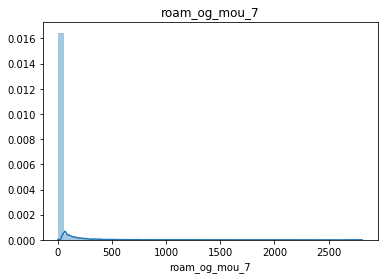

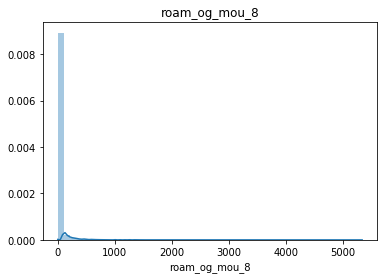

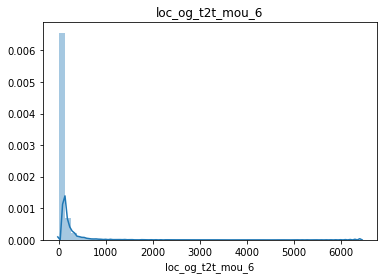

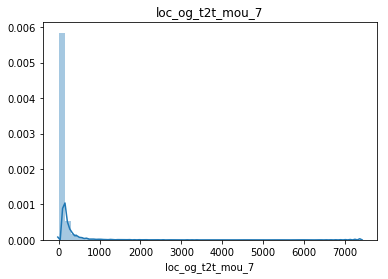

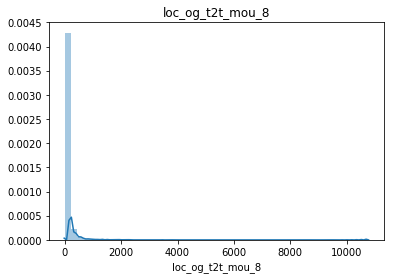

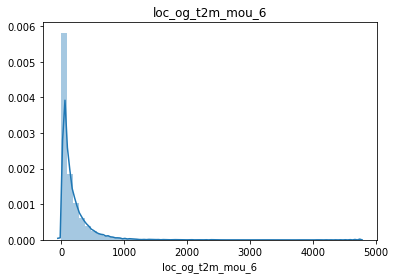

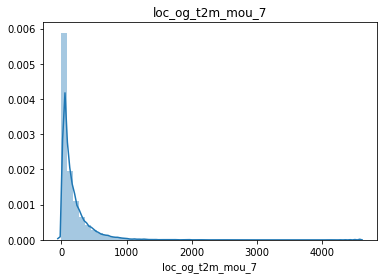

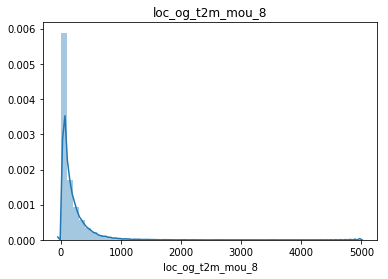

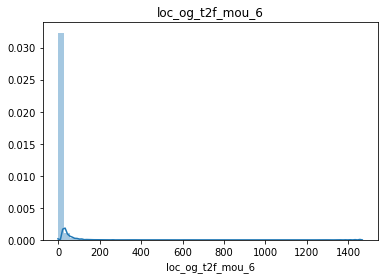

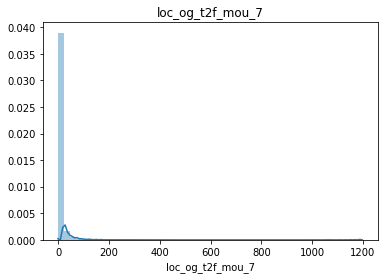

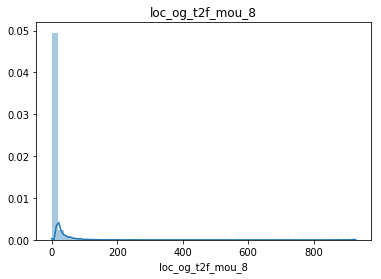

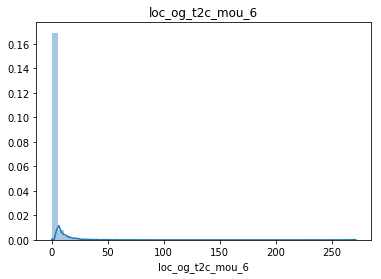

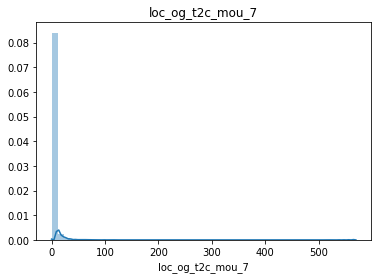

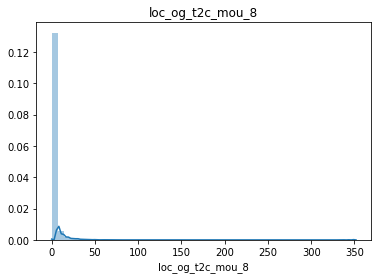

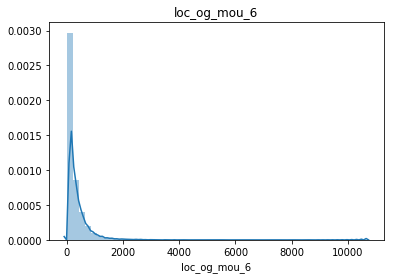

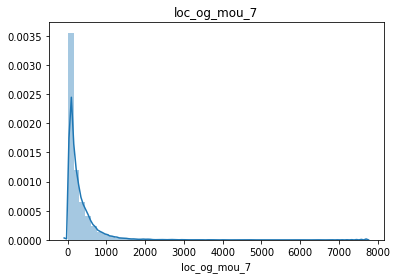

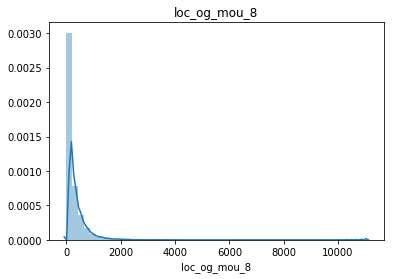

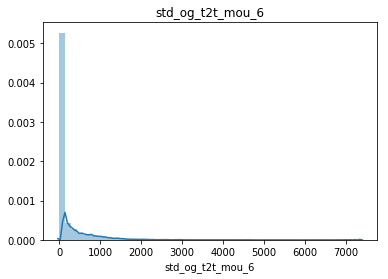

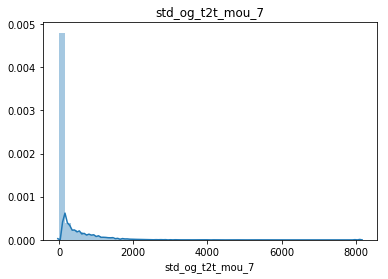

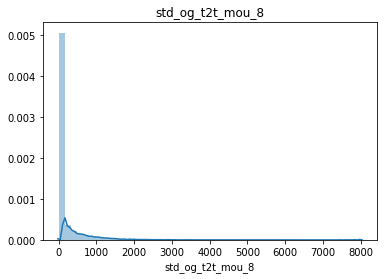

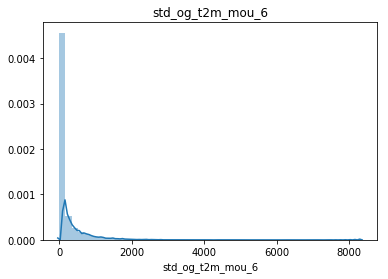

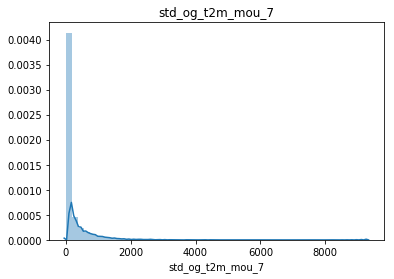

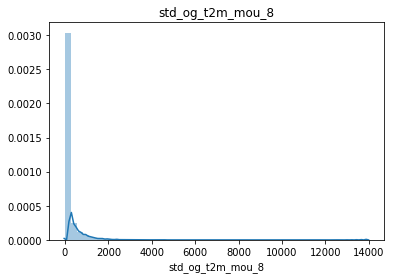

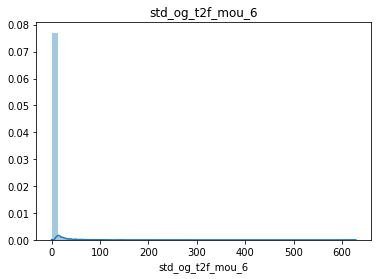

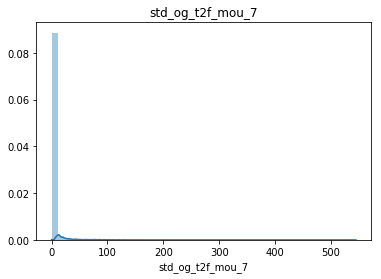

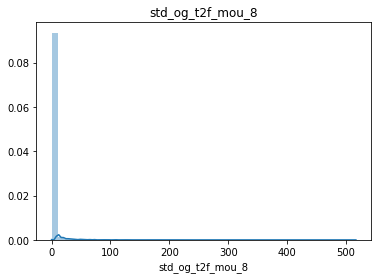

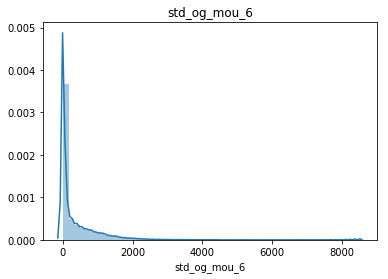

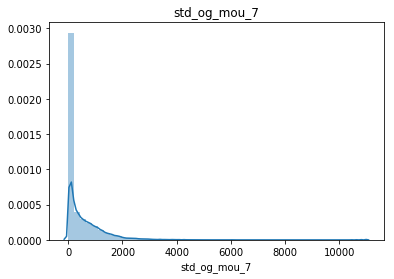

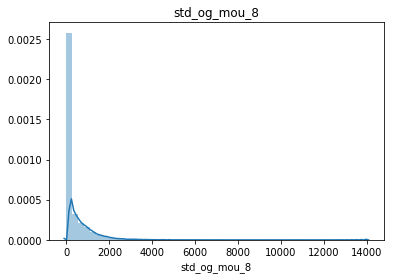

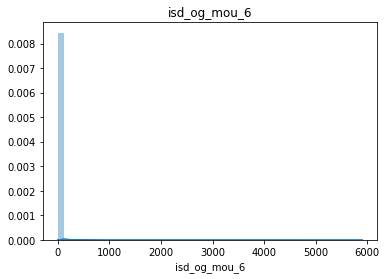

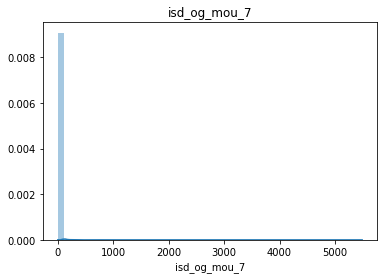

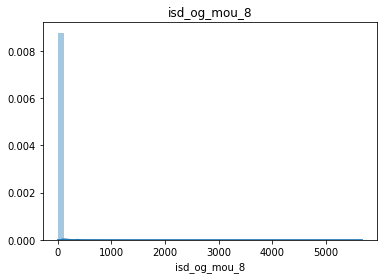

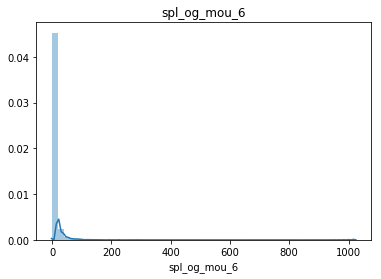

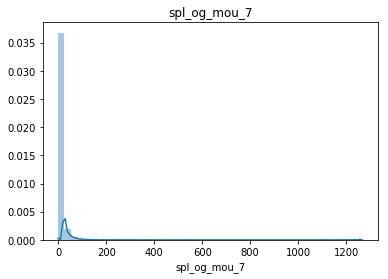

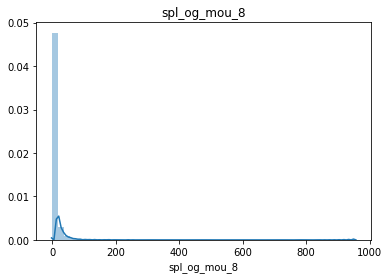

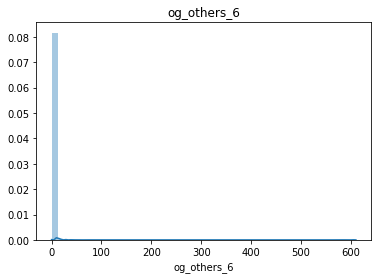

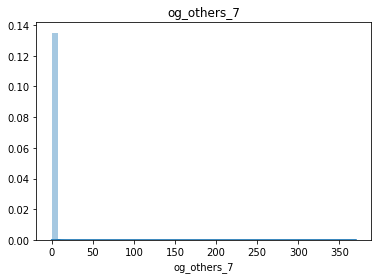

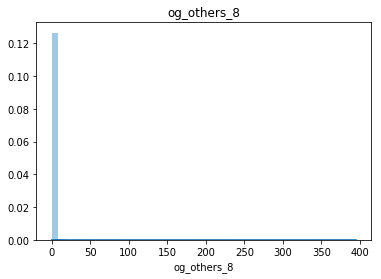

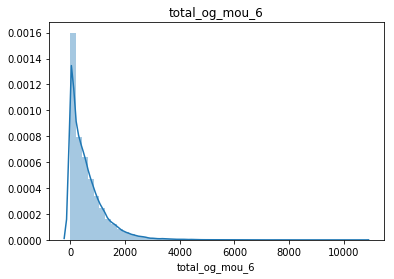

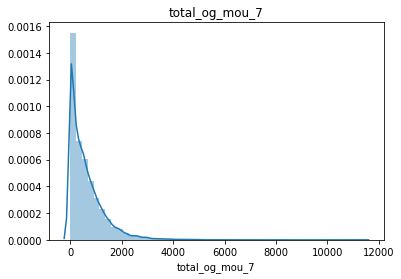

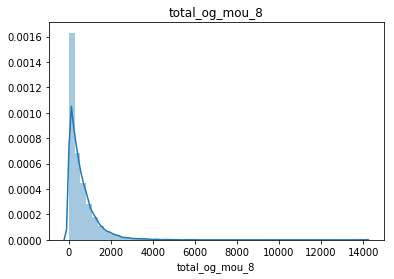

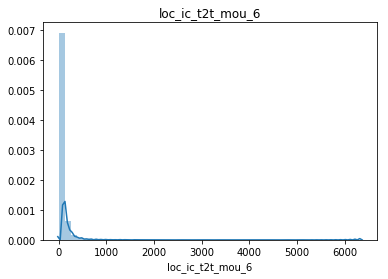

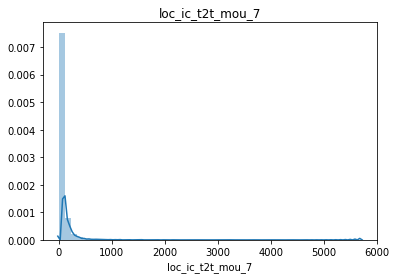

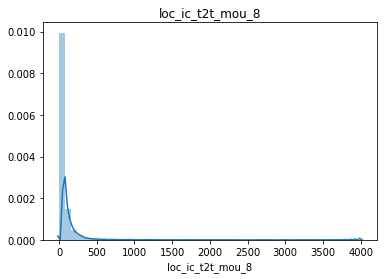

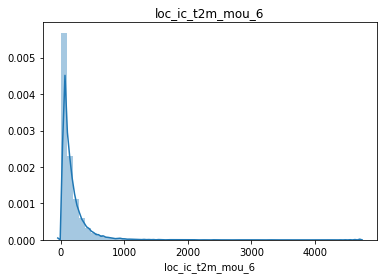

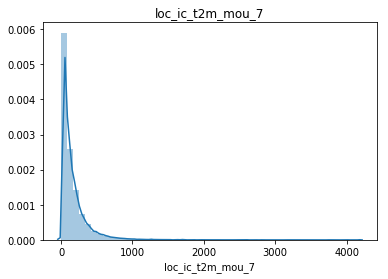

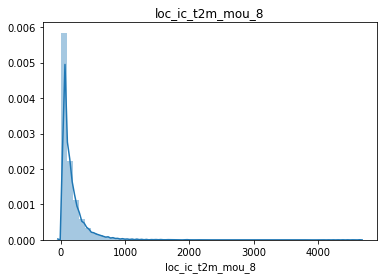

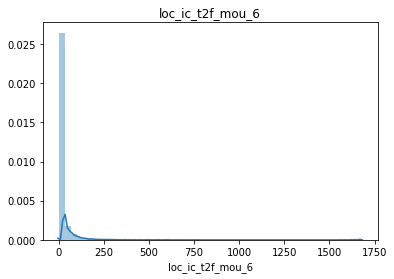

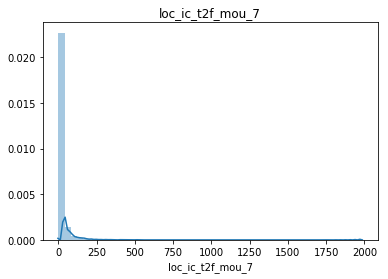

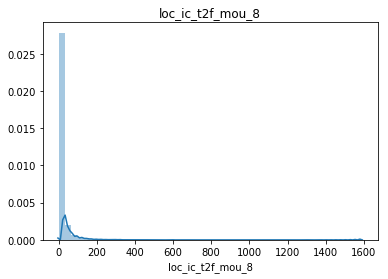

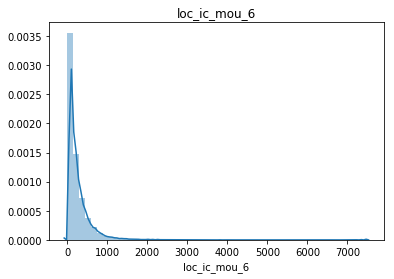

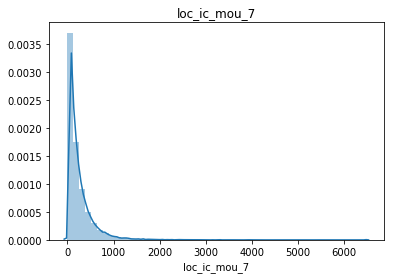

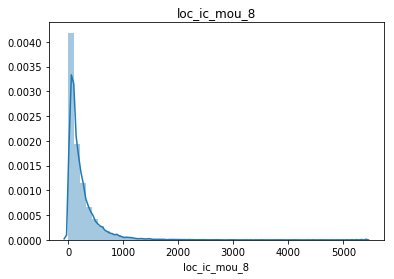

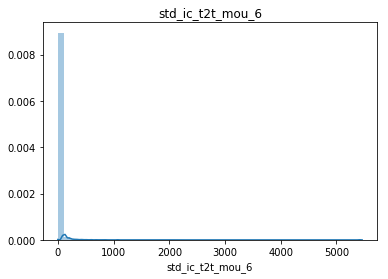

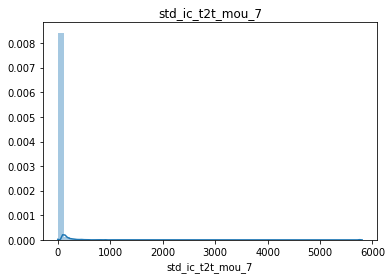

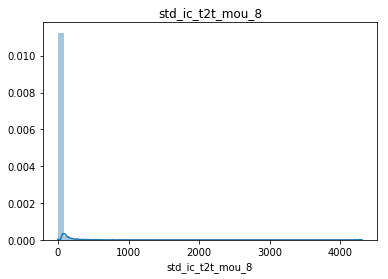

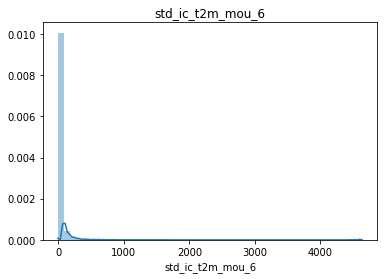

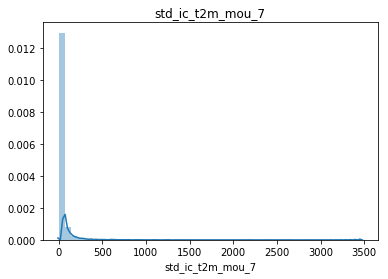

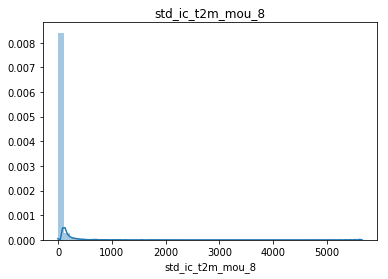

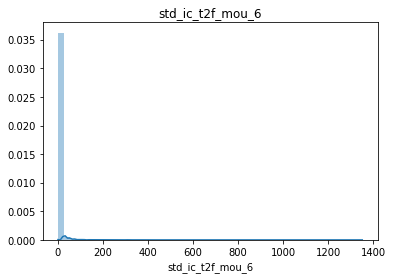

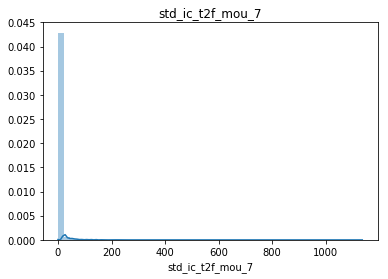

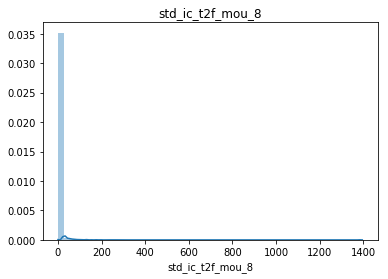

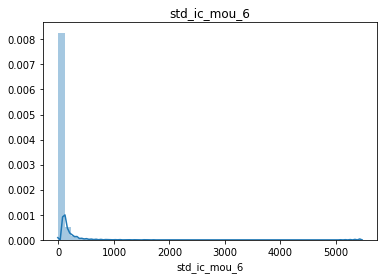

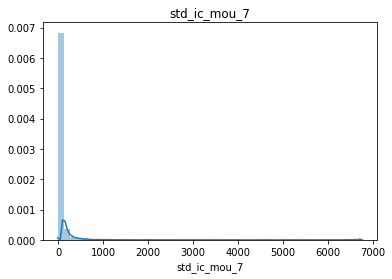

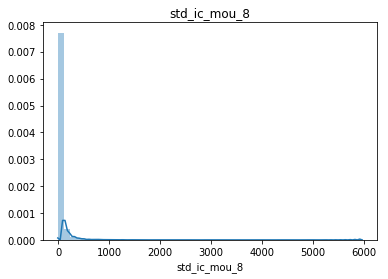

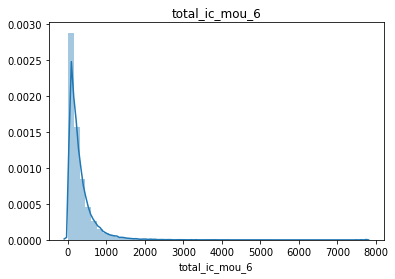

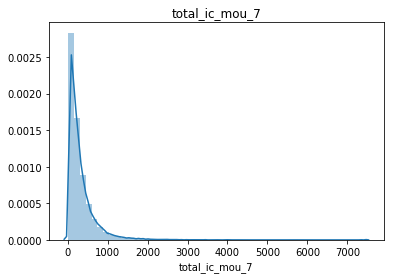

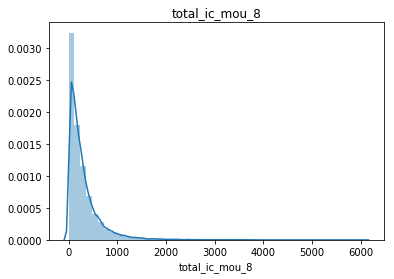

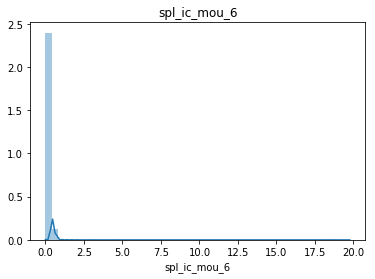

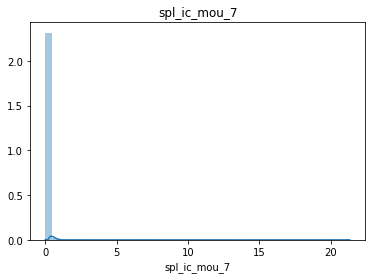

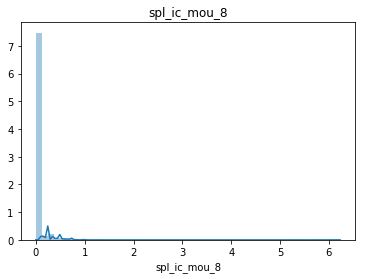

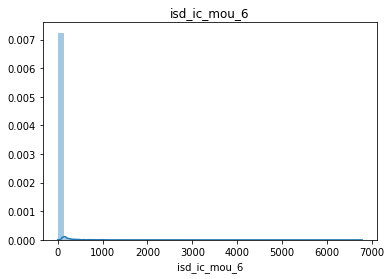

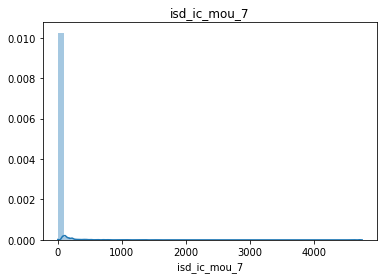

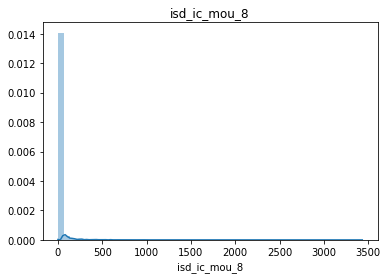

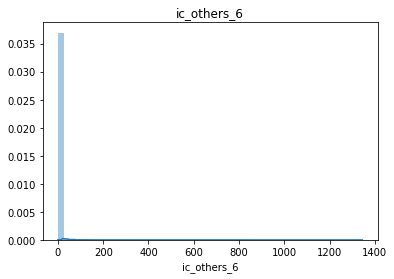

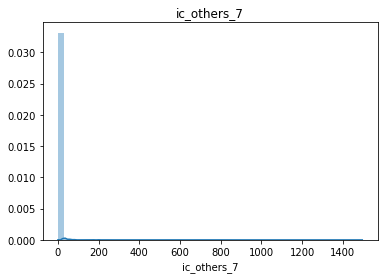

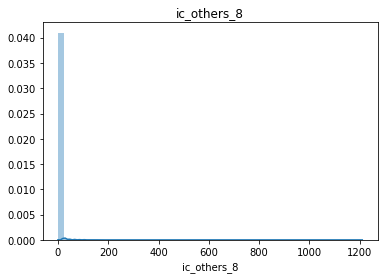

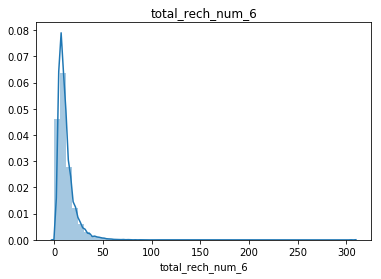

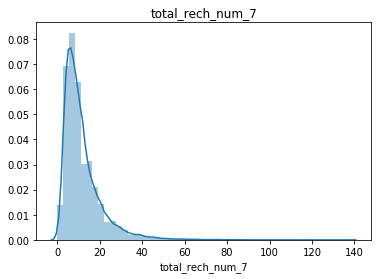

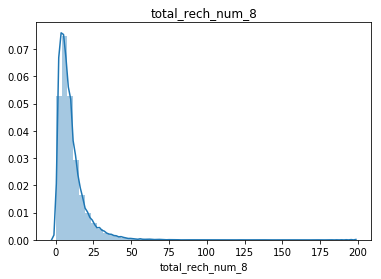

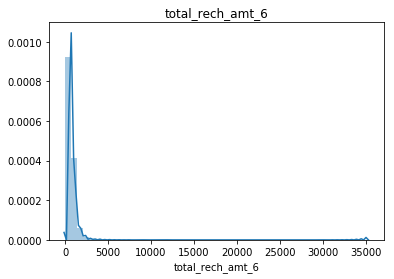

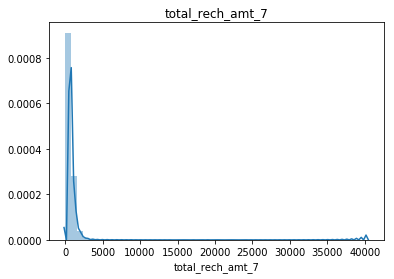

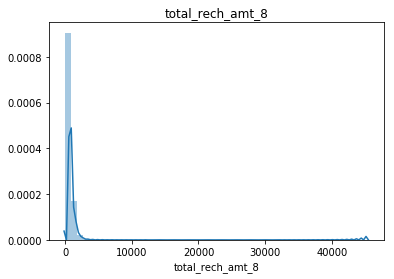

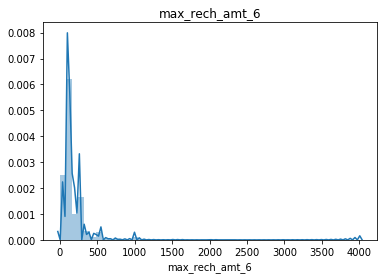

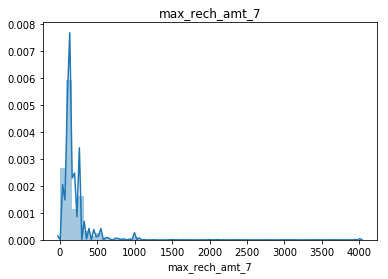

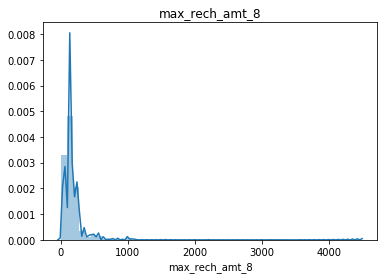

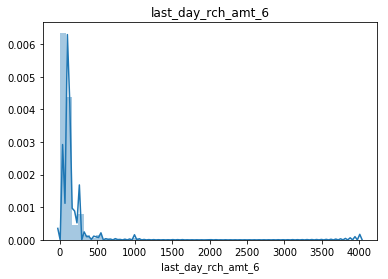

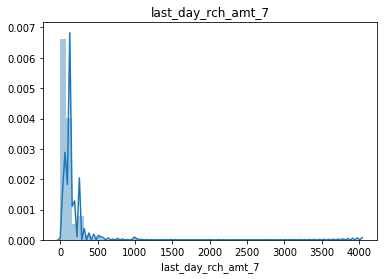

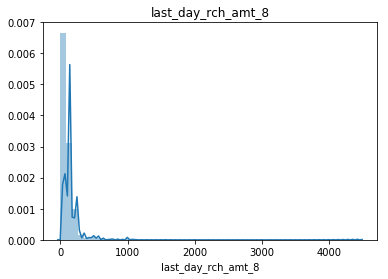

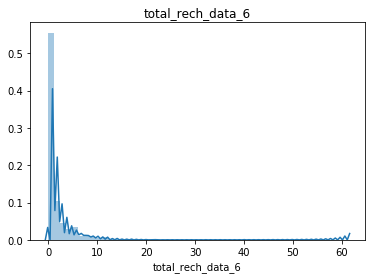

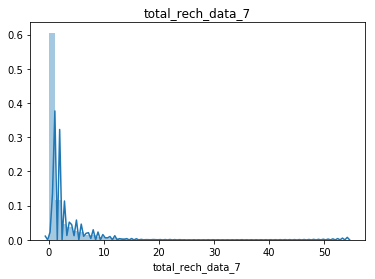

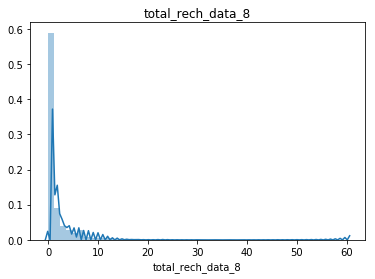

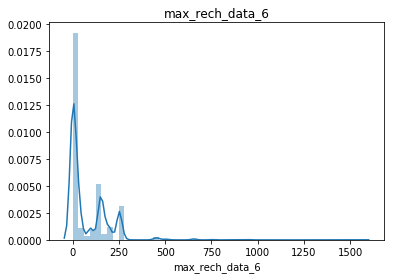

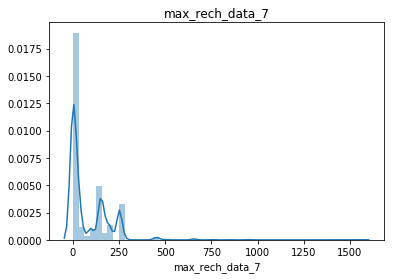

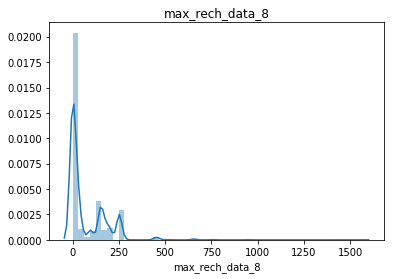

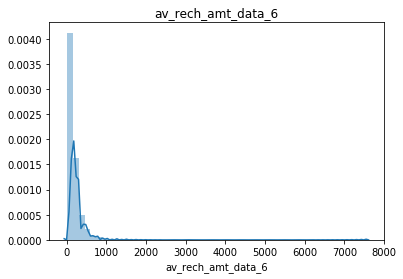

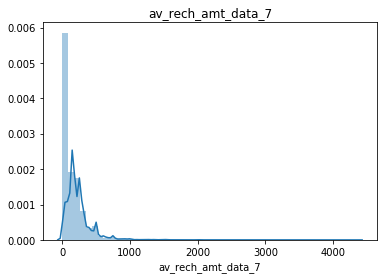

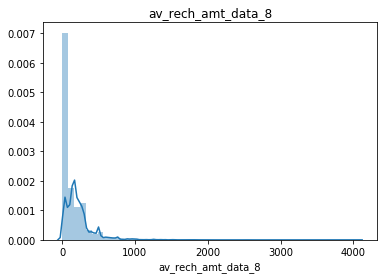

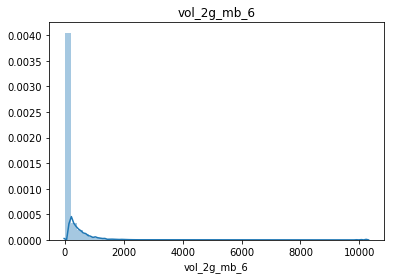

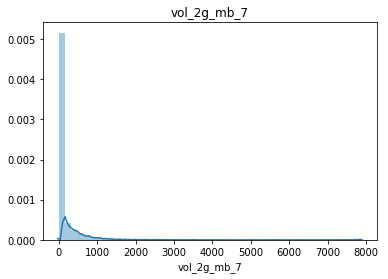

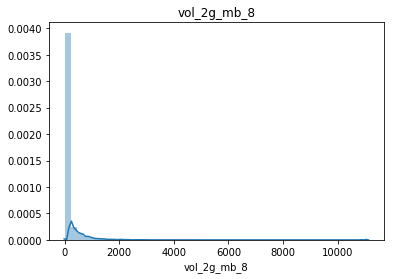

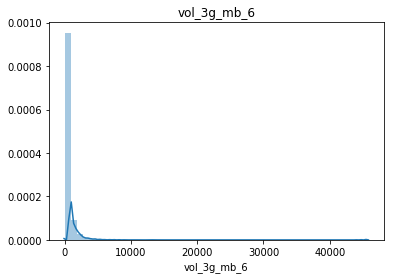

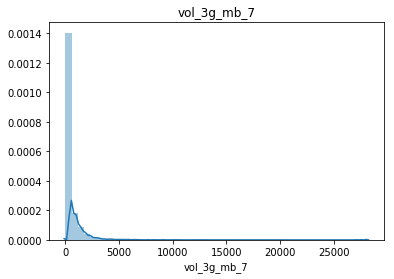

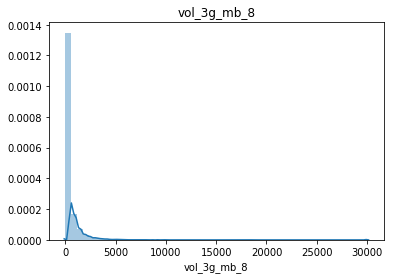

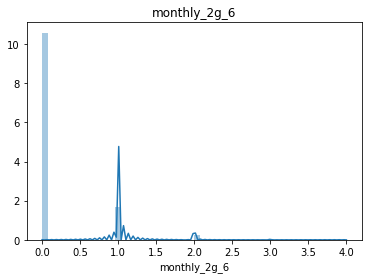

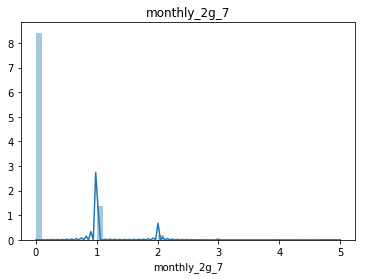

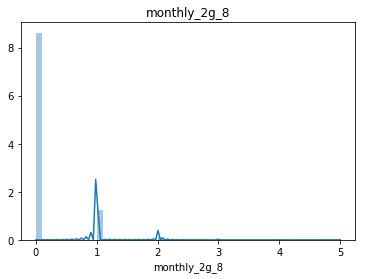

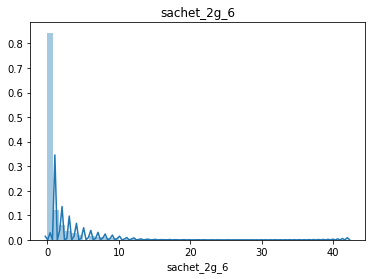

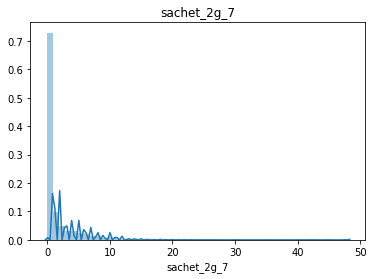

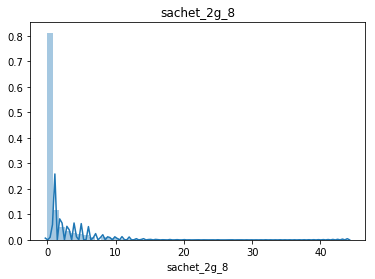

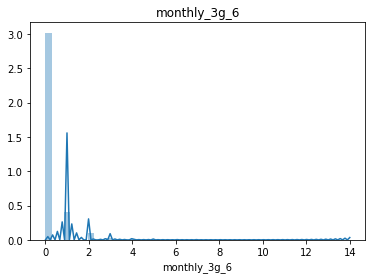

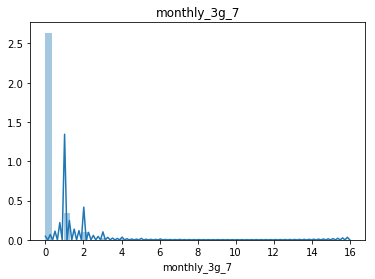

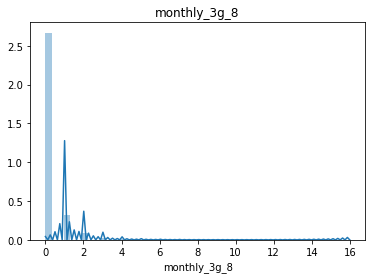

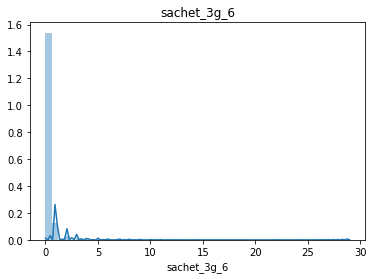

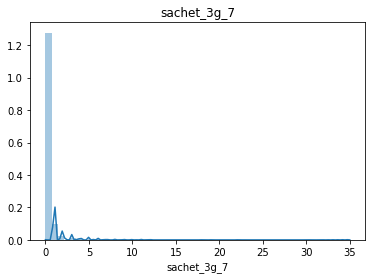

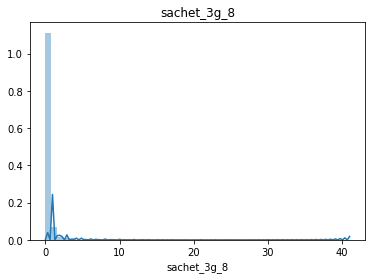

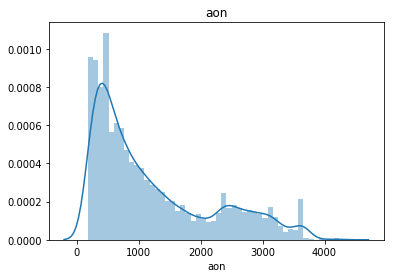

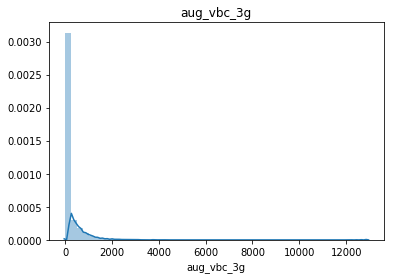

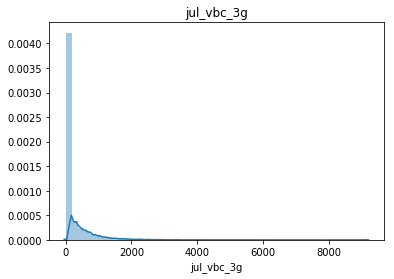

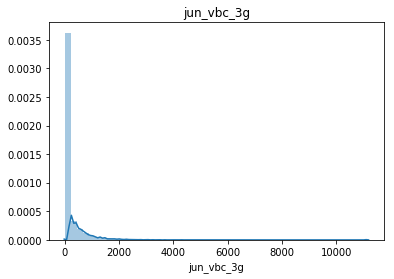

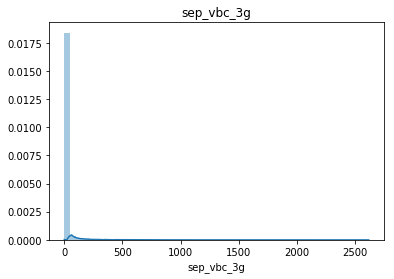

In [40]:
for col in num_var:
    sns.distplot(hvc_filtered[col])
    plt.title(col)
    plt.show()

The data shows to be highly skewed to the right

## Checking for outliers

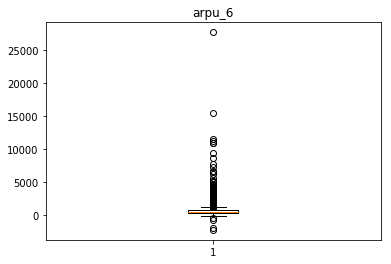

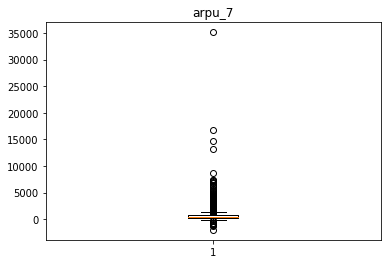

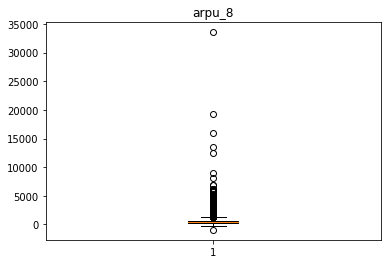

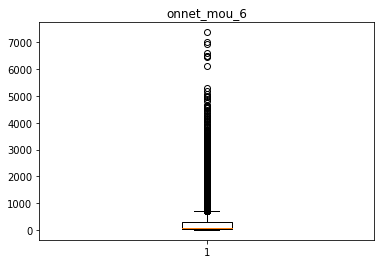

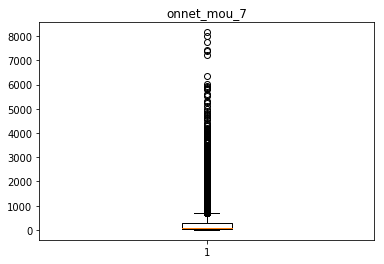

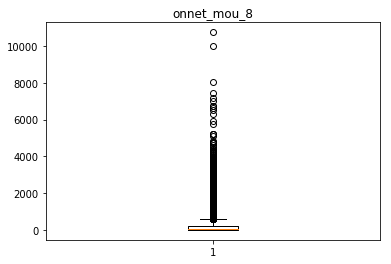

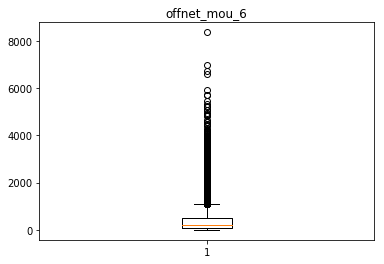

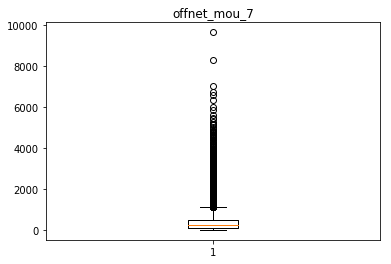

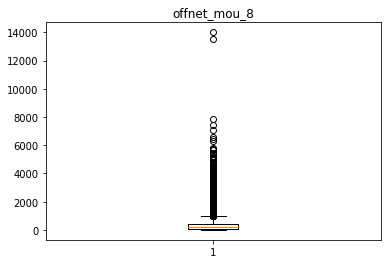

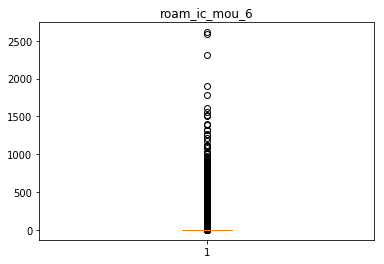

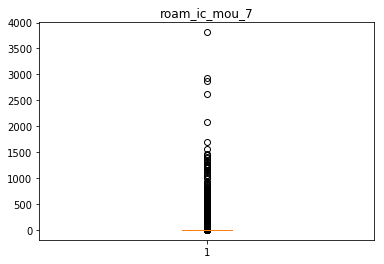

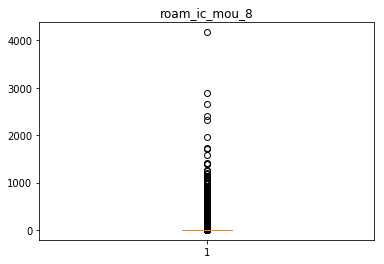

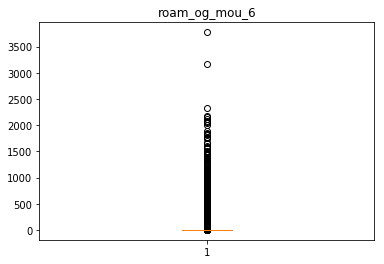

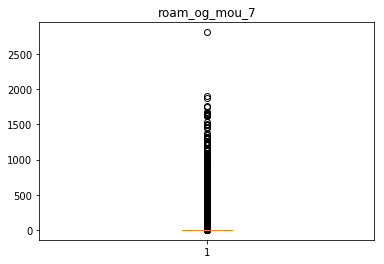

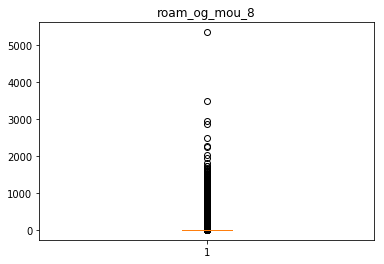

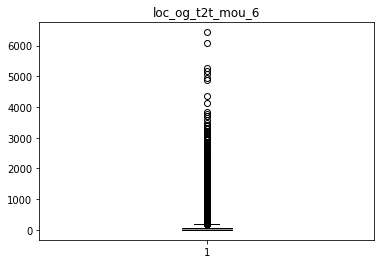

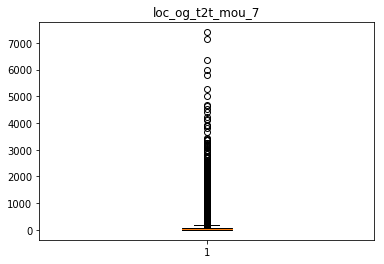

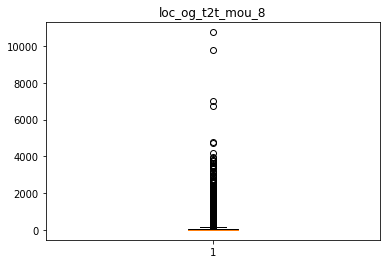

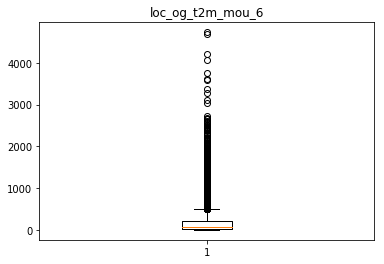

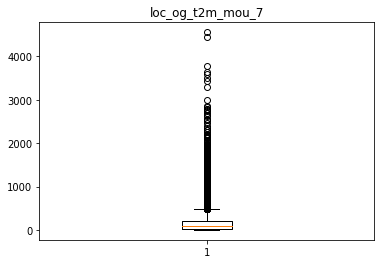

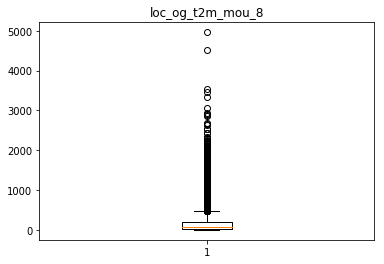

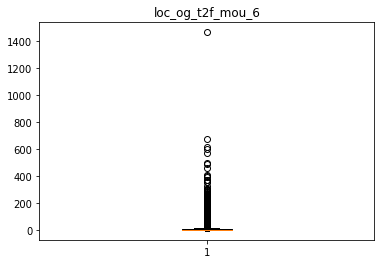

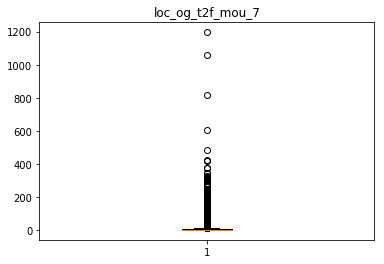

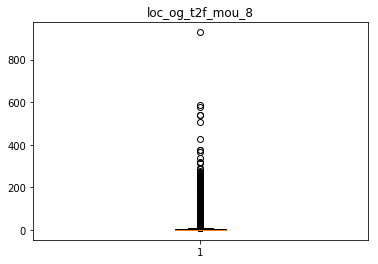

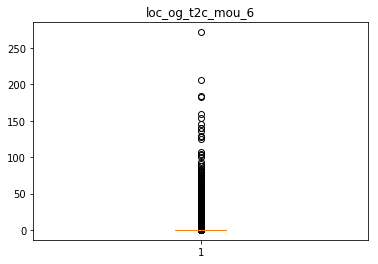

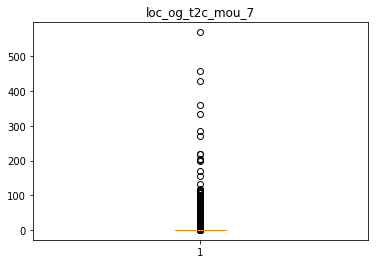

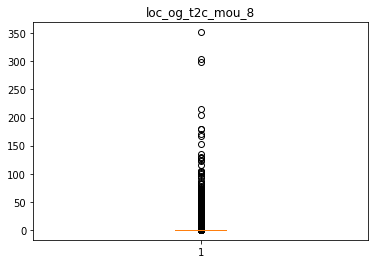

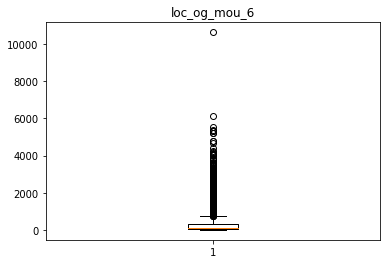

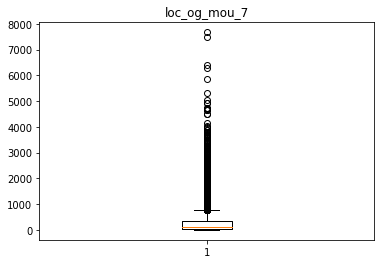

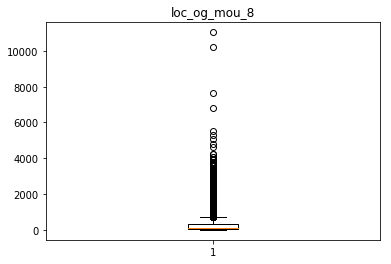

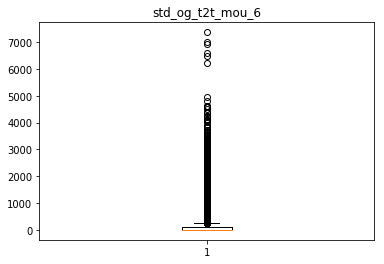

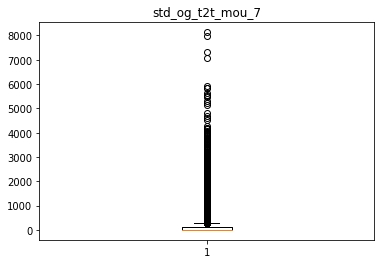

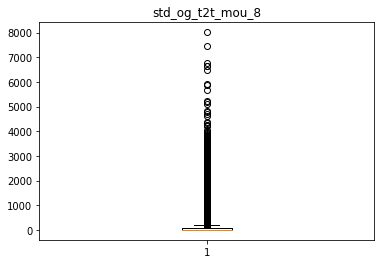

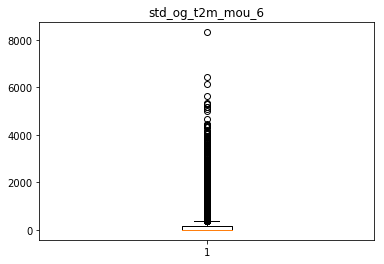

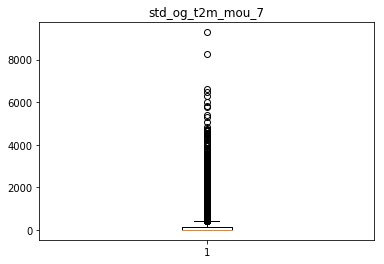

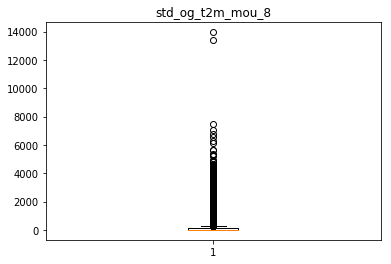

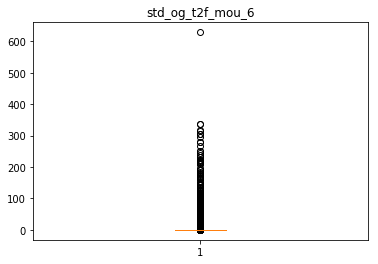

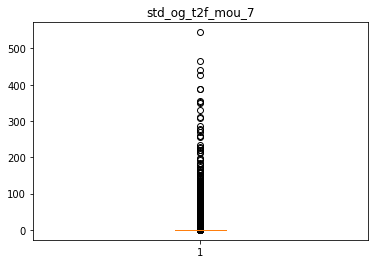

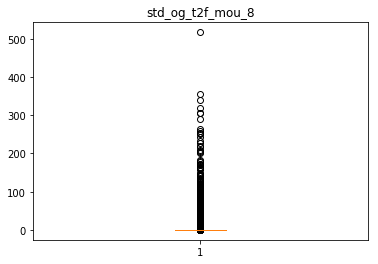

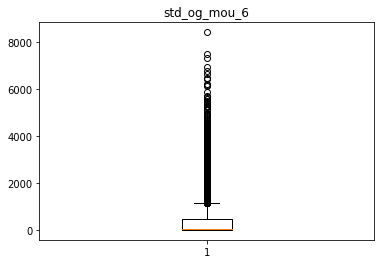

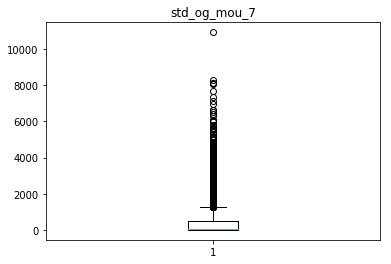

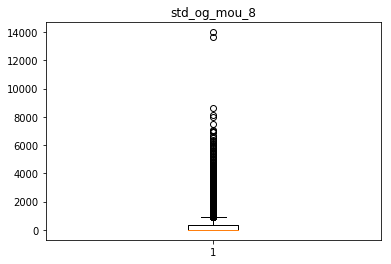

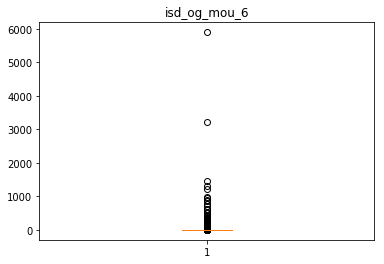

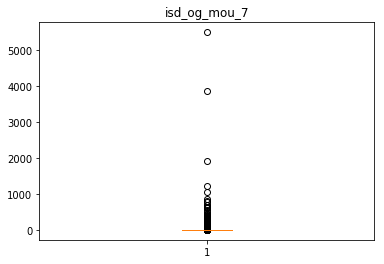

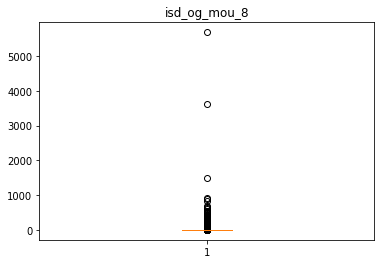

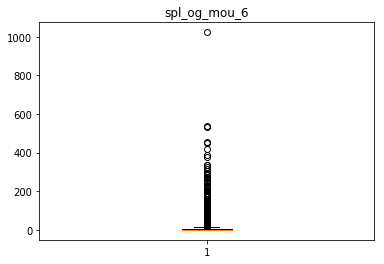

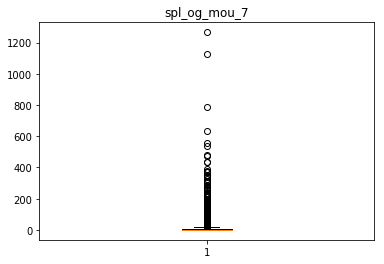

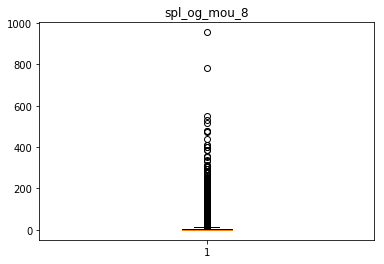

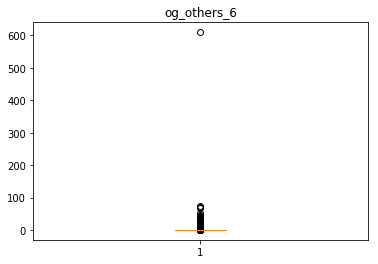

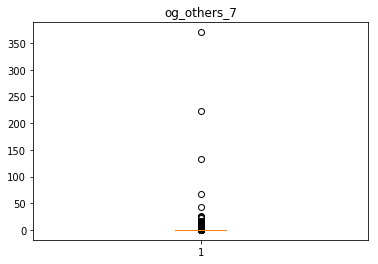

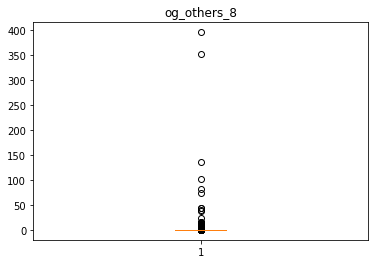

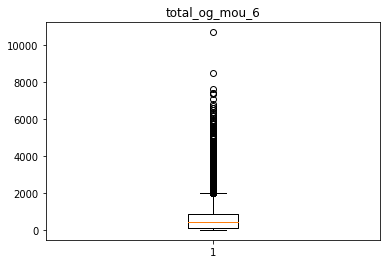

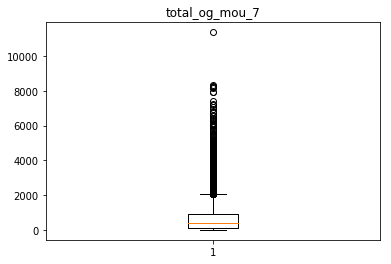

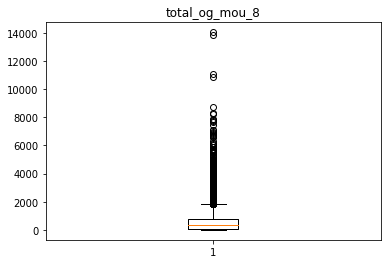

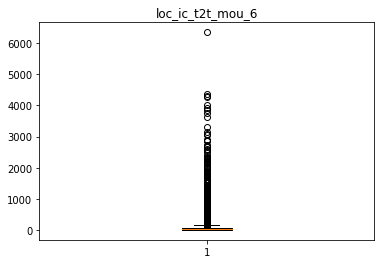

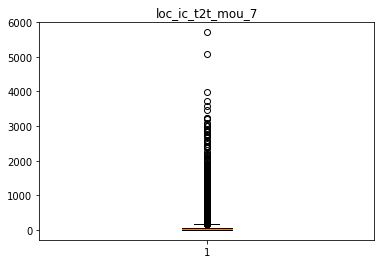

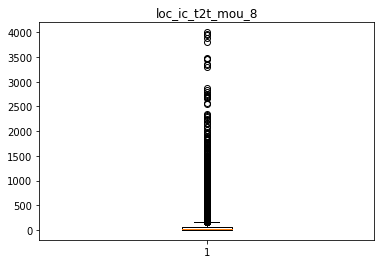

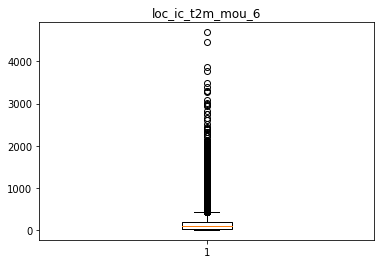

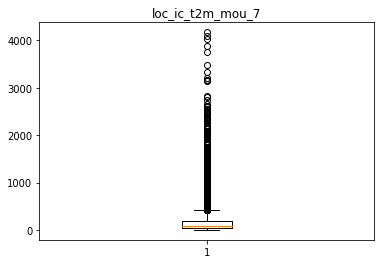

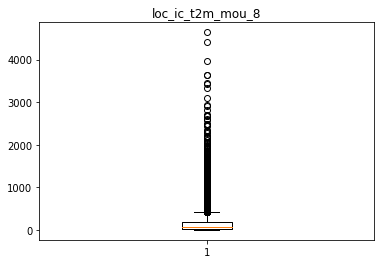

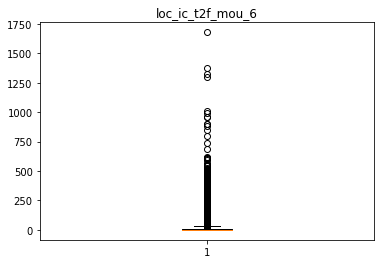

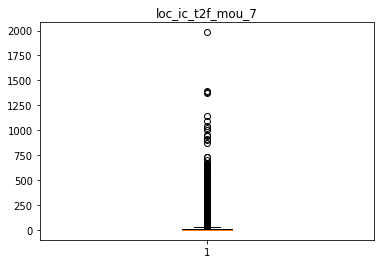

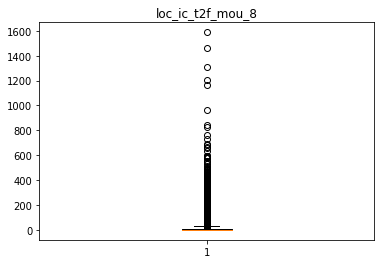

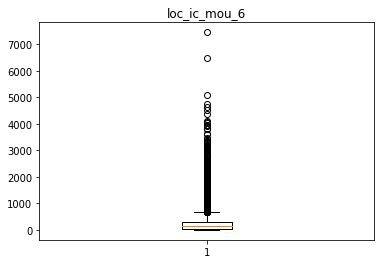

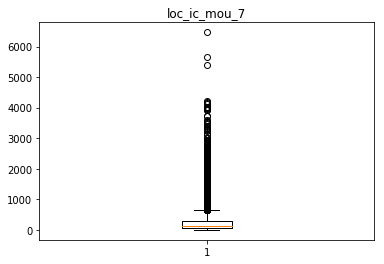

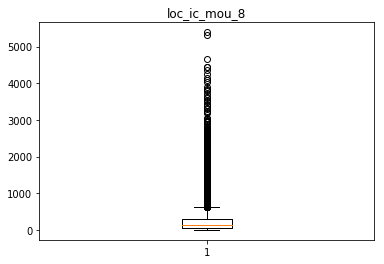

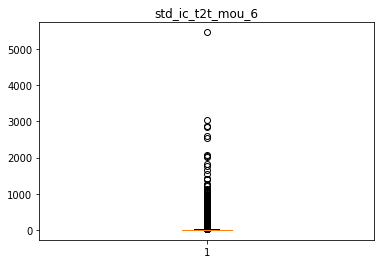

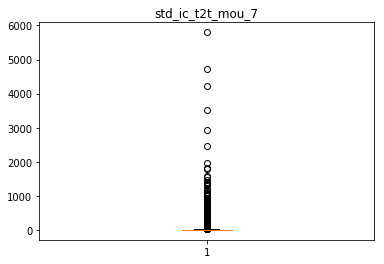

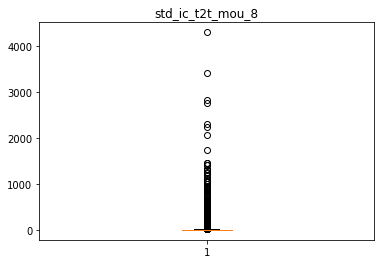

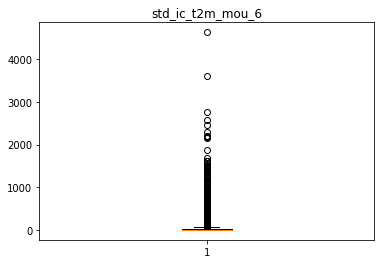

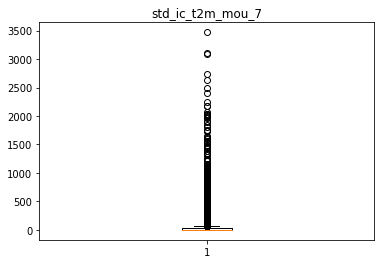

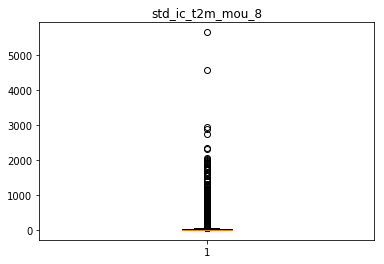

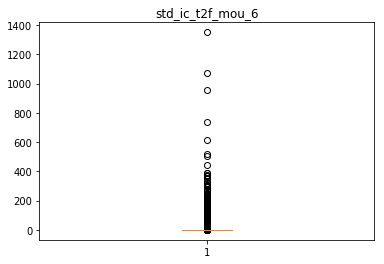

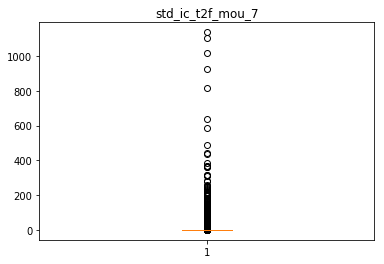

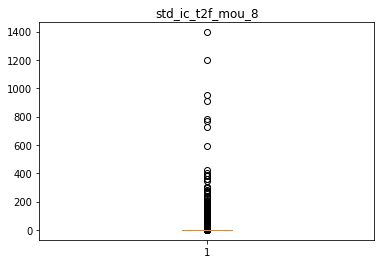

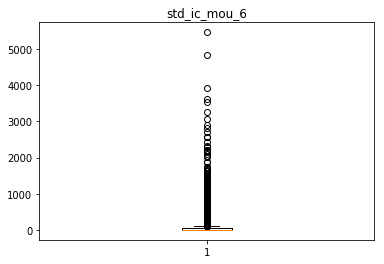

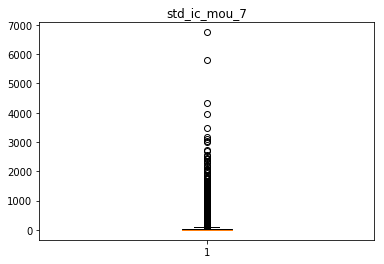

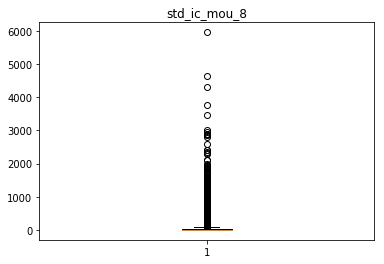

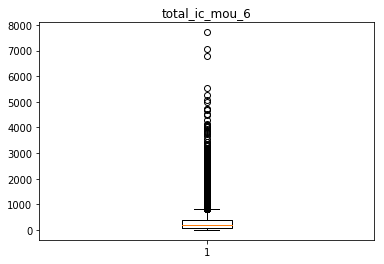

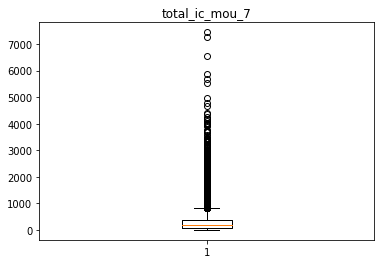

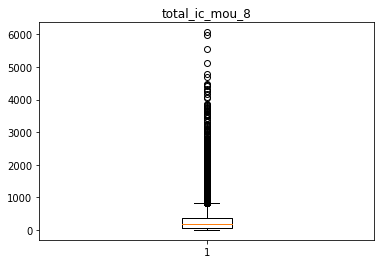

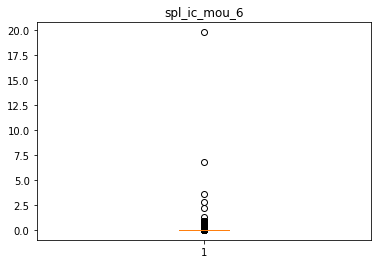

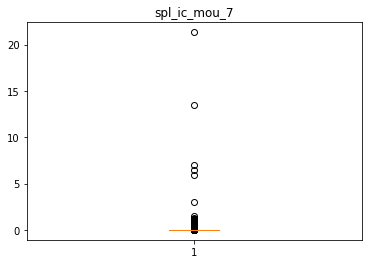

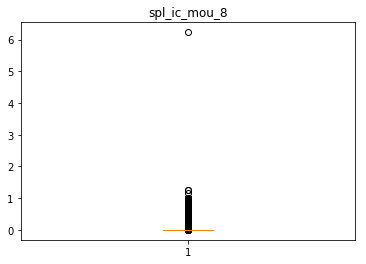

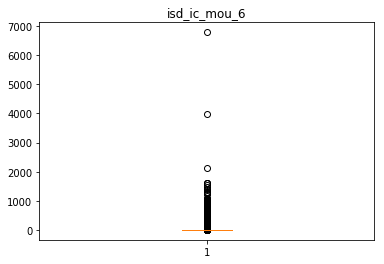

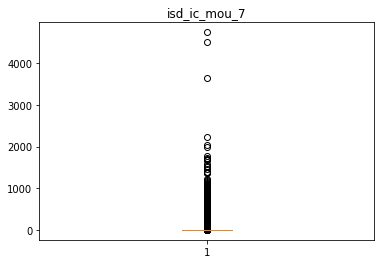

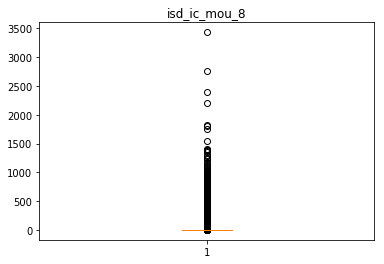

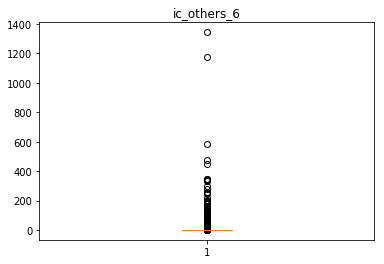

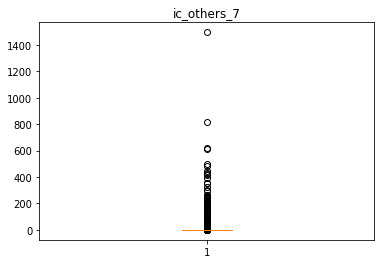

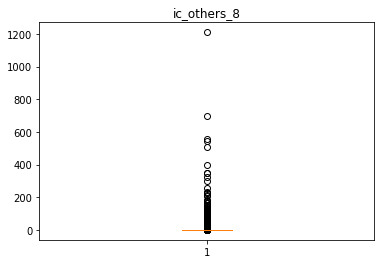

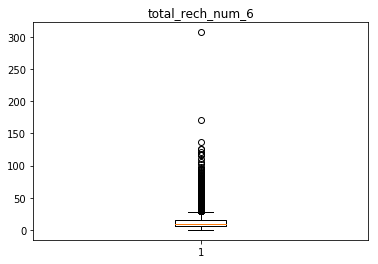

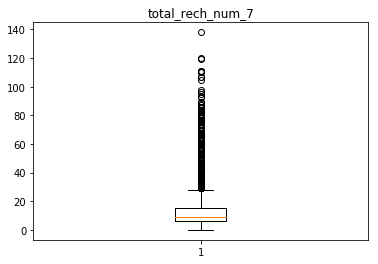

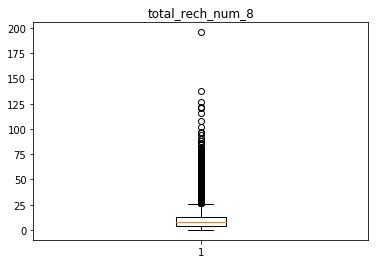

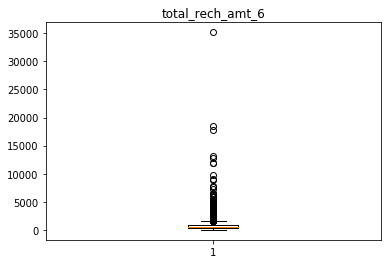

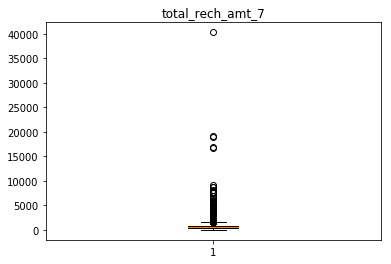

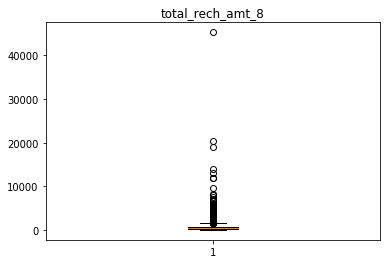

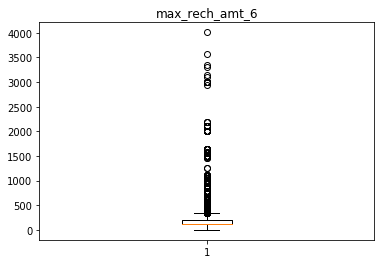

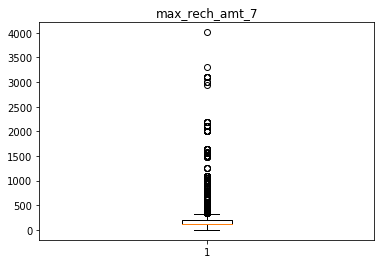

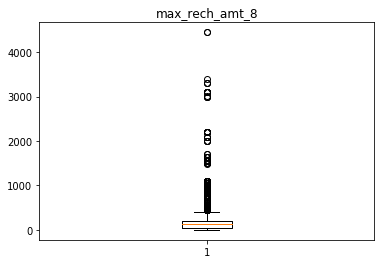

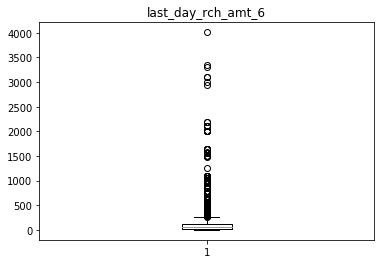

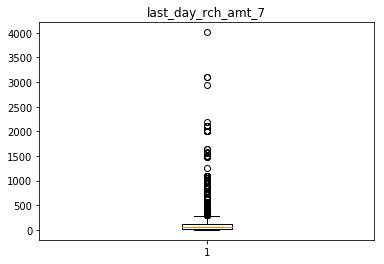

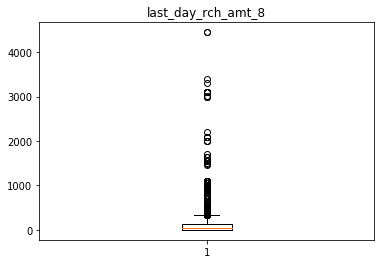

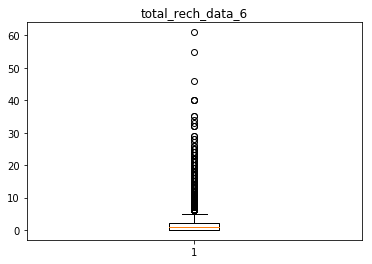

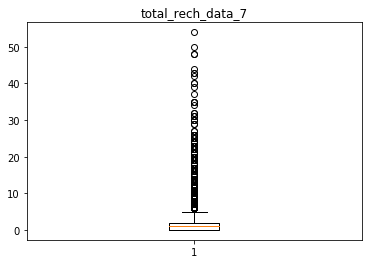

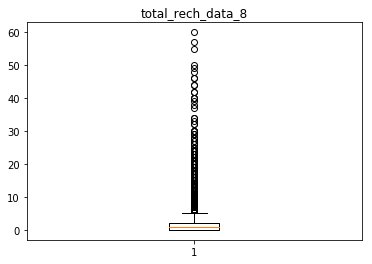

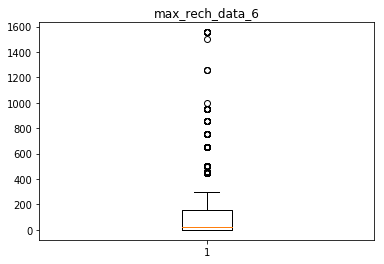

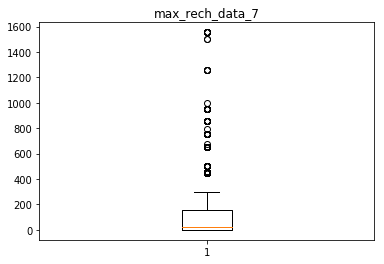

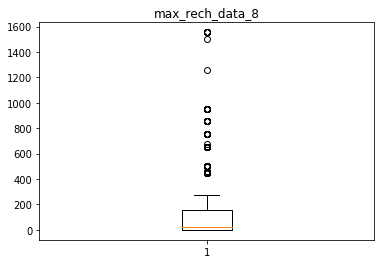

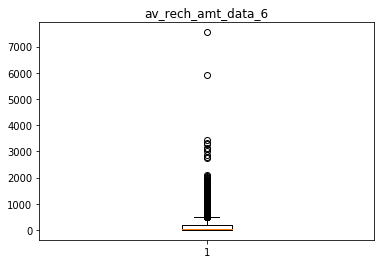

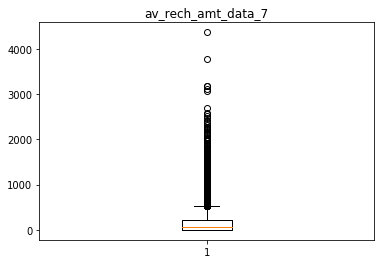

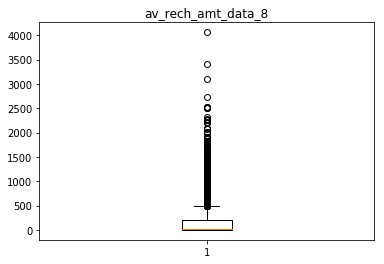

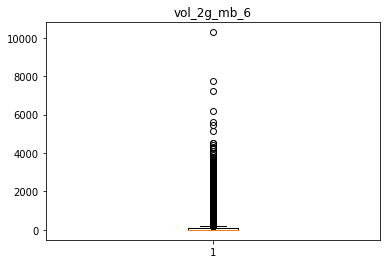

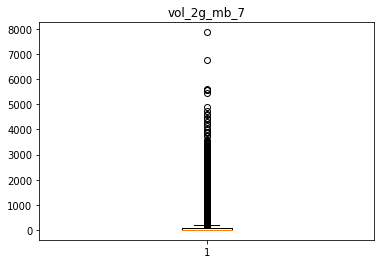

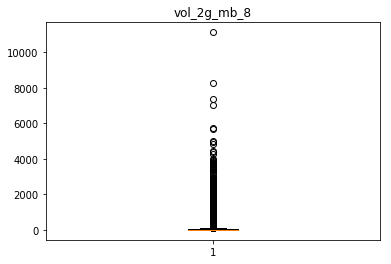

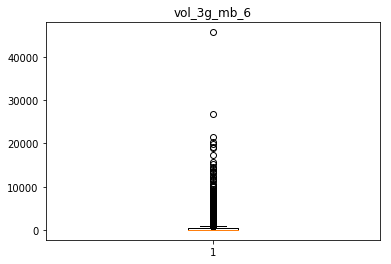

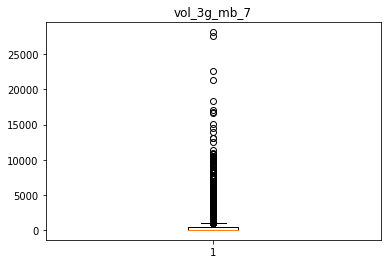

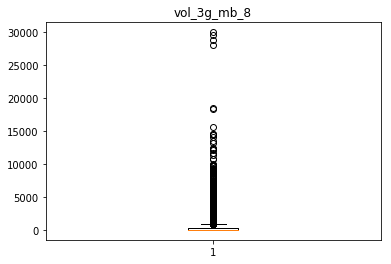

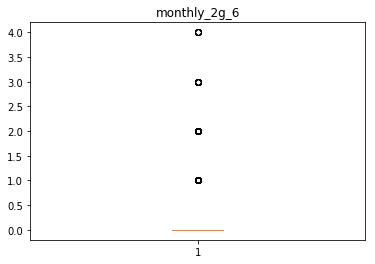

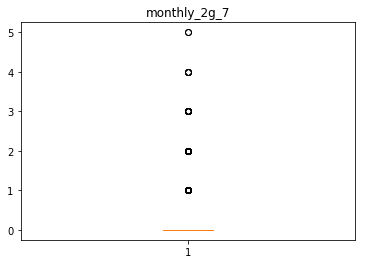

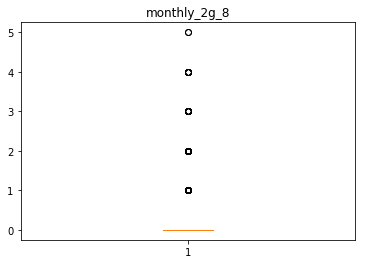

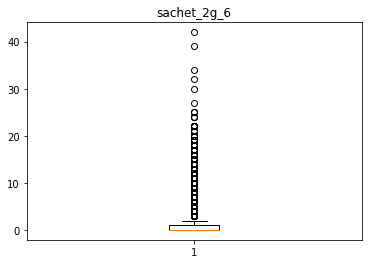

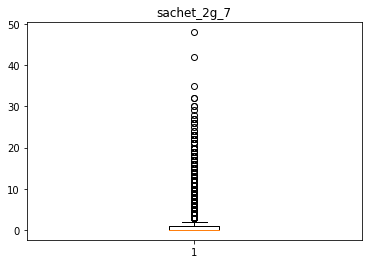

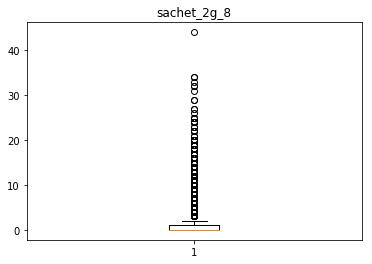

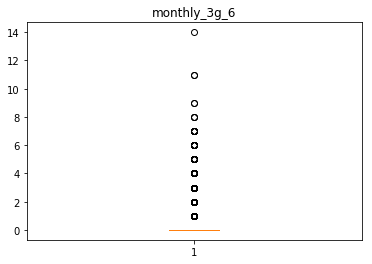

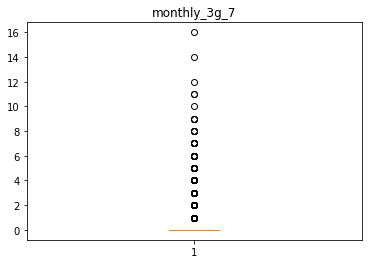

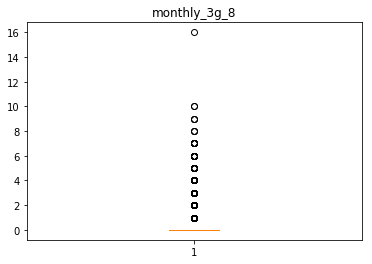

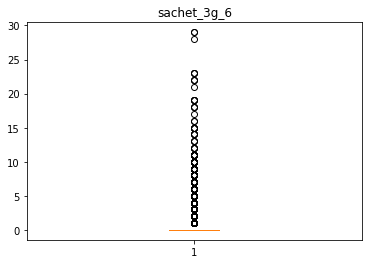

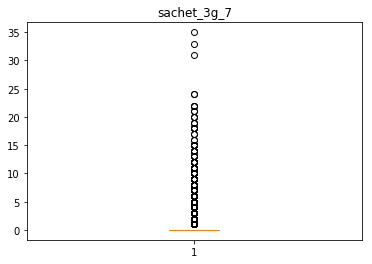

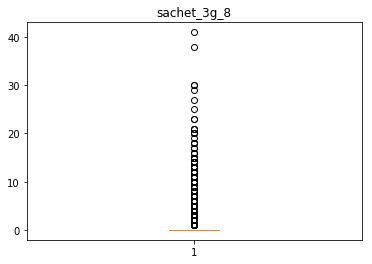

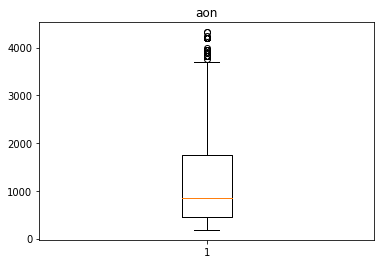

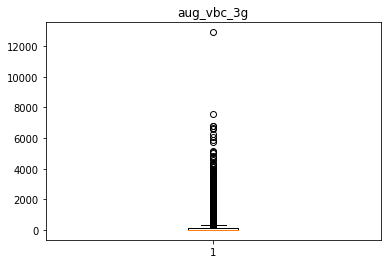

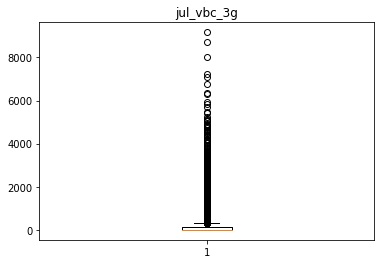

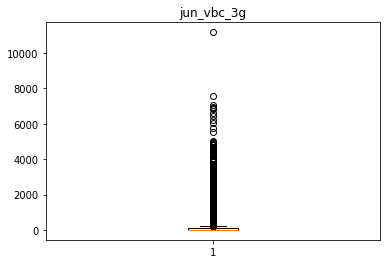

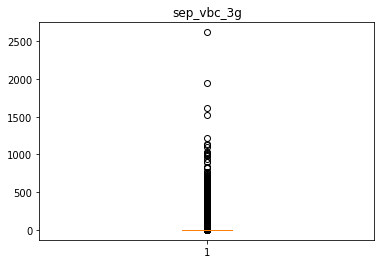

In [41]:
for col in hvc_filtered[num_var].columns:
    plt.boxplot(hvc_filtered[col])
    plt.title(col)
    plt.show()

In [42]:
# Checking the number of outliers for each column
for col in hvc_filtered[num_var].columns:
    q3=hvc_filtered[col].quantile(0.99)
    print(col,'=',hvc_filtered[col][hvc_filtered[col]>q3].count())

arpu_6 = 300
arpu_7 = 300
arpu_8 = 300
onnet_mou_6 = 300
onnet_mou_7 = 300
onnet_mou_8 = 300
offnet_mou_6 = 300
offnet_mou_7 = 300
offnet_mou_8 = 300
roam_ic_mou_6 = 300
roam_ic_mou_7 = 300
roam_ic_mou_8 = 300
roam_og_mou_6 = 300
roam_og_mou_7 = 300
roam_og_mou_8 = 300
loc_og_t2t_mou_6 = 300
loc_og_t2t_mou_7 = 300
loc_og_t2t_mou_8 = 300
loc_og_t2m_mou_6 = 300
loc_og_t2m_mou_7 = 300
loc_og_t2m_mou_8 = 300
loc_og_t2f_mou_6 = 299
loc_og_t2f_mou_7 = 300
loc_og_t2f_mou_8 = 300
loc_og_t2c_mou_6 = 299
loc_og_t2c_mou_7 = 299
loc_og_t2c_mou_8 = 300
loc_og_mou_6 = 300
loc_og_mou_7 = 300
loc_og_mou_8 = 300
std_og_t2t_mou_6 = 300
std_og_t2t_mou_7 = 300
std_og_t2t_mou_8 = 300
std_og_t2m_mou_6 = 300
std_og_t2m_mou_7 = 300
std_og_t2m_mou_8 = 300
std_og_t2f_mou_6 = 299
std_og_t2f_mou_7 = 300
std_og_t2f_mou_8 = 300
std_og_mou_6 = 300
std_og_mou_7 = 300
std_og_mou_8 = 300
isd_og_mou_6 = 300
isd_og_mou_7 = 300
isd_og_mou_8 = 300
spl_og_mou_6 = 300
spl_og_mou_7 = 300
spl_og_mou_8 = 300
og_others_6 = 300
o

In [43]:
# Saving the columns which have more than or equal to 300 outliers to a new list
col_outlier=[]
for col in hvc_filtered[num_var].columns:
    q3=hvc_filtered[col].quantile(0.99)
    if hvc_filtered[col][hvc_filtered[col]>q3].count()>=300:
        col_outlier.append(col)

col_outlier

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',


In [44]:
# Shape before removing outliers
hvc_filtered.shape

(30001, 142)

In [45]:
# Removing the outliers
for col in col_outlier:
    q1=hvc_filtered[col].quantile(0.1)
    q2=hvc_filtered[col].quantile(0.99)
    IQR=q2-q1
    hvc_filtered=hvc_filtered.loc[(hvc_filtered[col]>=q1-1.5*IQR)&(hvc_filtered[col]<=q2+1.5*IQR)]

In [46]:
# Shape after removing outliers
hvc_filtered.shape

(27446, 142)

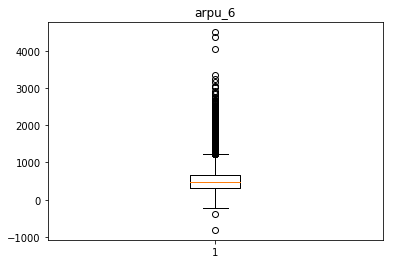

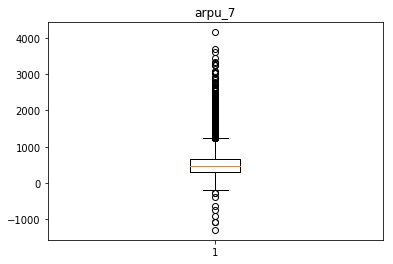

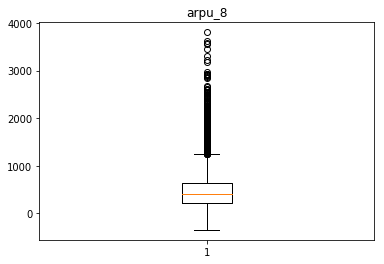

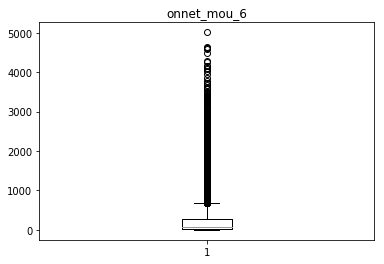

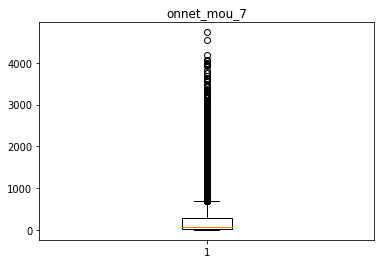

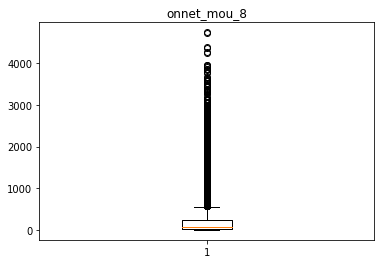

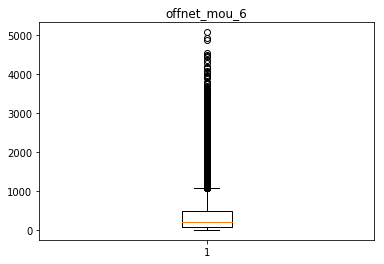

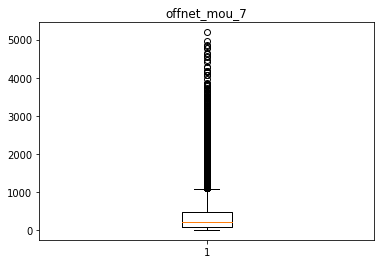

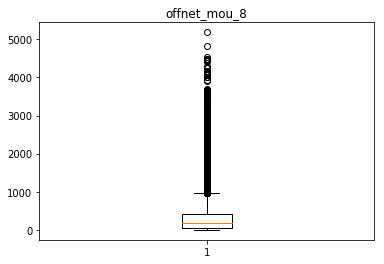

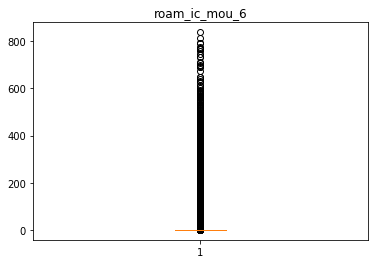

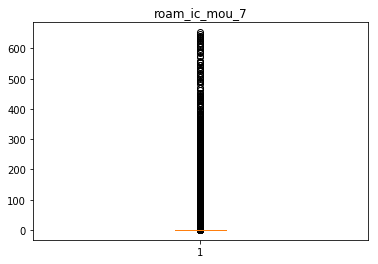

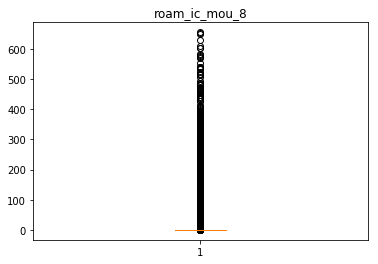

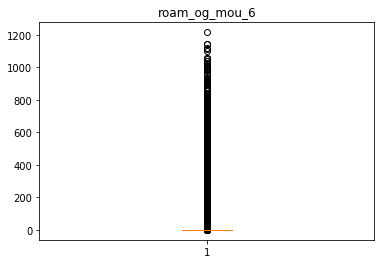

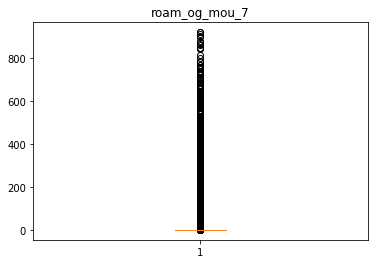

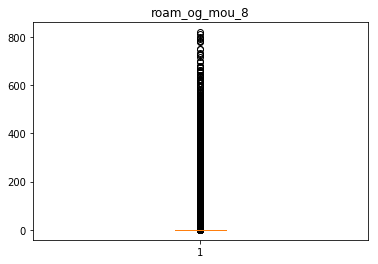

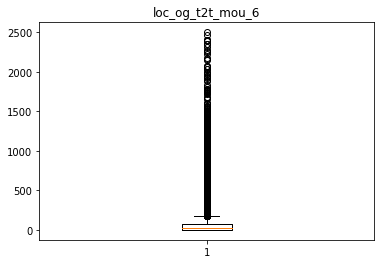

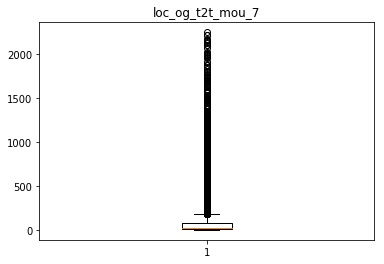

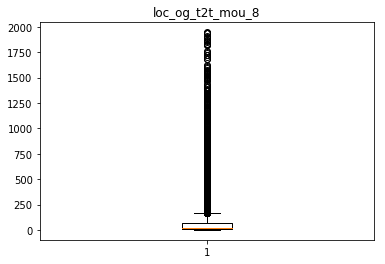

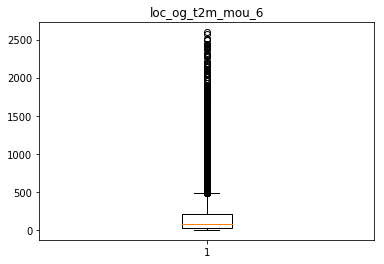

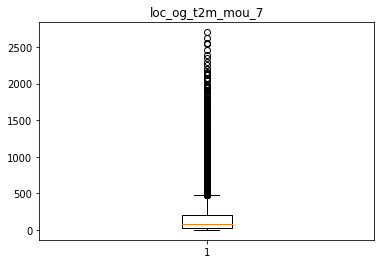

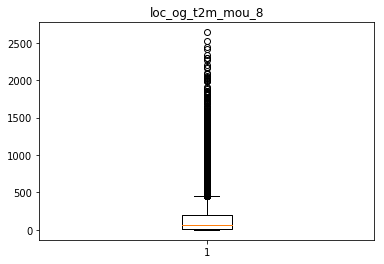

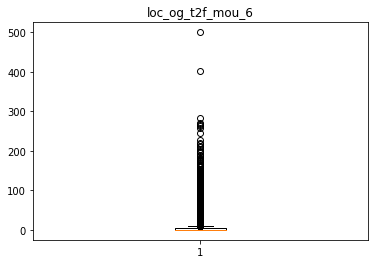

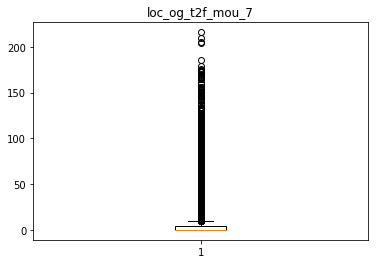

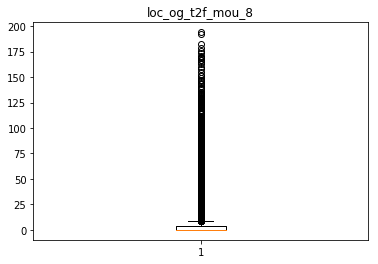

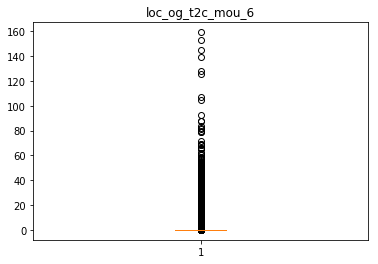

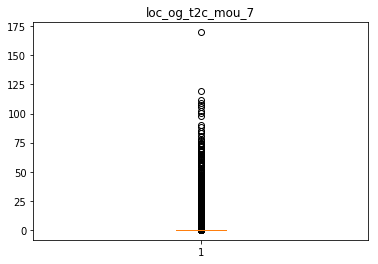

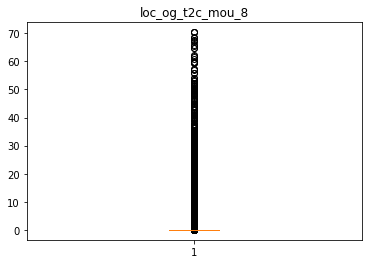

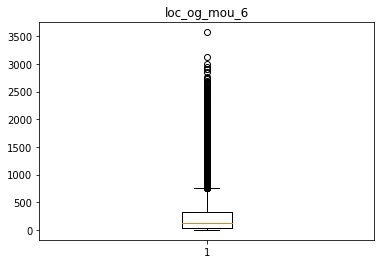

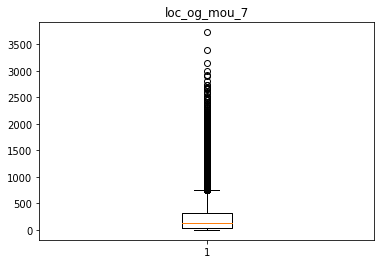

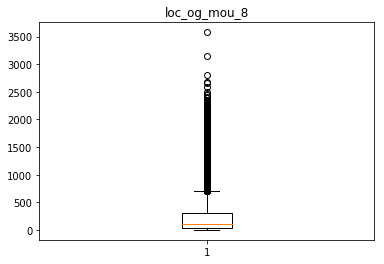

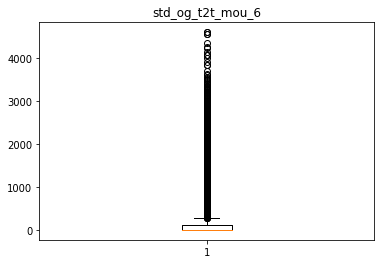

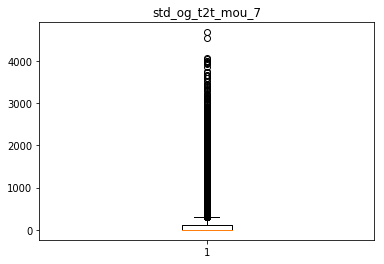

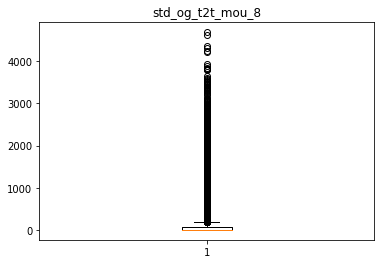

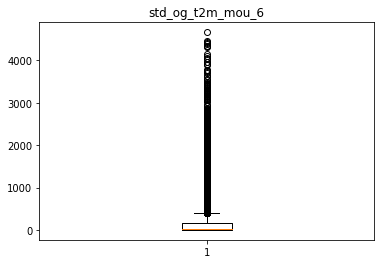

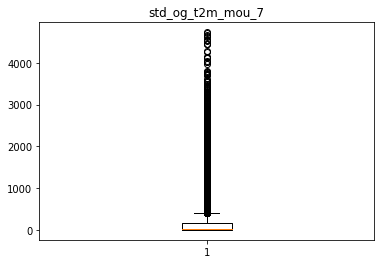

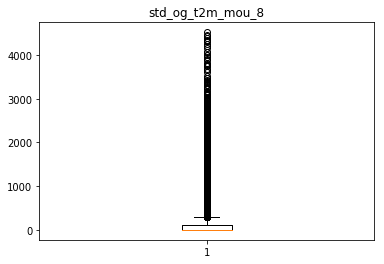

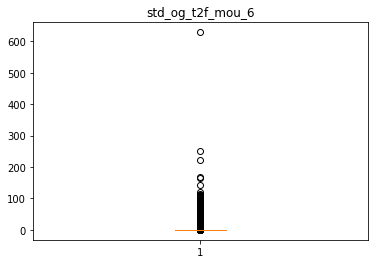

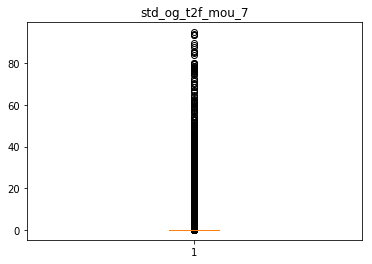

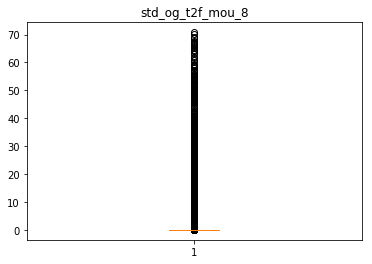

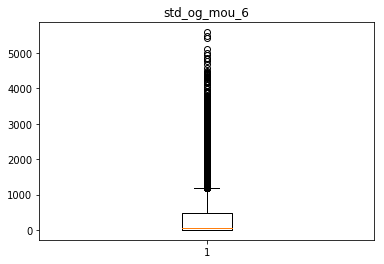

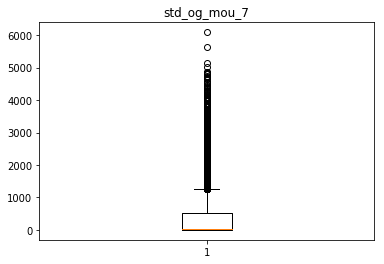

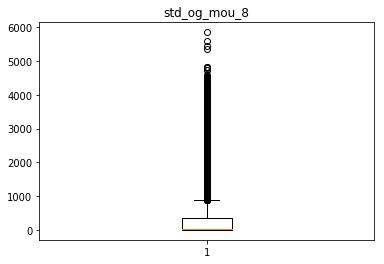

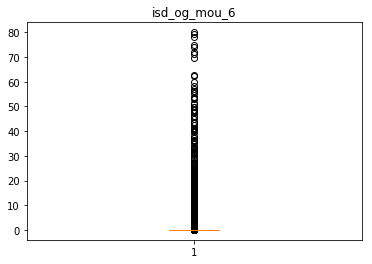

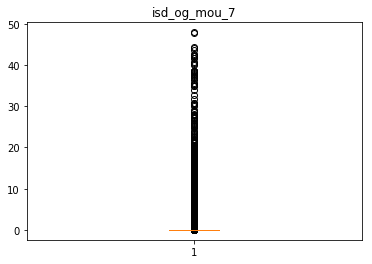

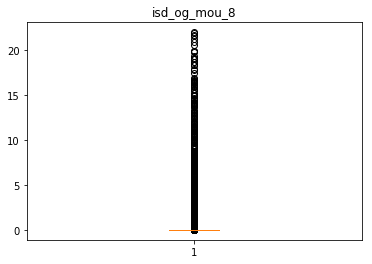

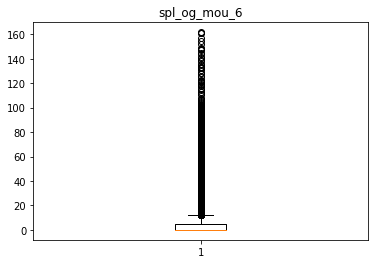

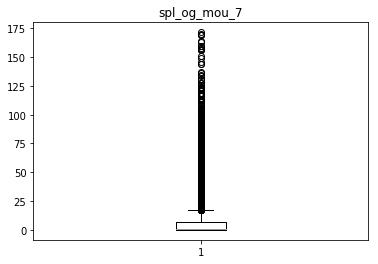

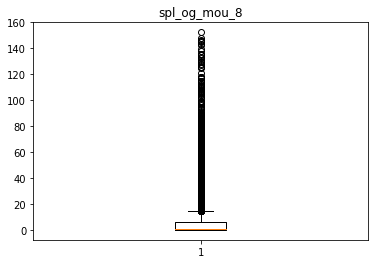

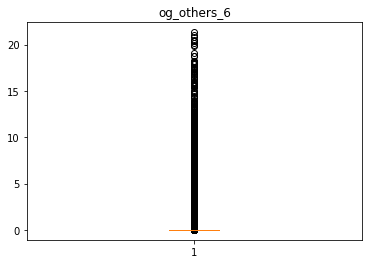

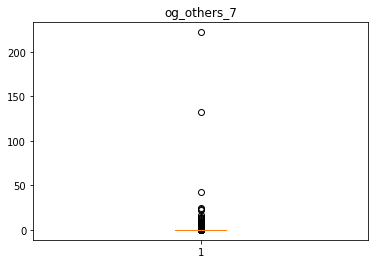

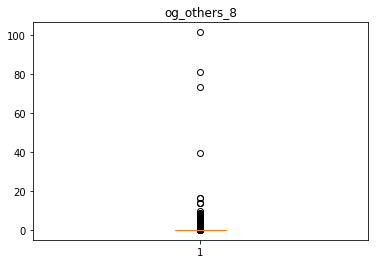

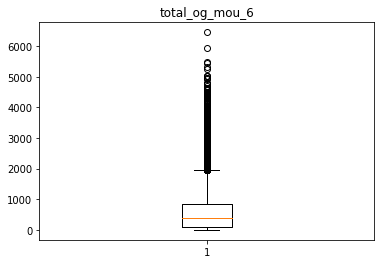

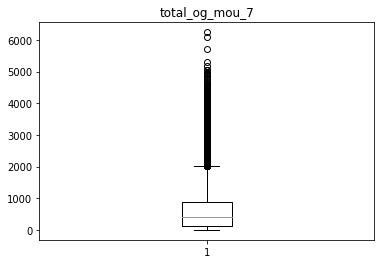

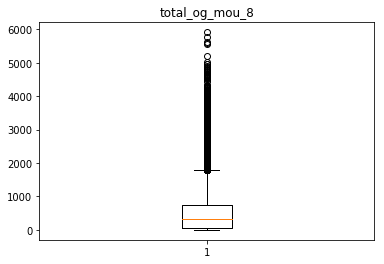

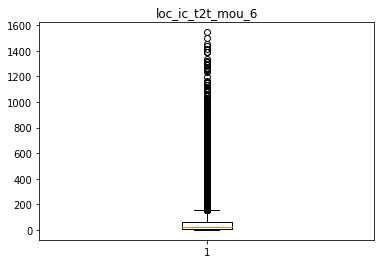

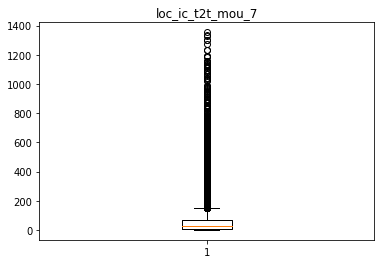

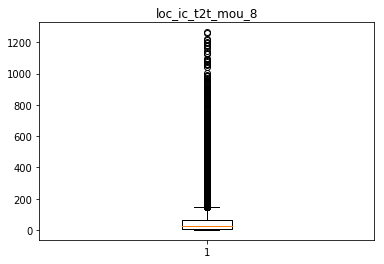

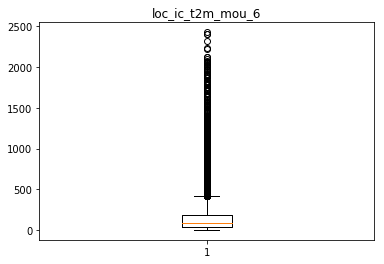

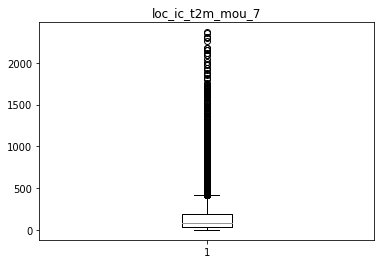

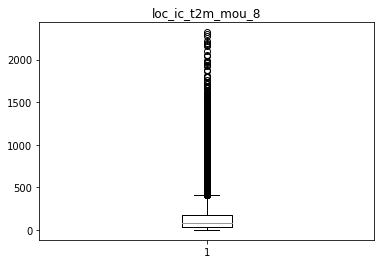

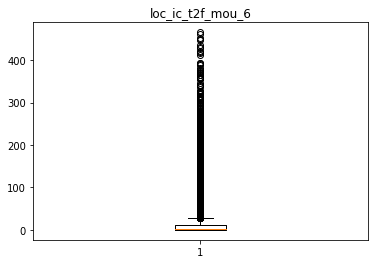

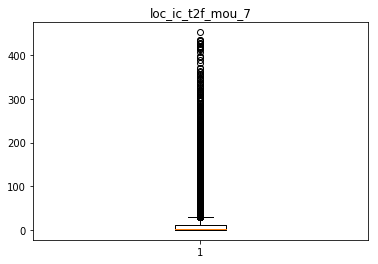

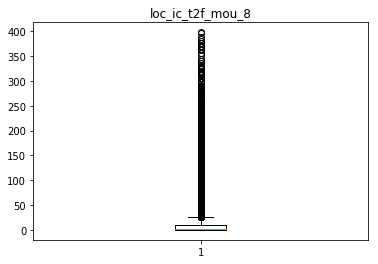

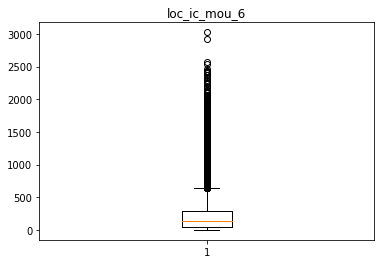

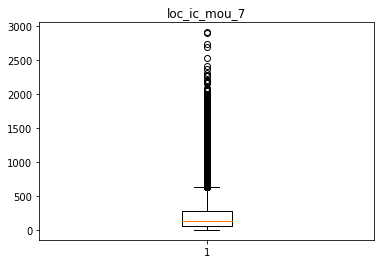

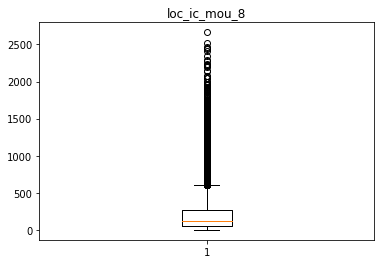

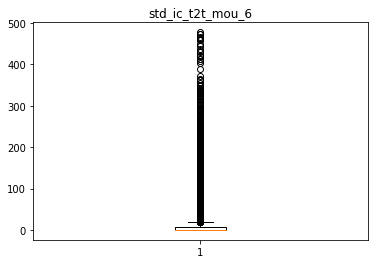

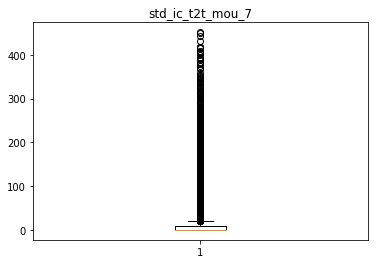

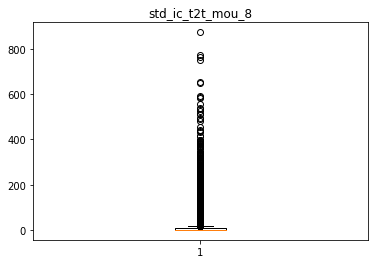

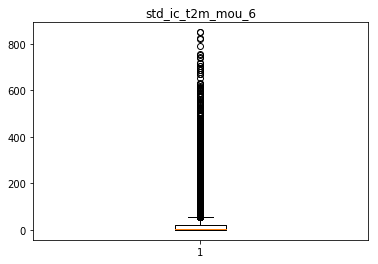

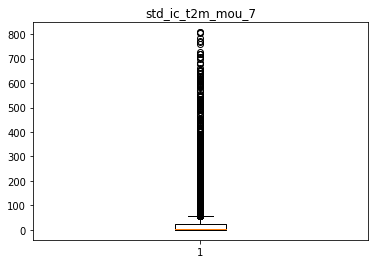

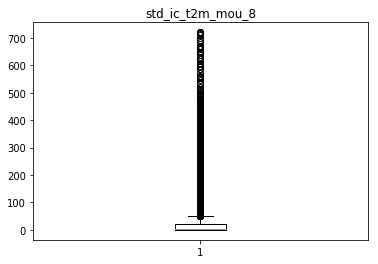

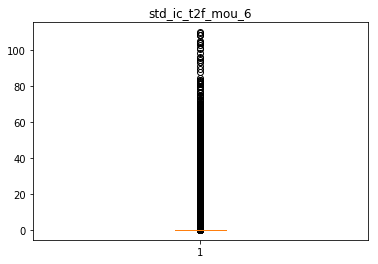

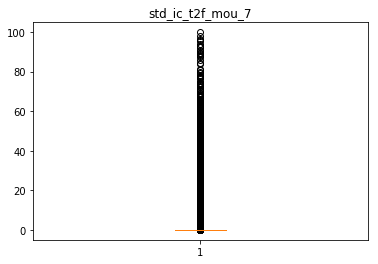

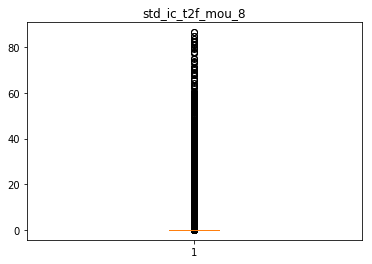

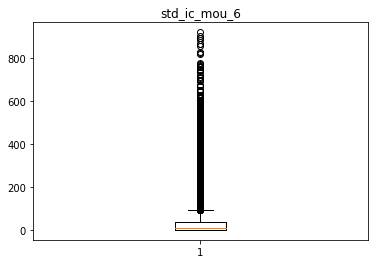

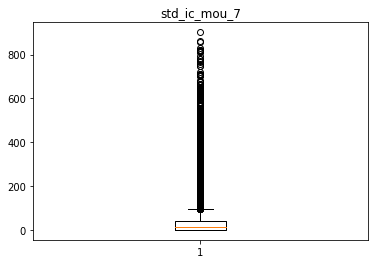

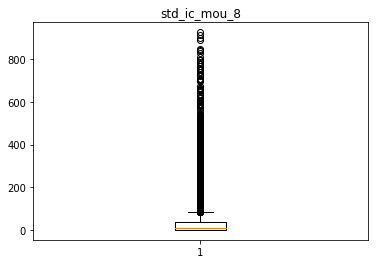

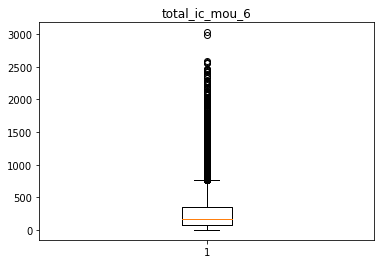

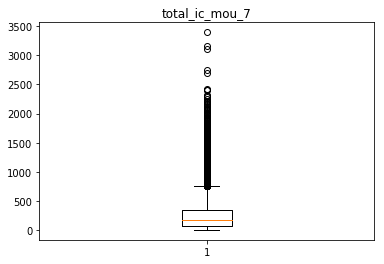

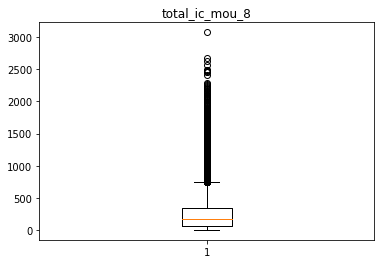

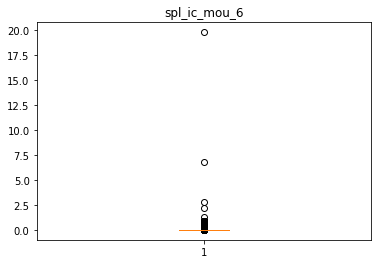

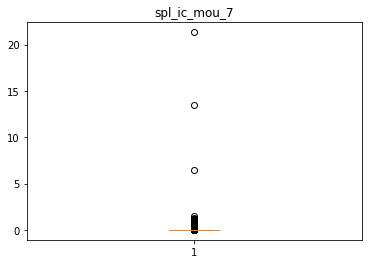

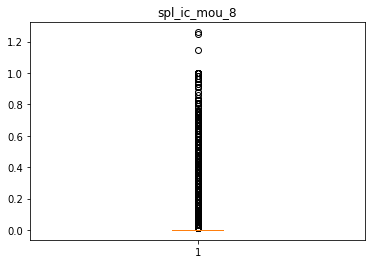

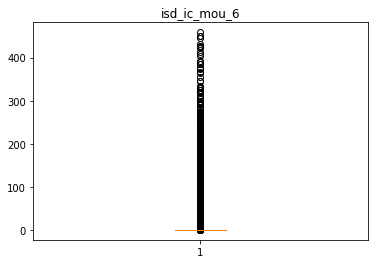

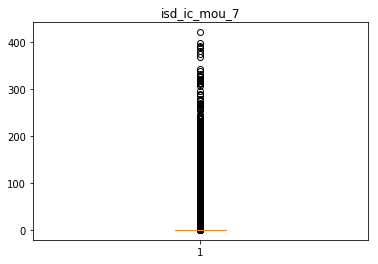

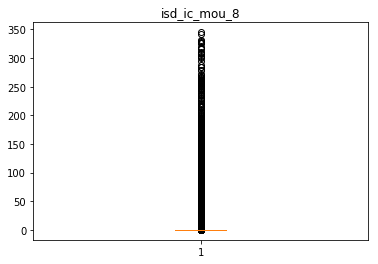

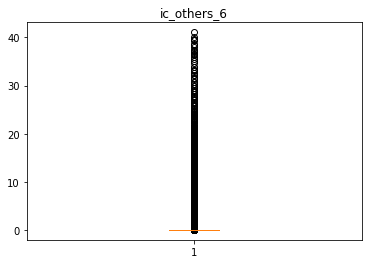

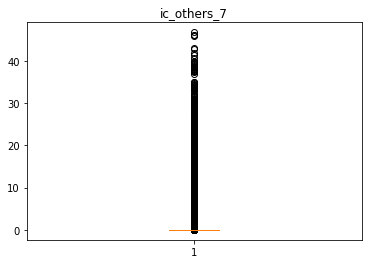

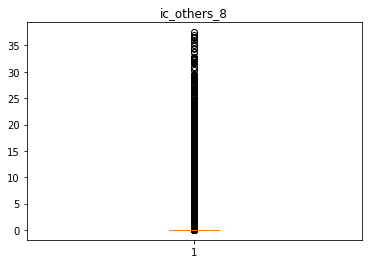

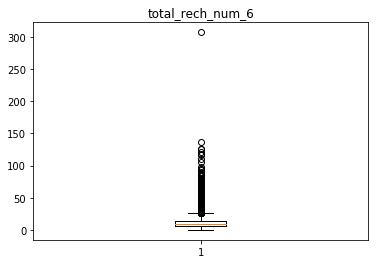

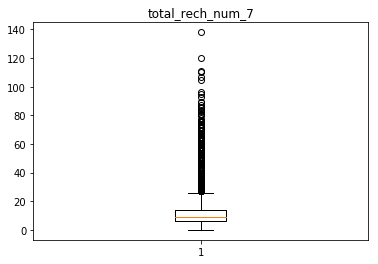

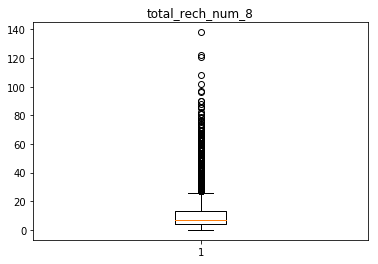

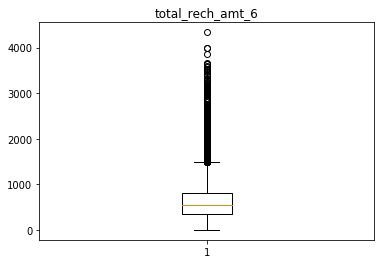

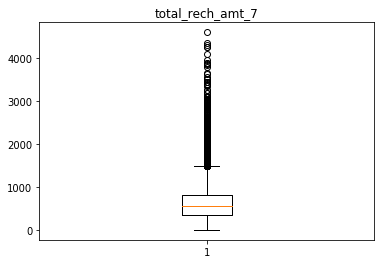

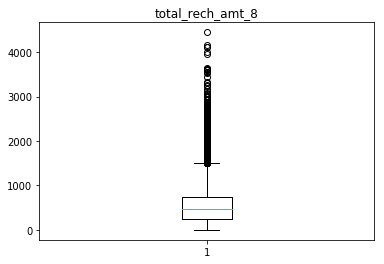

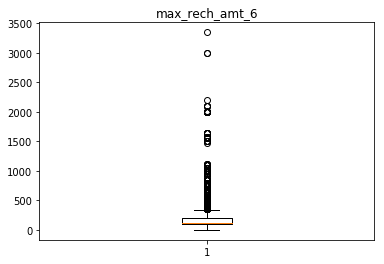

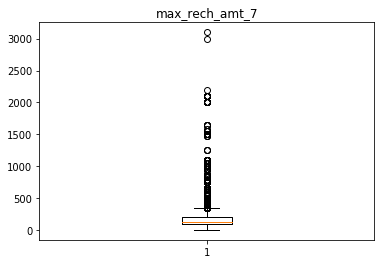

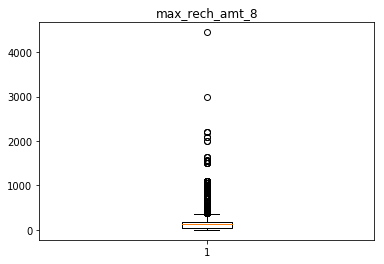

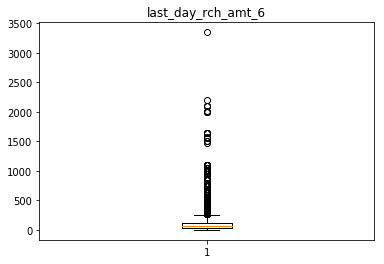

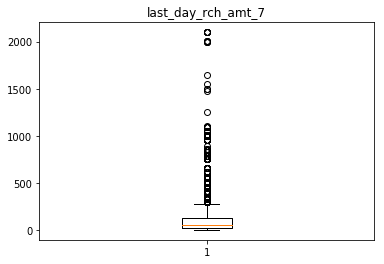

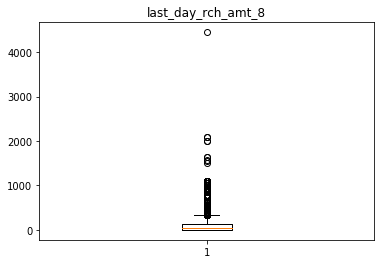

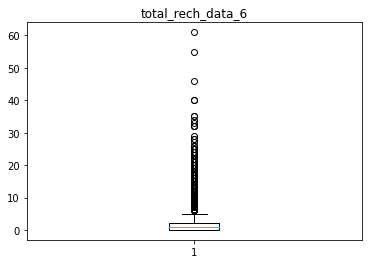

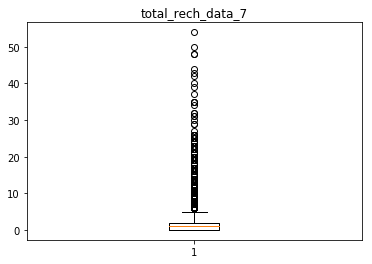

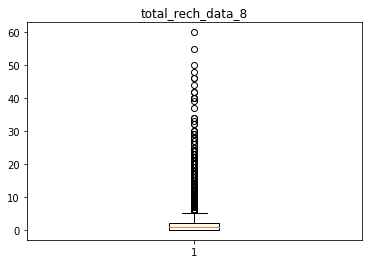

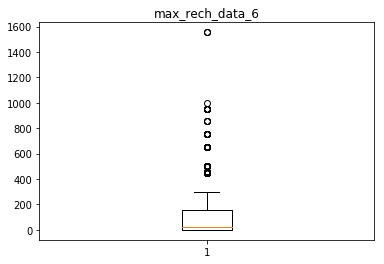

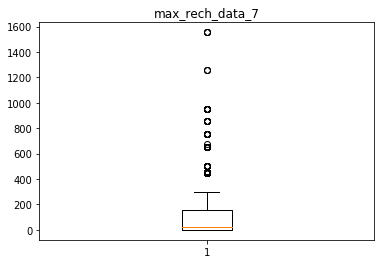

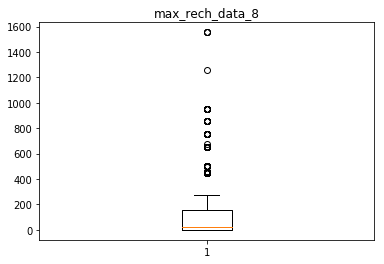

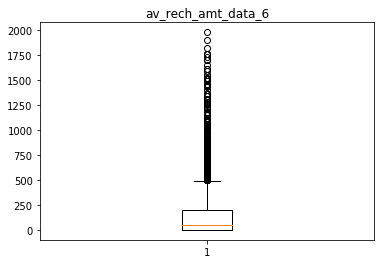

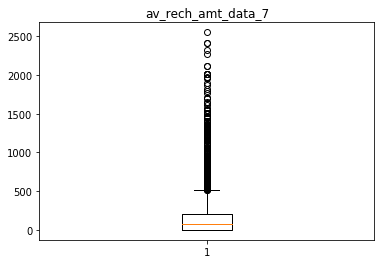

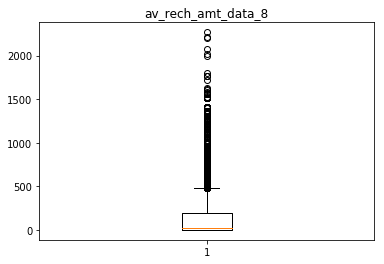

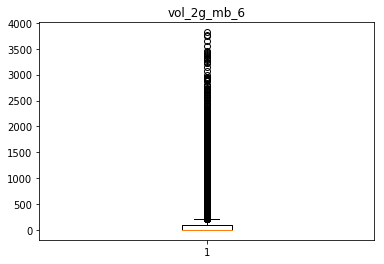

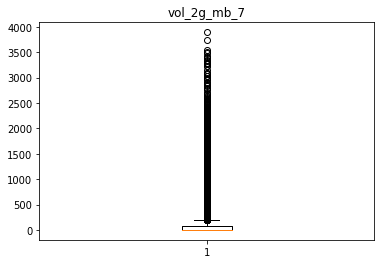

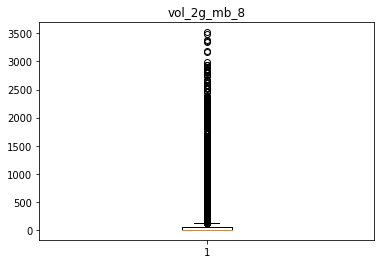

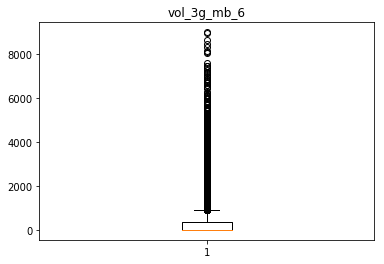

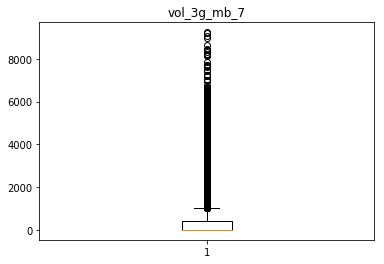

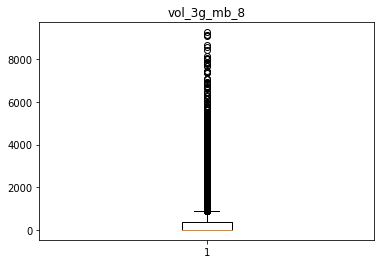

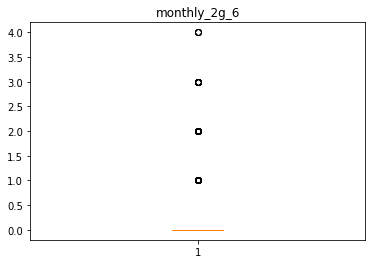

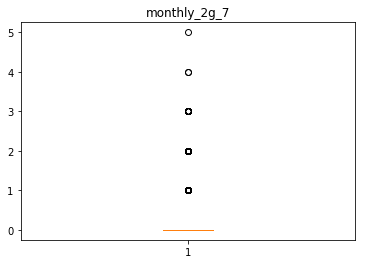

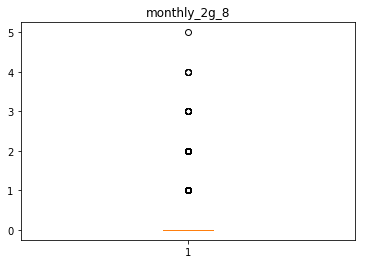

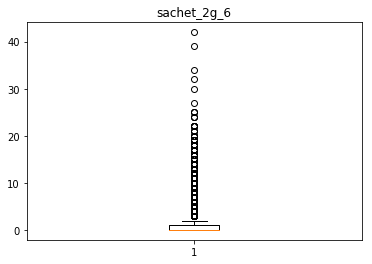

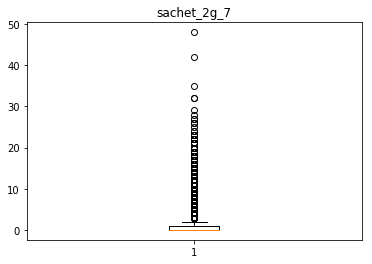

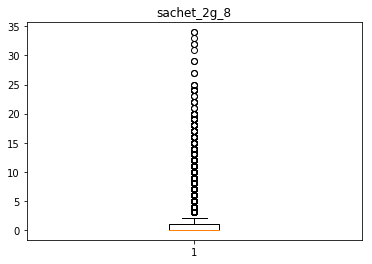

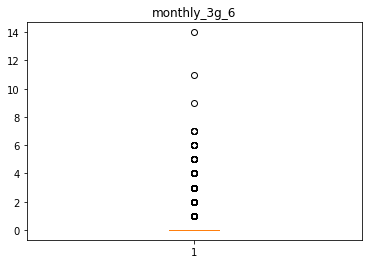

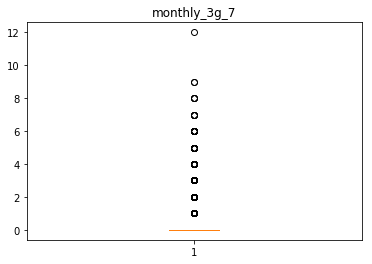

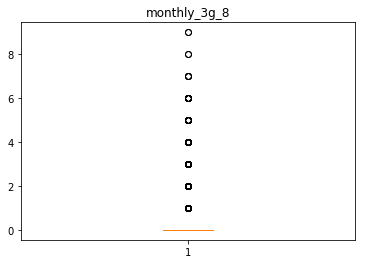

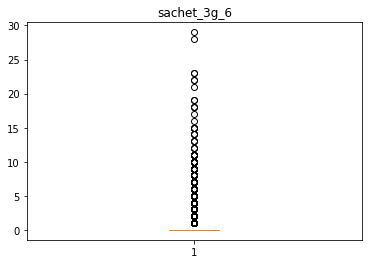

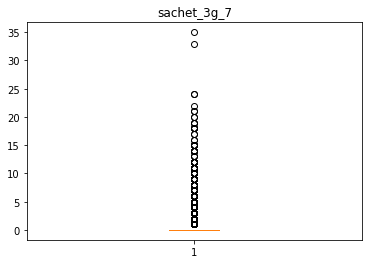

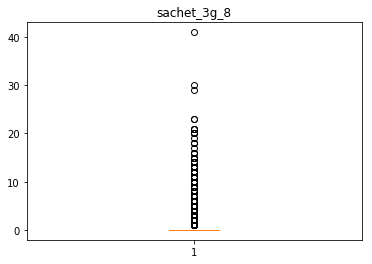

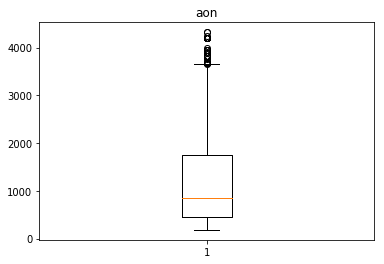

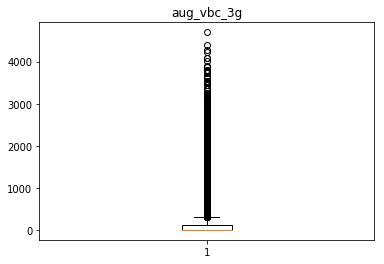

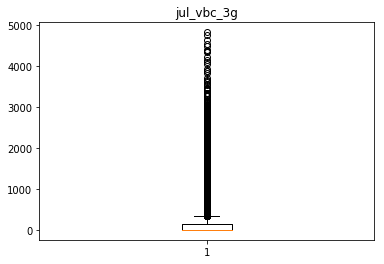

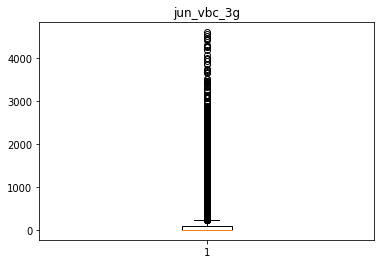

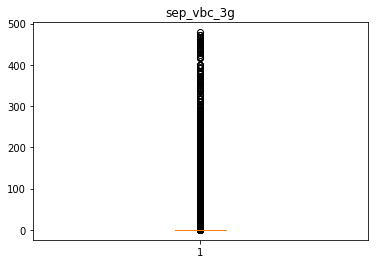

In [47]:
for col in hvc_filtered[num_var].columns:
    plt.boxplot(hvc_filtered[col])
    plt.title(col)
    plt.show()

In [48]:
# Using capping method for each column to remove outliers

for col in num_var:
    q1=hvc_filtered[col].quantile(0.1)
    q2=hvc_filtered[col].quantile(0.90)
    hvc_filtered[col]=hvc_filtered[col].clip(q1,q2)


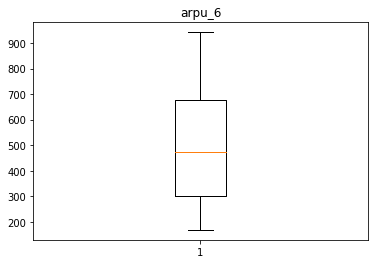

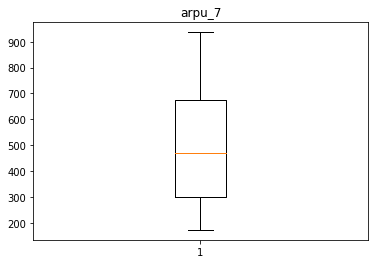

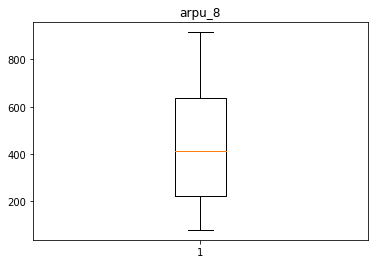

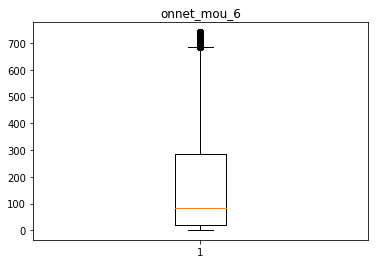

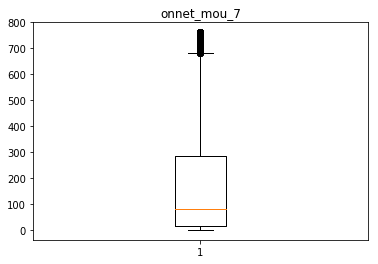

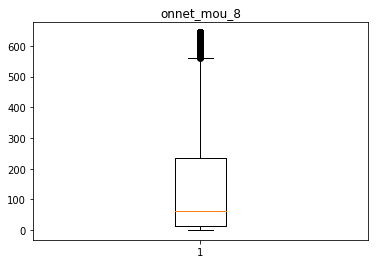

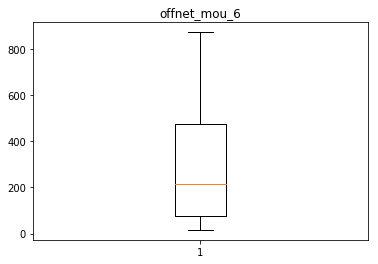

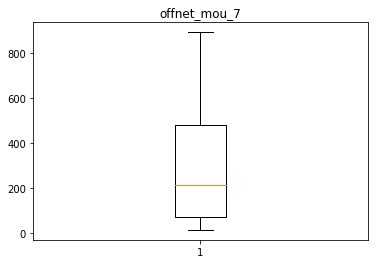

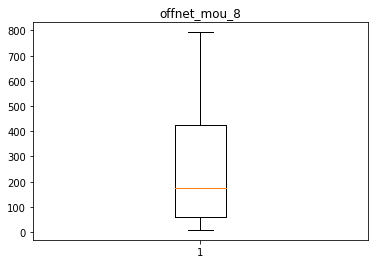

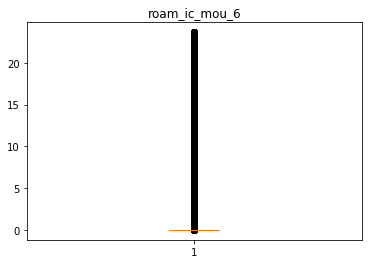

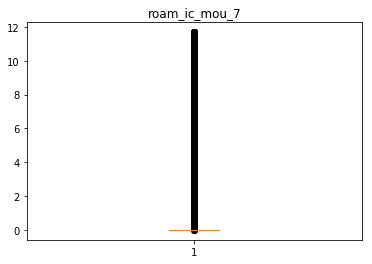

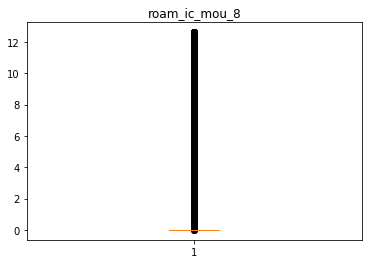

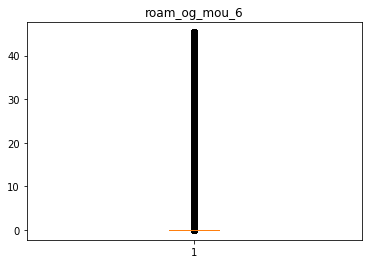

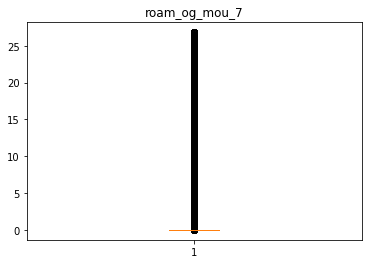

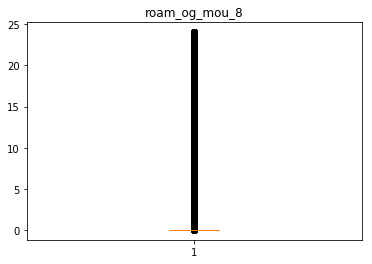

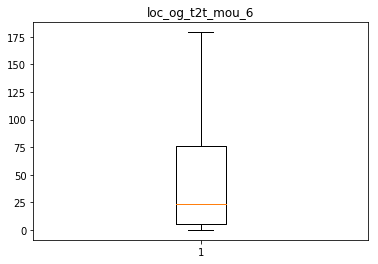

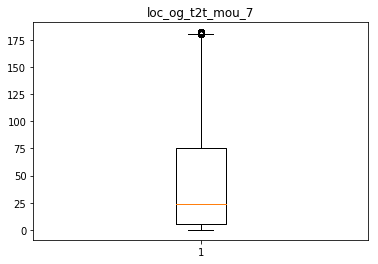

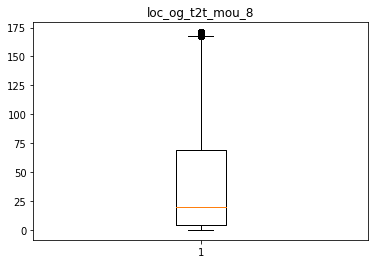

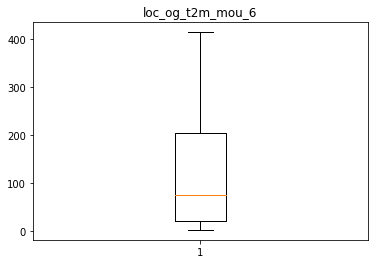

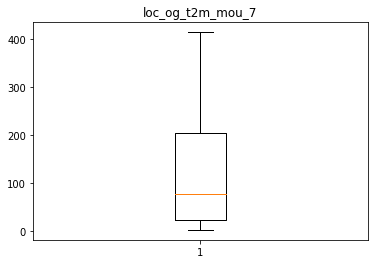

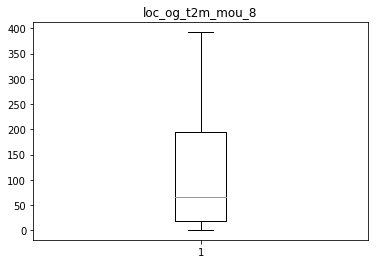

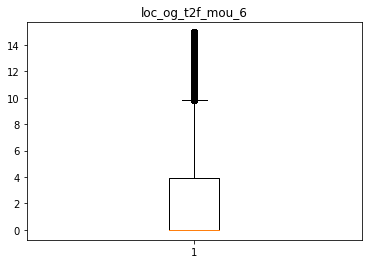

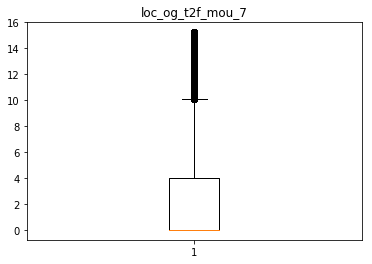

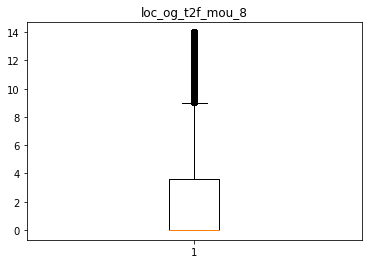

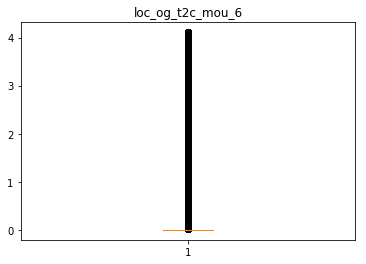

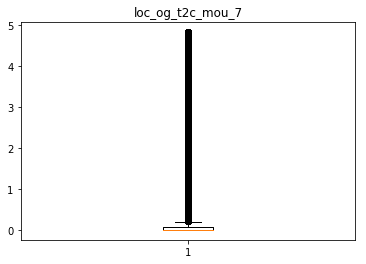

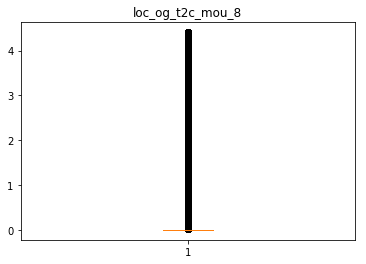

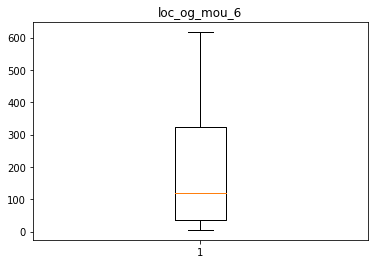

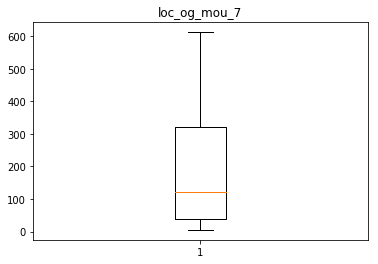

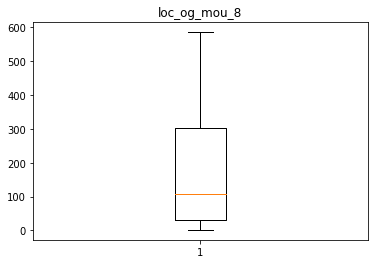

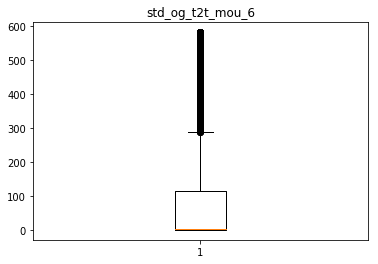

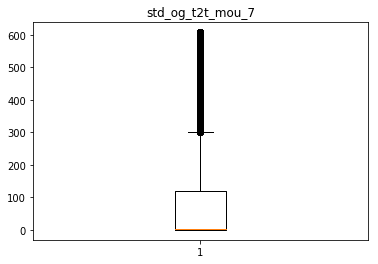

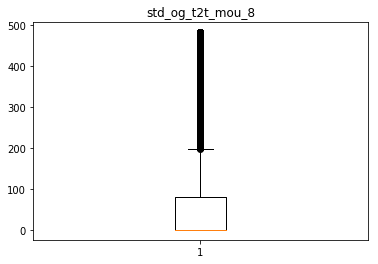

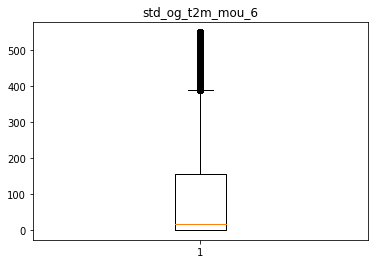

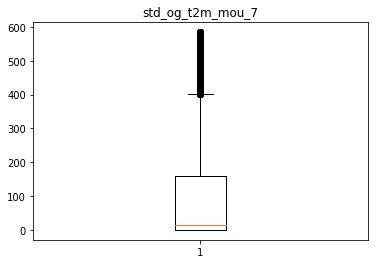

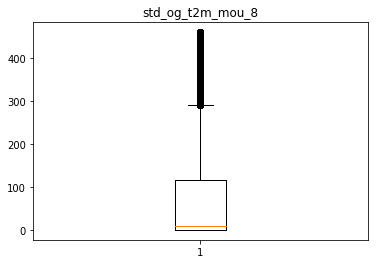

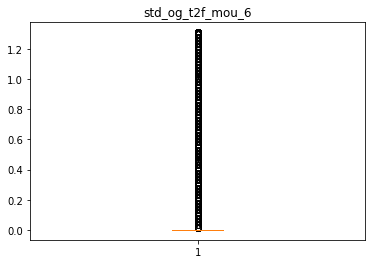

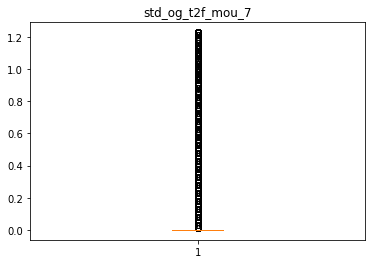

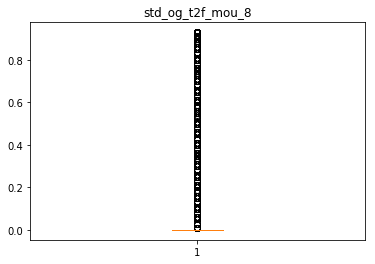

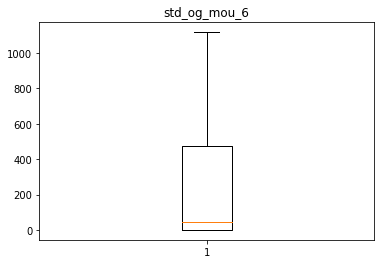

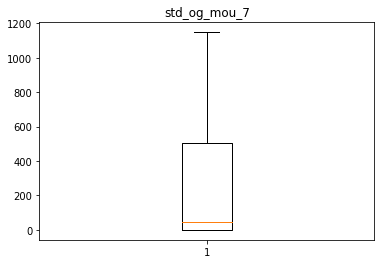

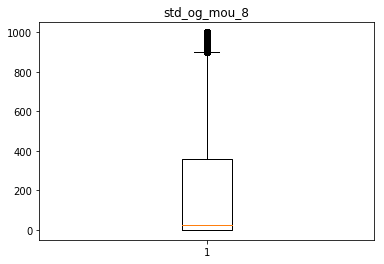

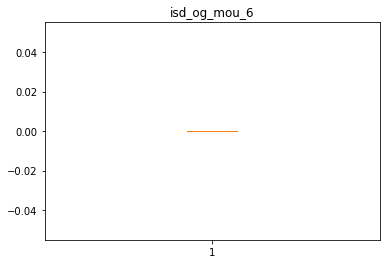

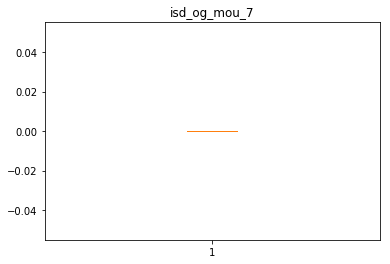

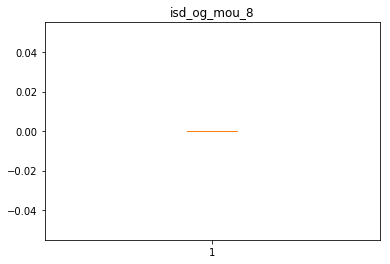

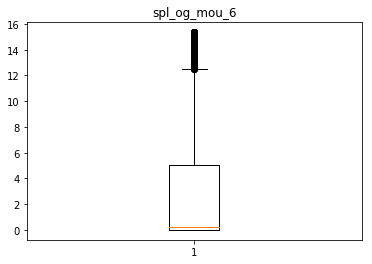

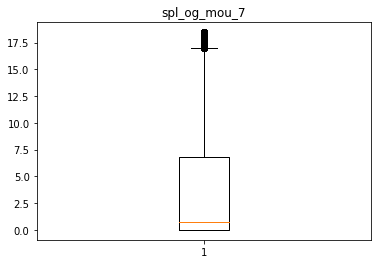

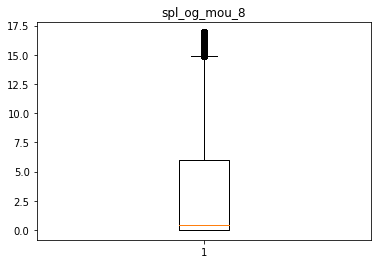

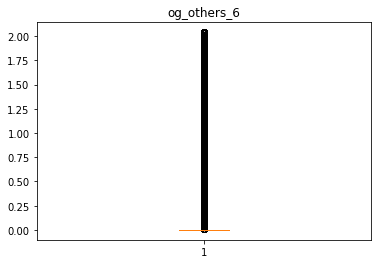

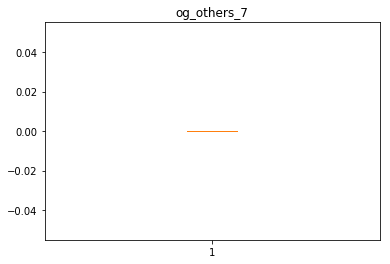

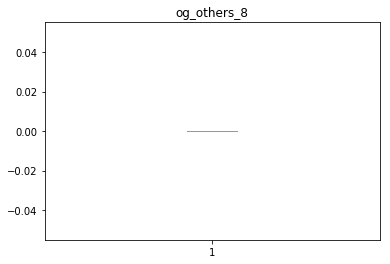

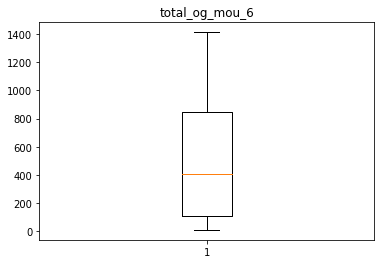

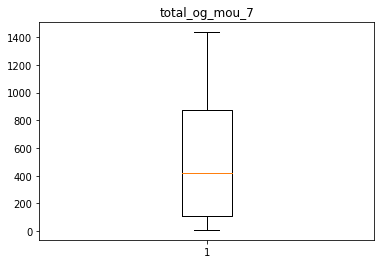

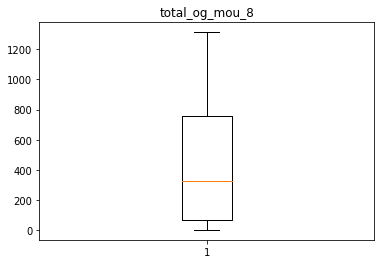

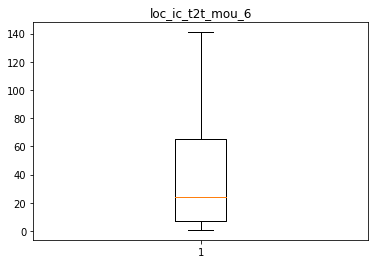

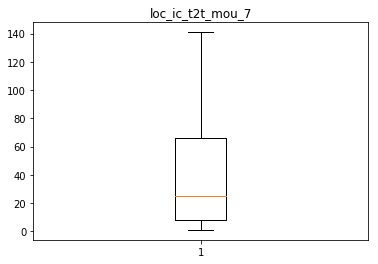

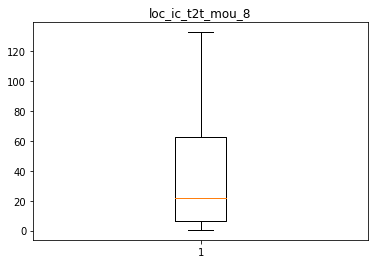

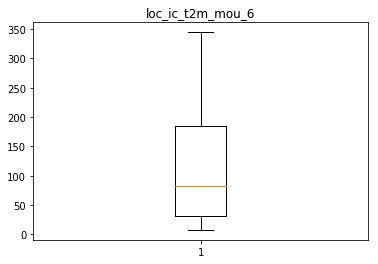

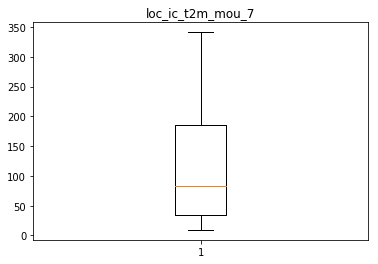

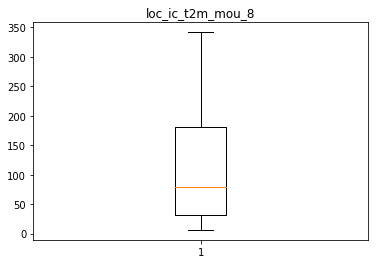

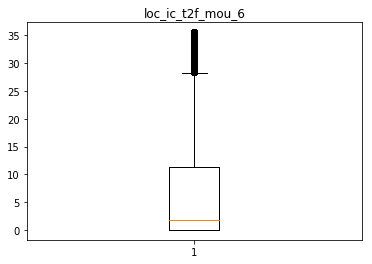

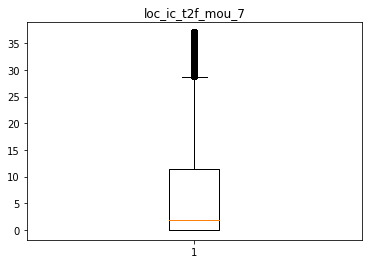

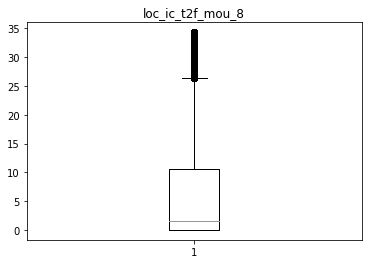

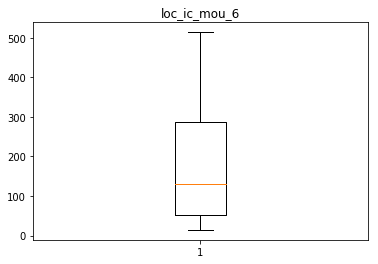

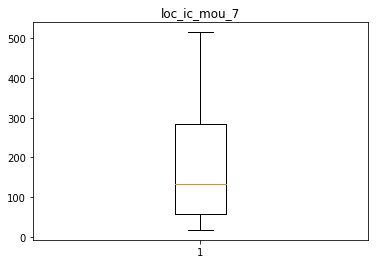

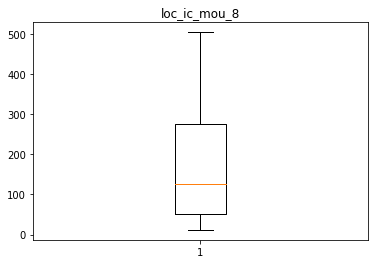

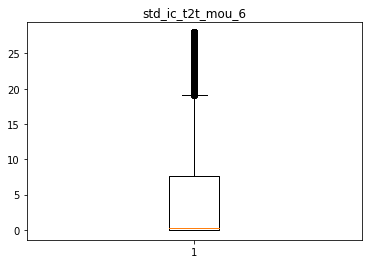

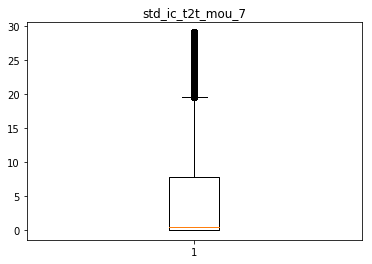

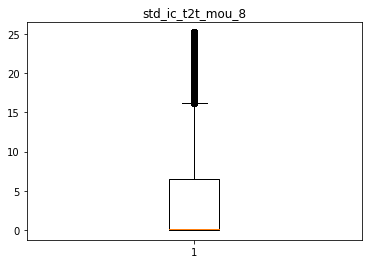

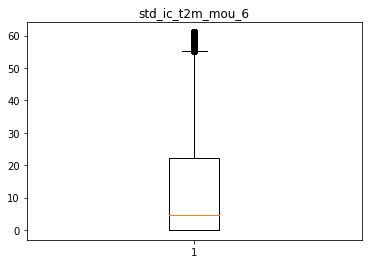

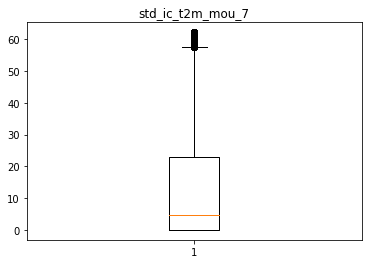

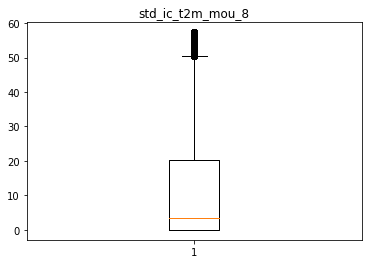

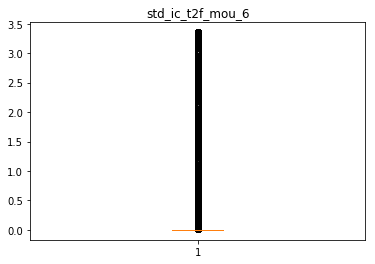

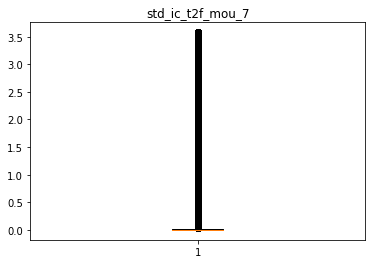

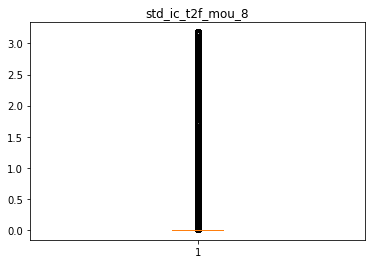

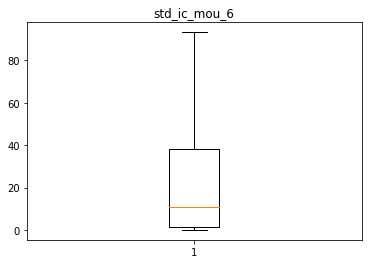

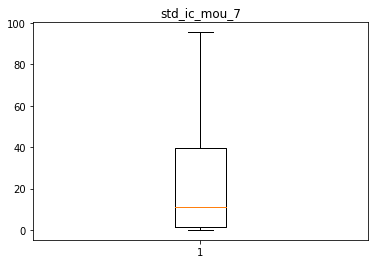

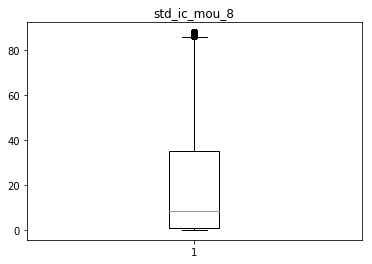

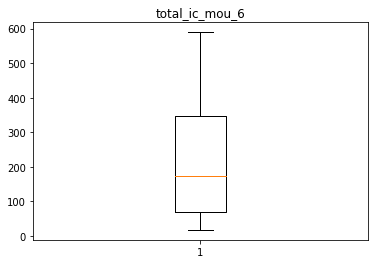

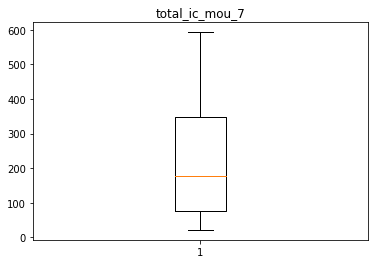

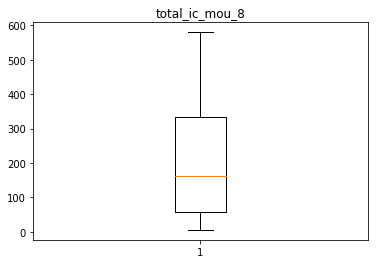

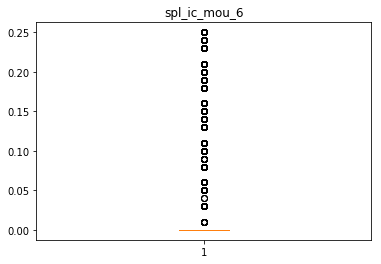

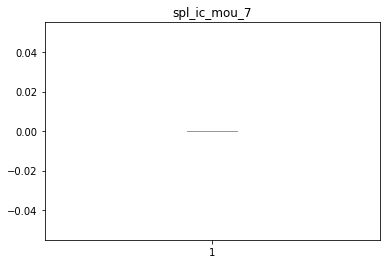

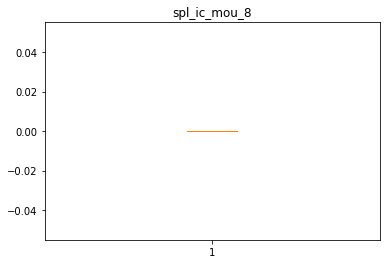

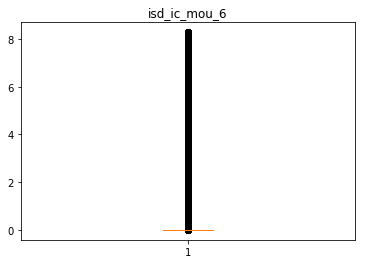

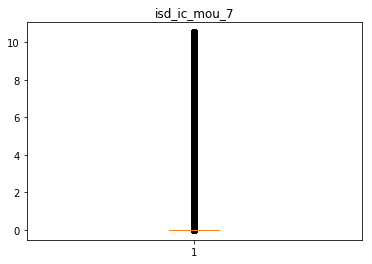

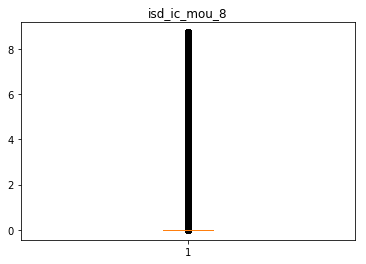

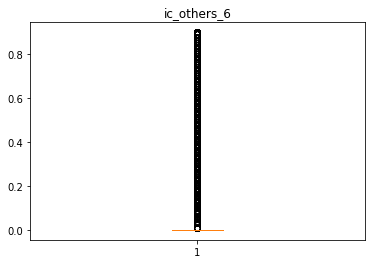

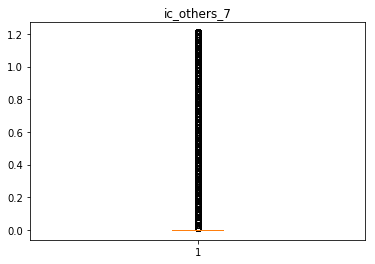

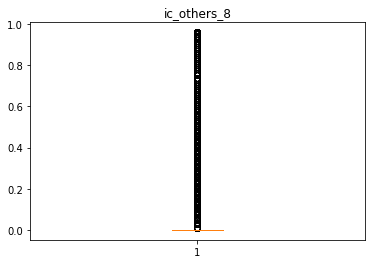

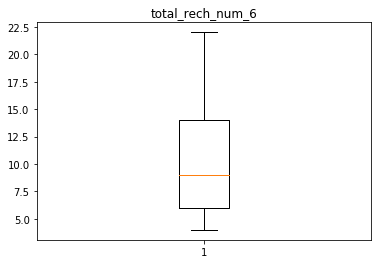

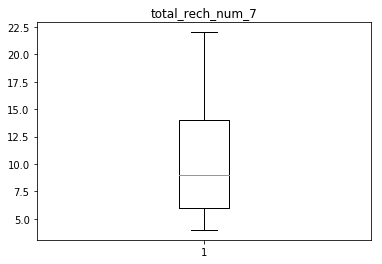

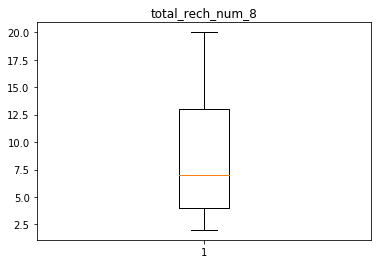

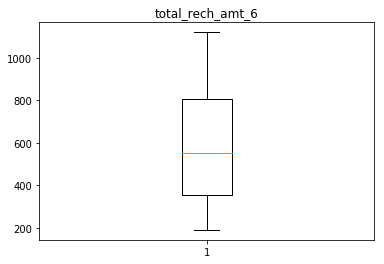

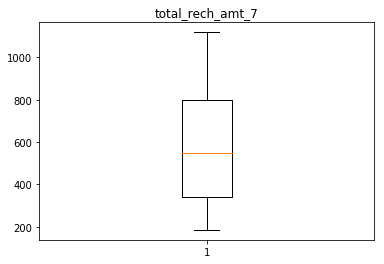

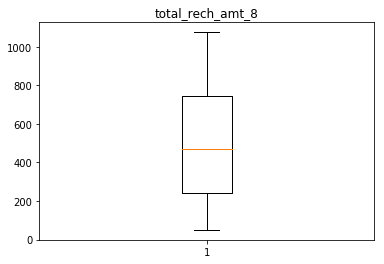

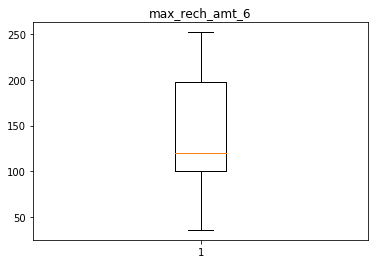

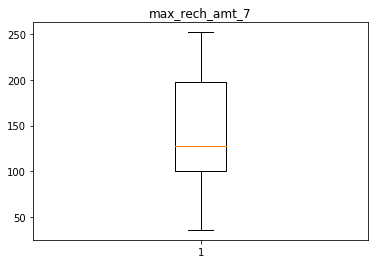

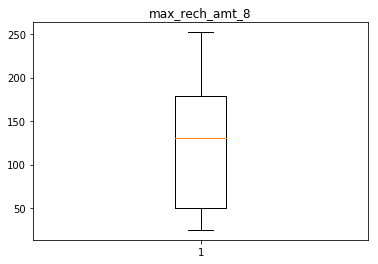

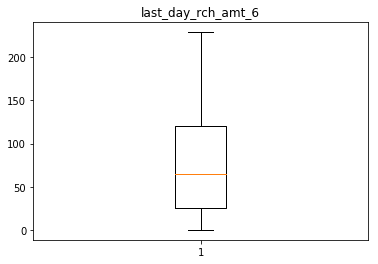

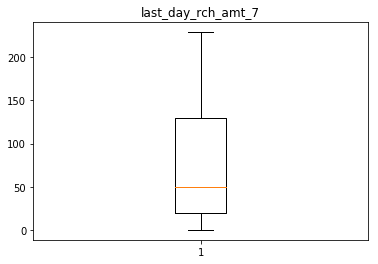

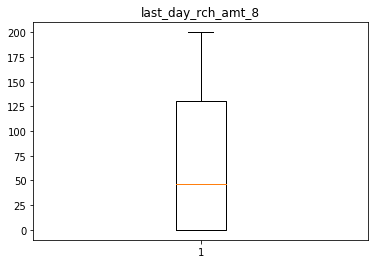

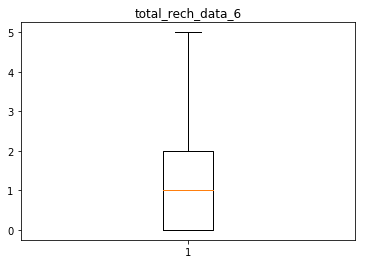

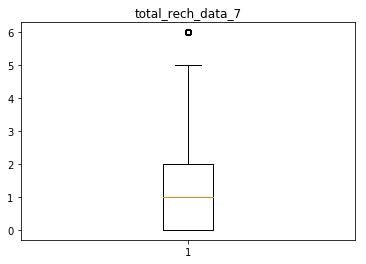

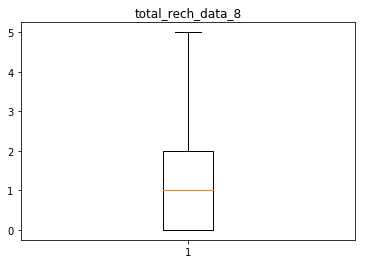

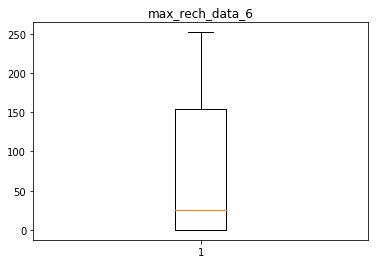

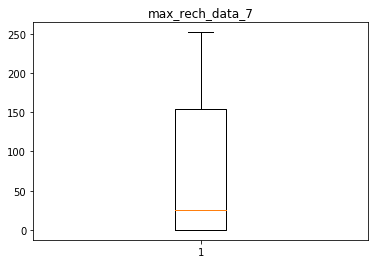

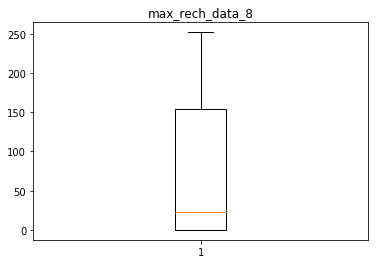

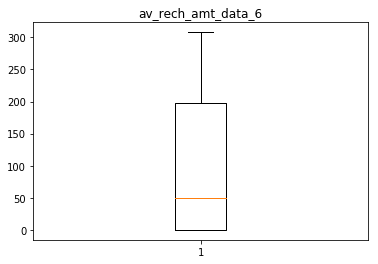

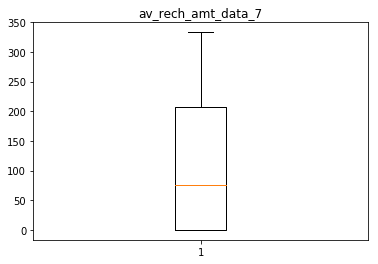

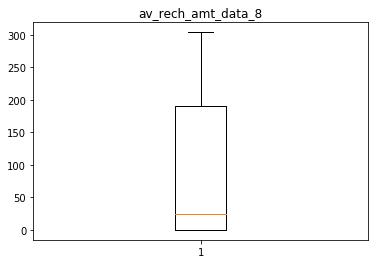

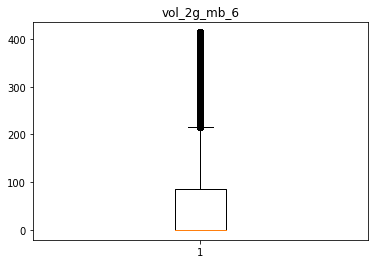

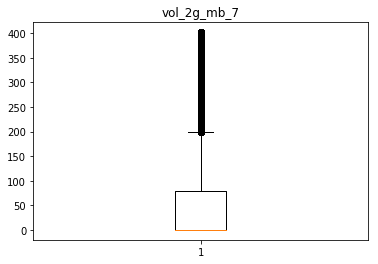

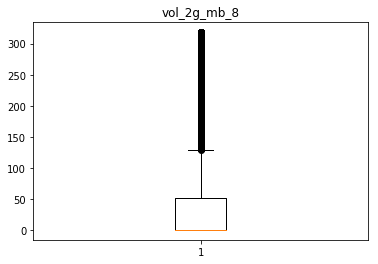

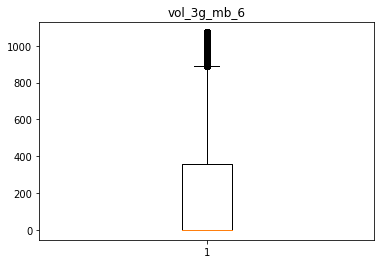

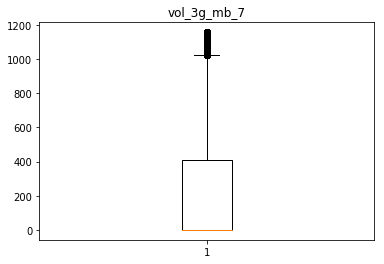

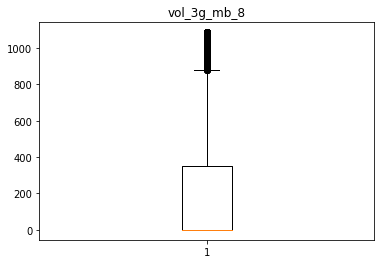

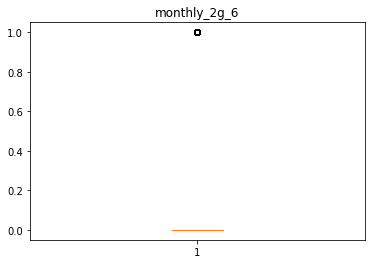

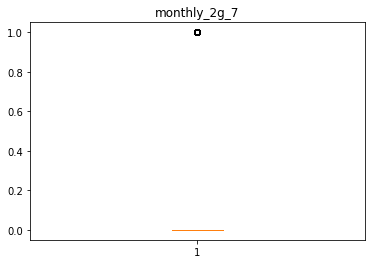

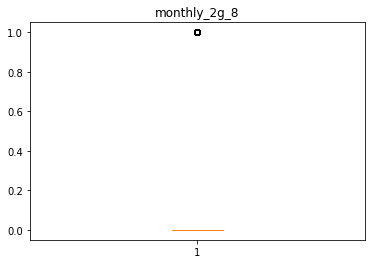

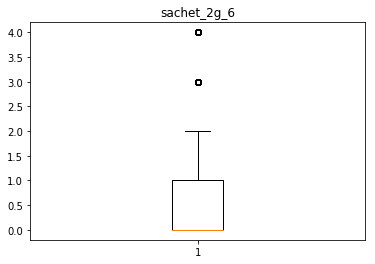

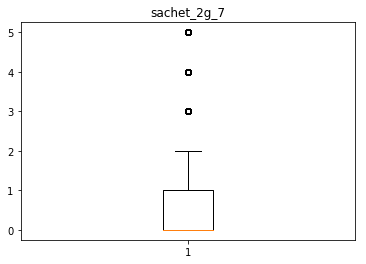

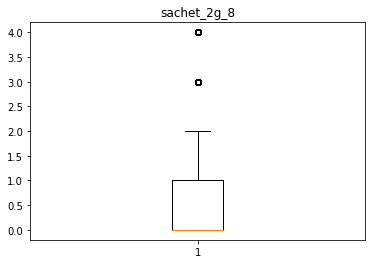

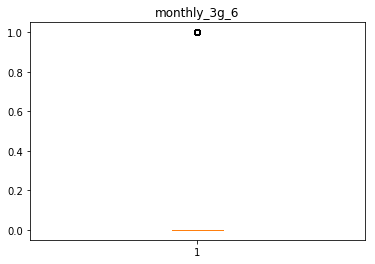

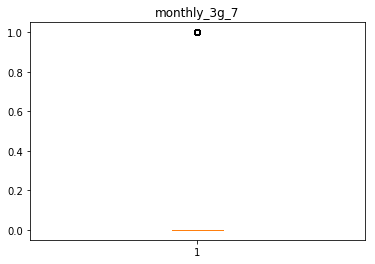

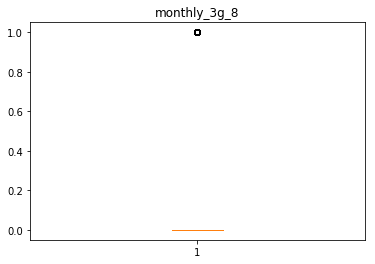

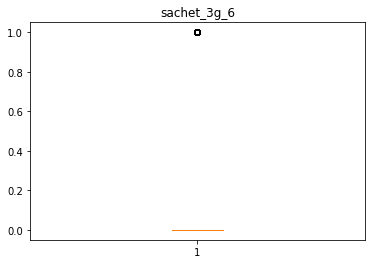

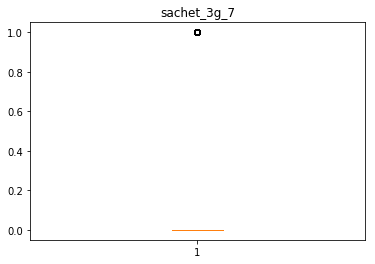

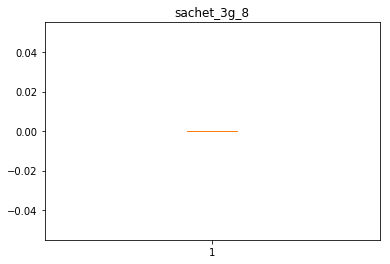

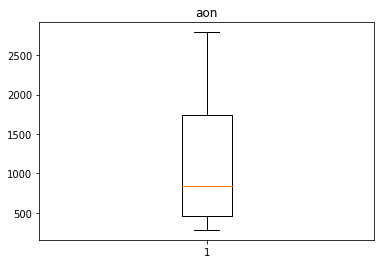

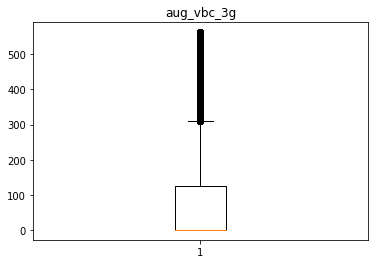

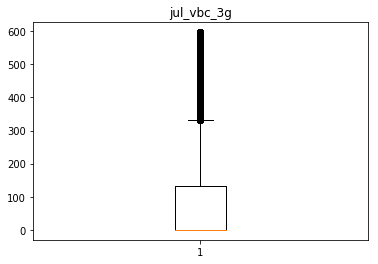

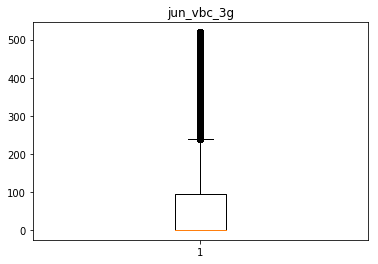

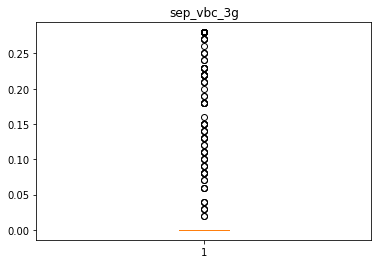

In [49]:
# Checking for outliers
for col in hvc_filtered[num_var].columns:
    plt.boxplot(hvc_filtered[col])
    plt.title(col)
    plt.show()

In [50]:
# Rename few of the columns:
hvc_filtered.rename(columns={'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'},inplace=True)


In [51]:
hvc_filtered.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
0     7000842753            6/30/2014            7/31/2014   
1     7000701601            6/30/2014            7/31/2014   
2     7001524846            6/30/2014            7/31/2014   
3     7002124215            6/30/2014            7/31/2014   
4     7000887461            6/30/2014            7/31/2014   

  last_date_of_month_8    arpu_6   arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0            8/31/2014  197.3850  214.816  213.8030        34.31        32.33   
1            8/31/2014  942.4530  936.457  914.6025        57.84        54.68   
2            8/31/2014  378.7210  492.223  137.3620       413.69       351.03   
3            8/31/2014  514.4530  597.753  637.7600       102.41       132.11   
4            8/31/2014  167.8805  193.897  366.9660        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.64         96.31        91.735         8.695           0.00   
1        52.29        453.43       567.160       325.910          16.23   
2        35.08         94.66        80.630       136.480           0.00   
3        85.14        757.93       891.470       792.985           0.00   
4        33.58         85.41        89.360       205.890           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          0.000           0.00           0.00           0.00          0.000   
1         11.685          12.61          23.74          12.59         24.035   
2          0.000           0.00           0.00           0.00          0.000   
3          0.000           0.00           0.00           0.00          0.000   
4          0.000           0.00           0.00           0.00          0.000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             11.91             11.61              0.00             41.03   
1             51.39             31.38             40.28            308.63   
2            179.13            181.91             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            40.430              0.71              0.00              0.00   
1           414.495            162.28             14.96             15.23   
2            70.580             50.54              0.00              0.00   
3            87.930            104.81              0.75              0.00   
4            83.010            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             14.00               0.0               0.0              0.00   
2              0.00               0.0               0.0              4.41   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0              4.41   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         65.11        63.685          1.61              0.00   
1        422.16       533.910        255.79              4.30   
2        378.09       288.180         63.04            116.56   
3         97.04        94.090        129.74             97.93   
4        131.91       133.680        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00             3.950             3.635   
1             23.29             12.01            49.890            31.760   
2            133.43             22.58            13.690            10.040   
3            125.94             61.79           549.825           584.170   
4              0.00              0.00         

## Deriving new variables

#### Deriving the number of days between date of last recharge and last date of the month

In [52]:
hvc_filtered['days_rech_lastdate_6']=hvc_filtered['last_date_of_month_6'].astype('datetime64[ns]')-hvc_filtered['date_of_last_rech_6'].astype('datetime64[ns]')
hvc_filtered['days_rech_lastdate_7']=hvc_filtered['last_date_of_month_7'].astype('datetime64[ns]')-hvc_filtered['date_of_last_rech_7'].astype('datetime64[ns]')
hvc_filtered['days_rech_lastdate_8']=hvc_filtered['last_date_of_month_8'].astype('datetime64[ns]')-hvc_filtered['date_of_last_rech_8'].astype('datetime64[ns]')

# Converting the datatype to float
hvc_filtered[['days_rech_lastdate_6','days_rech_lastdate_7','days_rech_lastdate_8']]=hvc_filtered[['days_rech_lastdate_6','days_rech_lastdate_7','days_rech_lastdate_8']].astype('timedelta64[D]')

# Converting the datatype to integer
hvc_filtered[['days_rech_lastdate_6','days_rech_lastdate_7','days_rech_lastdate_8']]=hvc_filtered[['days_rech_lastdate_6','days_rech_lastdate_7','days_rech_lastdate_8']].astype('int64')

hvc_filtered[['days_rech_lastdate_6','days_rech_lastdate_7','days_rech_lastdate_8']].head()

days_rech_lastdate_6  days_rech_lastdate_7  days_rech_lastdate_8
0                     9                    15                    23
1                     3                     6                     5
2                     5                     0                     1
3                     0                     0                     0
4                    12                    24                     7

In [53]:
# Dropping columns which have datatype = object
hvc_filtered.drop(['last_date_of_month_8','last_date_of_month_7','last_date_of_month_6','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)


In [54]:
hvc_filtered.head()

mobile_number    arpu_6   arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753  197.3850  214.816  213.8030        34.31        32.33   
1     7000701601  942.4530  936.457  914.6025        57.84        54.68   
2     7001524846  378.7210  492.223  137.3620       413.69       351.03   
3     7002124215  514.4530  597.753  637.7600       102.41       132.11   
4     7000887461  167.8805  193.897  366.9660        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.64         96.31        91.735         8.695           0.00   
1        52.29        453.43       567.160       325.910          16.23   
2        35.08         94.66        80.630       136.480           0.00   
3        85.14        757.93       891.470       792.985           0.00   
4        33.58         85.41        89.360       205.890           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          0.000           0.00           0.00           0.00          0.000   
1         11.685          12.61          23.74          12.59         24.035   
2          0.000           0.00           0.00           0.00          0.000   
3          0.000           0.00           0.00           0.00          0.000   
4          0.000           0.00           0.00           0.00          0.000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             11.91             11.61              0.00             41.03   
1             51.39             31.38             40.28            308.63   
2            179.13            181.91             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            40.430              0.71              0.00              0.00   
1           414.495            162.28             14.96             15.23   
2            70.580             50.54              0.00              0.00   
3            87.930            104.81              0.75              0.00   
4            83.010            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             14.00               0.0               0.0              0.00   
2              0.00               0.0               0.0              4.41   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0              4.41   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         65.11        63.685          1.61              0.00   
1        422.16       533.910        255.79              4.30   
2        378.09       288.180         63.04            116.56   
3         97.04        94.090        129.74             97.93   
4        131.91       133.680        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00             3.950             3.635   
1             23.29             12.01            49.890            31.760   
2            133.43             22.58            13.690            10.040   
3            125.94             61.79           549.825           584.170   
4              0.00              0.00             2.360             6.350   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              1.31              1.23              0.93   
2             75.69              0.00              0.00              0.00   
3            459.55              0.00              0.00              

In [55]:
hvc_filtered.shape

(27446, 139)

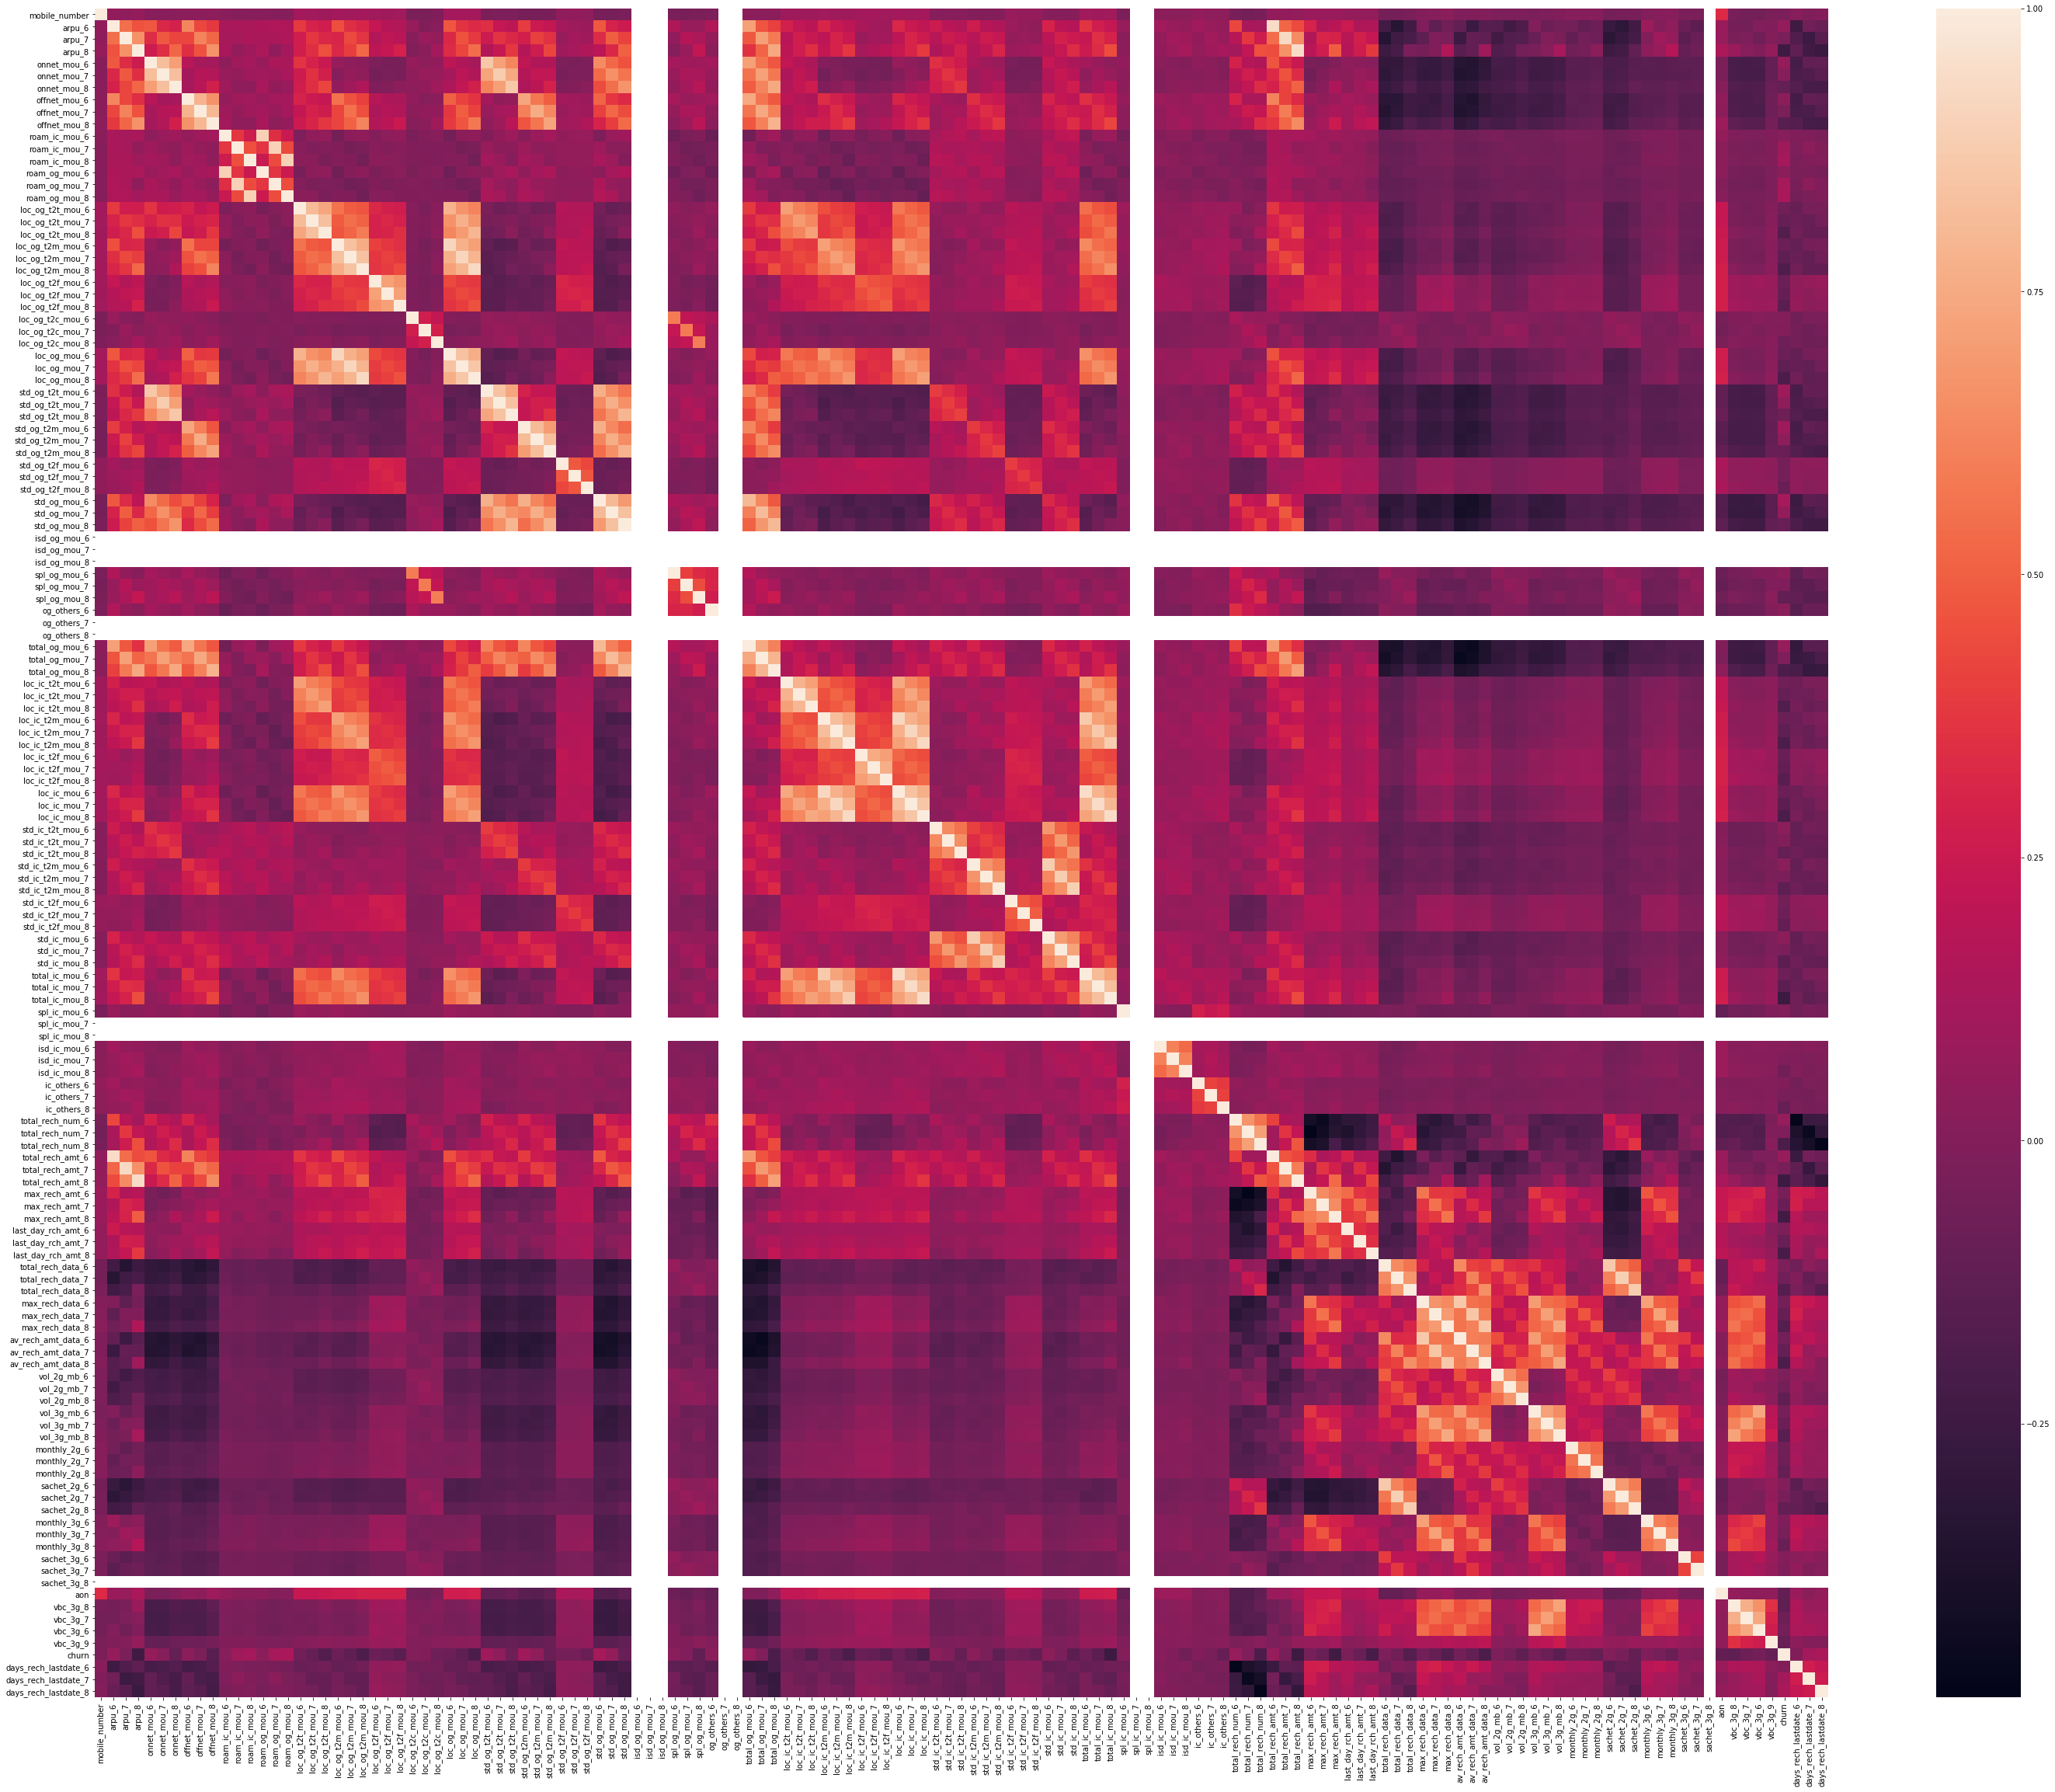

In [56]:
# Heat map
plt.figure(figsize=(50,40))
sns.heatmap(hvc_filtered.corr())
plt.show()

In [57]:
# Based on the heat map, removing few of the columns, which have high correlation
hvc_filtered.drop(['og_others_7','og_others_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_ic_mou_7','spl_ic_mou_8','sachet_3g_8'],axis=1,inplace=True)

In [58]:
hvc_filtered.shape

(27446, 131)

In [59]:
hvc_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27446 entries, 0 to 30000
Columns: 131 entries, mobile_number to days_rech_lastdate_8
dtypes: float64(102), int64(29)
memory usage: 27.6 MB


In [60]:
# Checking if any column is of datatype = object
for col in hvc_filtered.columns:
    if hvc_filtered[col].dtype=='object':
        print(col)

There are no columns of object datatype

In [61]:
# Saving all column names, except mobile_number, to list 'num_var'
num_var=[]
num_var=list(hvc_filtered.columns)
num_var.pop(0)
num_var.remove('churn')

### Segregating independent and dependent columns

In [62]:
# Defining a new dataframe which has only the independent columns
hvc_filtered_x = hvc_filtered.copy()
hvc_filtered_x.head()

# Defining a new dataframe which has only the dependent columns
hvc_filtered_y=pd.DataFrame()
hvc_filtered_y['churn'] = hvc_filtered.churn

In [63]:
hvc_filtered_x = hvc_filtered_x.drop(['mobile_number','churn'],axis=1)
hvc_filtered_x.head()

arpu_6   arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.3850  214.816  213.8030        34.31        32.33         0.64   
1  942.4530  936.457  914.6025        57.84        54.68        52.29   
2  378.7210  492.223  137.3620       413.69       351.03        35.08   
3  514.4530  597.753  637.7600       102.41       132.11        85.14   
4  167.8805  193.897  366.9660        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         96.31        91.735         8.695           0.00          0.000   
1        453.43       567.160       325.910          16.23         11.685   
2         94.66        80.630       136.480           0.00          0.000   
3        757.93       891.470       792.985           0.00          0.000   
4         85.41        89.360       205.890           0.00          0.000   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00          0.000   
1          12.61          23.74          12.59         24.035   
2           0.00           0.00           0.00          0.000   
3           0.00           0.00           0.00          0.000   
4           0.00           0.00           0.00          0.000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             11.91             11.61              0.00             41.03   
1             51.39             31.38             40.28            308.63   
2            179.13            181.91             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            40.430              0.71              0.00              0.00   
1           414.495            162.28             14.96             15.23   
2            70.580             50.54              0.00              0.00   
3            87.930            104.81              0.75              0.00   
4            83.010            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             14.00               0.0               0.0              0.00   
2              0.00               0.0               0.0              4.41   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0              4.41   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         65.11        63.685          1.61              0.00   
1        422.16       533.910        255.79              4.30   
2        378.09       288.180         63.04            116.56   
3         97.04        94.090        129.74             97.93   
4        131.91       133.680        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00             3.950             3.635   
1             23.29             12.01            49.890            31.760   
2            133.43             22.58            13.690            10.040   
3            125.94             61.79           549.825           584.170   
4              0.00              0.00             2.360             6.350   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              1.31              1.23              0.93   
2             75.69              0.00              0.00              0.00   
3            459.55              0.00              0.00              0.00   
4             39.61              0.00              0.00              0.00   

   std

In [64]:
hvc_filtered_x.shape

(27446, 129)

In [65]:
hvc_filtered_y.shape

(27446, 1)

In [66]:
hvc_filtered_y.head()

churn
0      1
1      1
2      0
3      0
4      0

### Scaling the features

In [67]:
temp=hvc_filtered_x.copy()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
pca_hvc_filtered_x=scaler.fit_transform(temp)

In [68]:
pca_hvc_filtered_x.max()

5.703674884864729

### PCA

In [69]:
import sklearn.linear_model as sklm ##Includes Logistic Regression, which will be tested for predictive capability
import sklearn.decomposition as skdc ##Includes Principal Component Analysis, a method of dimensionality reduction
import sklearn.pipeline as skpl ##Convenient module for calculating PCs and using them in logistic regression
from sklearn.model_selection import train_test_split

In [70]:
from sklearn.decomposition import PCA

# Copying the datasets to a new dataframe
pca_x=pca_hvc_filtered_x.copy()
pca_y=hvc_filtered_y.copy()


pca=PCA(svd_solver='randomized', random_state=42)
pca.fit(pca_x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [71]:
pca.components_

array([[ 1.33857380e-01,  1.44825417e-01,  1.43523280e-01, ...,
        -4.70719498e-02, -4.39276615e-02, -3.62961848e-02],
       [-2.41791524e-02, -3.11620415e-02,  2.66457983e-03, ...,
         6.96659208e-02,  5.15541303e-02,  5.10260683e-02],
       [ 7.28183144e-02,  1.05531855e-01,  1.09300162e-01, ...,
         7.01368450e-02,  4.50020783e-02,  3.38445431e-02],
       ...,
       [-7.34822604e-03,  7.47980947e-03, -6.88897024e-03, ...,
        -8.85042418e-04,  2.10485705e-03,  3.15523929e-04],
       [-4.65301375e-03,  2.94223444e-03, -4.38909642e-03, ...,
         6.62139353e-04, -2.78678430e-03,  2.45181949e-03],
       [ 6.03091947e-03, -5.07030311e-03,  2.57964697e-03, ...,
         2.54271484e-04, -1.61146638e-05, -8.52302104e-04]])

In [72]:
pca.explained_variance_ratio_

array([1.63564424e-01, 1.26670367e-01, 6.38012802e-02, 4.90742962e-02,
       3.97341217e-02, 3.04540442e-02, 2.75983467e-02, 2.42688686e-02,
       2.11768867e-02, 2.06214324e-02, 1.86492361e-02, 1.71125586e-02,
       1.66331699e-02, 1.47204840e-02, 1.44366915e-02, 1.39207640e-02,
       1.34820625e-02, 1.23598645e-02, 1.21615990e-02, 1.13381055e-02,
       1.00899352e-02, 9.50683944e-03, 8.76103264e-03, 8.50681246e-03,
       8.28360183e-03, 7.94369050e-03, 7.48336772e-03, 7.28734827e-03,
       7.23814971e-03, 7.05914916e-03, 6.95229551e-03, 6.73327049e-03,
       6.23790731e-03, 6.06533819e-03, 5.96459145e-03, 5.81613887e-03,
       5.74885044e-03, 5.65416832e-03, 5.35274971e-03, 5.15845646e-03,
       4.93305387e-03, 4.79527018e-03, 4.70391445e-03, 4.61438595e-03,
       4.56892145e-03, 4.38165418e-03, 4.30072320e-03, 4.26659266e-03,
       4.10810199e-03, 4.01923831e-03, 3.84297290e-03, 3.66233733e-03,
       3.63217785e-03, 3.58751692e-03, 3.48849549e-03, 3.45965546e-03,
      

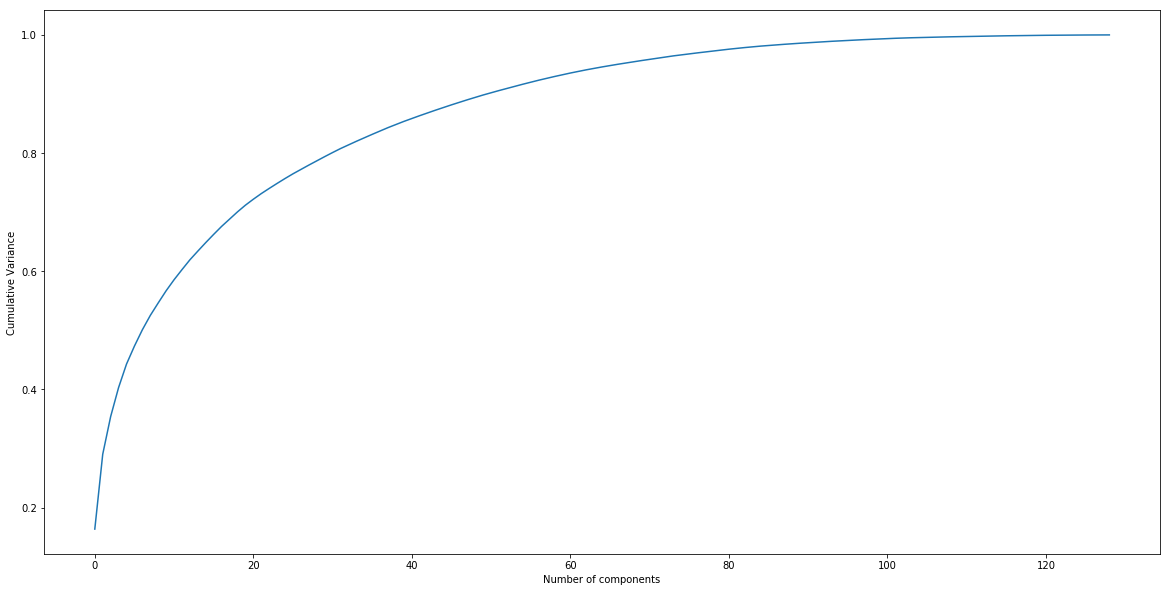

In [73]:
#plotting the scree plot
%matplotlib inline
fig=plt.figure(figsize=(20,10))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')
plt.savefig('pca_no')
plt.show()

###### 60 components account for about 90% of the variance

In [74]:
from sklearn.decomposition import IncrementalPCA
pca_final=IncrementalPCA(n_components=60)

In [75]:
df_pca=pca_final.fit_transform(pca_x)
df_pca.shape

(27446, 60)

In [76]:
pca_data = pd.DataFrame(df_pca)
print(pca_data.sample(5))

             0         1         2         3         4         5         6   \
681   -4.083845 -0.184617 -2.517170  6.015817  1.919659 -1.475134 -0.487355   
15487 -0.499543 -1.818772  4.768299  3.241919 -1.738588  0.178061 -2.504777   
11020  9.193678  1.968881 -0.036296  2.574096  2.176284  1.391356 -0.705924   
12376 -3.896760 -2.699829 -2.105997 -0.877442  0.588627  0.374678 -0.610446   
1625   1.289518  3.157766  6.493896 -0.901490  5.650104 -2.939548  3.090045   

             7         8         9         10        11        12        13  \
681    0.215444  1.739594  1.699402 -3.988034  4.598126 -1.017463 -0.525050   
15487  4.826528  1.116873 -0.772508  2.297142 -0.016308  0.952118  0.895217   
11020  7.292188 -2.996003  2.989804  0.434052 -0.402249 -0.811169  0.777572   
12376 -1.789681  0.527070  2.058982  0.060092  2.415877  1.693578 -1.805139   
1625   3.550642 -1.094910  1.224118  0.052472 -1.542232  1.050357  0.278591   

             14        15        16        17     

In [77]:
#pca_data['intercept'] = 1.0

In [78]:
# pca_data = pca_data.drop(['intercept'],axis=1)
#pca_data=pca_data.drop['intercept']
pca_data.head()

0         1         2         3         4         5         6   \
0 -6.077418 -3.235241  4.002247 -4.104872 -1.338744 -0.205351 -0.284906   
1  8.734284 -3.227050  1.749334 -1.323460  8.911096 -0.925743 -0.337049   
2 -3.155120  1.580067 -1.670612  0.823591 -1.976868  0.866241  0.400094   
3  2.771186  6.358162  0.504160  1.455596  1.437954 -4.588436  0.019628   
4 -2.620197 -2.391825  1.275224 -0.370231  0.207624 -0.297055 -2.166735   

         7         8         9         10        11        12        13  \
0 -0.552175 -1.566335  0.017469 -0.495881 -0.445518 -2.178452 -2.501974   
1  1.532194  2.592797 -4.347918 -0.703522  3.693633  1.588528  0.620516   
2  0.706360  0.322779  0.445230  0.854845 -0.452593 -0.655042  2.076108   
3 -1.718797 -2.102591  1.416220 -0.980096 -1.957498  1.560814  0.772461   
4 -1.892879 -2.777658 -0.097714  2.278341  3.443161 -2.136184 -0.639195   

         14        15        16        17        18        19        20  \
0  0.272751  0.463784  1.104671 -0.731224  0.652753  0.330392 -0.591969   
1 -0.672249 -1.401461  2.547926  0.229609 -0.000360 -0.226790  1.048568   
2  1.870207 -2.410641 -0.601753 -0.935355 -0.395856 -1.283376 -1.675039   
3 -0.569326 -0.399349 -0.011974 -0.506678  0.488168 -1.639735  0.886782   
4  0.360101  0.012599  1.976352 -2.698954  0.813619  0.647125 -1.234950   

         21        22        23        24        25        26        27  \
0 -0.178232 -1.174722  1.223356 -0.072110  1.192009 -1.068727 -0.270031   
1 -0.116271 -1.148412  0.058493 -0.158863  0.154147 -0.160270 -0.957393   
2 -0.011908  2.075512 -1.188628 -2.261616  0.528363  0.764111 -0.495492   
3  0.381760  0.800707 -0.319142  0.371747  0.252659 -0.213253 -0.531563   
4  0.699951  1.369228 -1.951994 -0.805346 -0.420392 -1.283399 -1.022305   

         28        29        30        31        32        33        34  \
0 -0.766941  0.813372  0.328098  0.102819 -0.415011 -0.620235  1.939850   
1 -0.627075  0.433940 -0.556366  0.537906  0.406352  1.354127  1.292581   
2 -1.406313 -1.765113  0.345620  0.367743  0.022298  0.888817  0.110603   
3  0.599971 -0.744190 -0.252009 -0.548370 -0.178568  0.144961  0.533371   
4 -2.943021  0.549883  0.072287  0.152303 -0.422357 -2.121870  0.317811   

         35        36        37        38        39        40        41  \
0 -0.608232  2.293653 -0.857935 -1.308894 -0.907666 -0.338326 -1.137187   
1  0.320781 -0.407398  1.235507 -0.418839 -0.568749  0.275734  0.628368   
2 -0.136788 -0.521349  1.124650 -0.172082  0.118812  0.675691 -0.115131   
3 -0.046519 -0.098793  0.135255 -0.206430  0.602650  0.241228 -0.382450   
4  0.108423  1.299174  3.683048  0.626161 -0.627450  0.138835  0.181097   

         42        43        44        45        46        47        48  \
0 -0.104066  0.242484  0.335691 -0.383708 -0.050599  0.936851  0.830319   
1  0.059630  0.943867  0.231515 -0.665379 -0.125449 -0.969256 -2.127061   
2  0.357048  0.741562 -0.992734 -0.931400  0.024296  0.668432 -0.846249   
3 -0.093975  0.112630  0.083648  0.132559 -0.037031  0.475509  0.365408   
4  0.879211 -0.940868  2.202227  1.085982  1.337506  0.127136  0.225035   

         49        50        51        52        53        54        55  \
0  1.420109 -0.136691 -0.016813 -0.234613  0.030829 -0.153336 -0.123288   
1 -1.827391 -0.331629  0.287623 -1.110306  0.299755 -0.827646  0.857194   
2  0.880534  0.188688 -0.397819 -0.365396  1.675914  1.110509  0.696979   
3  0.575332 -0.004522  0.547793 -0.638519  0.074803  0.303189 -0.204162   
4  0.413316 -0.225670 -0.178296 -1.021428 -0.306263 -0.296546 -0.891682   

         56        57        58        59  
0  0.264838  0.294223 -0.346943  0.094548  
1 -0.231453  0.379237 -0.092143  0.411344  
2 -0.082034  1.121198 -0.150505  0.010757  
3  0.335801  0.637170  0.534973  0.088273  
4  0.071910 -0.149170  0.478226  2.078870

### Splitting the dataset into train and test

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
Log_X_train, Log_X_test, Log_y_train, Log_y_test = train_test_split(pca_data, pca_y, test_size = 0.25, random_state = 4, stratify = pca_y)

##  Logistic Regression With PCA

In [81]:
Log_X_train.shape

(20584, 60)

In [82]:
Log_y_train.shape

(20584, 1)

In [83]:
Log_X_test.shape

(6862, 60)

In [84]:
Log_y_test.shape

(6862, 1)

In [85]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(solver = 'lbfgs')
#logisticRegr.fit(train_img, train_lbl)
rfe = RFE(logit_model,20)
fit=rfe.fit(Log_X_train, Log_y_train.values.ravel())
print("Num Features: %s" % (fit.n_features_))

Num Features: 20


In [86]:
#from sklearn.linear_model import LogisticRegression
#logit_model = LogisticRegression().fit(Log_X_train, Log_y_train)

In [87]:
#list(sorted(zip(hvc_filtered_x1.head().columns,fit.support_,fit.ranking_)))
list(sorted(zip(fit.ranking_,fit.support_,hvc_filtered_x.head().columns,)))

[(1, True, 'arpu_6'),
 (1, True, 'arpu_7'),
 (1, True, 'loc_ic_t2t_mou_6'),
 (1, True, 'loc_og_t2f_mou_8'),
 (1, True, 'loc_og_t2m_mou_8'),
 (1, True, 'loc_og_t2t_mou_7'),
 (1, True, 'loc_og_t2t_mou_8'),
 (1, True, 'offnet_mou_6'),
 (1, True, 'offnet_mou_7'),
 (1, True, 'offnet_mou_8'),
 (1, True, 'onnet_mou_6'),
 (1, True, 'roam_og_mou_7'),
 (1, True, 'roam_og_mou_8'),
 (1, True, 'spl_og_mou_7'),
 (1, True, 'std_og_t2f_mou_6'),
 (1, True, 'std_og_t2f_mou_7'),
 (1, True, 'std_og_t2m_mou_7'),
 (1, True, 'std_og_t2m_mou_8'),
 (1, True, 'total_og_mou_7'),
 (1, True, 'total_og_mou_8'),
 (2, False, 'std_og_t2m_mou_6'),
 (3, False, 'loc_og_mou_6'),
 (4, False, 'spl_og_mou_6'),
 (5, False, 'loc_ic_t2t_mou_7'),
 (6, False, 'loc_og_t2c_mou_7'),
 (7, False, 'loc_ic_t2t_mou_8'),
 (8, False, 'std_og_t2t_mou_6'),
 (9, False, 'loc_og_t2m_mou_7'),
 (10, False, 'roam_og_mou_6'),
 (11, False, 'loc_ic_mou_6'),
 (12, False, 'loc_ic_t2f_mou_8'),
 (13, False, 'std_og_mou_6'),
 (14, False, 'std_og_t2t_mou_7

 ##### Top features based on ranking 'arpu_6', 'arpu_7', 'loc_ic_mou_6','loc_ic_t2t_mou_6','loc_og_t2f_mou_8'

In [88]:
Log_y_predict_proba = fit.predict_proba(Log_X_test)

In [89]:
cutoff = 0.5
Log_y_predict = [int(proba[1] > cutoff) for proba in Log_y_predict_proba]

In [90]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(Log_y_test, Log_y_predict)
n_len = len(Log_y_test)
print(M)
print('Accuracy:  %.2f' % ((M[0][0] + M[1][1]) / n_len))
print('Precision: %.2f' % (M[1][1] / (M[0][1] + M[1][1])))
print('Recall:    %.2f' % (M[1][1] / (M[1][0] + M[1][1])))
print('Sensitivity:    %.2f' % (M[1][1] / (M[1][1] + M[1][0])))
print('Specificity:    %.2f' % (M[0][0] / (M[0][0] + M[0][1])))

[[6199  111]
 [ 381  171]]
Accuracy:  0.93
Precision: 0.61
Recall:    0.31
Sensitivity:    0.31
Specificity:    0.98


### HYPER PARAMETER TUNING-LOGISTIC REGRESSION

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# making skeletal model
logistic_regression = LogisticRegression(n_jobs = -1)

# Set of parameters we want to try for out Model
parameters = { 'C' : [1.1,1.25,1.5]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = logistic_regression, param_grid = parameters , scoring = 'accuracy', cv = 3, n_jobs = -1 , verbose = 2)
grid_scores = grid_search.fit(Log_X_train, Log_y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   39.8s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   40.2s finished
C:\Users\Anupama\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
print( grid_search.best_score_)


0.9273707636332701


In [93]:
print(grid_search.best_params_)

{'C': 1.1}


In [94]:
# Making the Final Classification model.
import datetime
logistic_regression = LogisticRegression( C = 1.1, n_jobs = -1)
tick =datetime.datetime.now()
logistic_regression.fit(Log_X_train, Log_y_train)
tock=datetime.datetime.now()
lr_train_time = tock - tick
print("Time taken for training a Logistic Regression model = " + str(lr_train_time))

C:\Users\Anupama\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time taken for training a Logistic Regression model = 0:00:03.289785


### Predicting values on training set

In [95]:
tick=datetime.datetime.now()
lr_train_predict=logistic_regression.predict(Log_X_train)
tock=datetime.datetime.now()
lr_pred_train_time = tock - tick
print('Time taken to predict the data points in the Test set is : ' + str(lr_pred_train_time))

Time taken to predict the data points in the Test set is : 0:00:00.015468


In [96]:
acc = logistic_regression.score(Log_X_train, Log_y_train)
print('the Accuracy on the Training set come out to be : ' + str(acc))

the Accuracy on the Training set come out to be : 0.9294597745821997


In [97]:
import sklearn.metrics as skm
print(skm.classification_report( Log_y_train , lr_train_predict ))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     18928
           1       0.62      0.32      0.42      1656

    accuracy                           0.93     20584
   macro avg       0.78      0.65      0.69     20584
weighted avg       0.92      0.93      0.92     20584



In [98]:
predict = logistic_regression.predict(Log_X_test)
print(predict)

[0 0 0 ... 0 0 0]


In [99]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(Log_y_test, predict)
n_len = len(Log_y_test)
print('Confusion matrix for Test set:\n')
print(M)
print()
accuracy_log=((M[0][0] + M[1][1]) / n_len)
precision_log=(M[1][1] / (M[0][1] + M[1][1]))
sensitivity_log = (M[1][1] / (M[1][1] + M[1][0]))
specificity_log = (M[0][0] / (M[0][0] + M[0][1]))
print('Accuracy:  %.2f' % ((M[0][0] + M[1][1]) / n_len))
print('Precision: %.2f' % (M[1][1] / (M[0][1] + M[1][1])))
print('Recall:    %.2f' % (M[1][1] / (M[1][0] + M[1][1])))
print('Sensitivity:    %.2f' % (M[1][1] / (M[1][1] + M[1][0])))
print('Specificity:    %.2f' % (M[0][0] / (M[0][0] + M[0][1])))

Confusion matrix for Test set:

[[6188  122]
 [ 361  191]]

Accuracy:  0.93
Precision: 0.61
Recall:    0.35
Sensitivity:    0.35
Specificity:    0.98


In [100]:
overall_metrics=pd.DataFrame({'Model':'Logistic Regression','Accuracy':accuracy_log,'Precision':precision_log,
                             'Sensitivity':sensitivity_log,'Specificity':specificity_log},index=[0])
overall_metrics

Model  Accuracy  Precision  Sensitivity  Specificity
0  Logistic Regression  0.929612   0.610224     0.346014     0.980666

### Decision Tree using PCA

In [101]:
DT_X_train, DT_X_test, DT_y_train, DT_y_test = train_test_split(pca_data, pca_y, train_size = 0.75, random_state = 4, stratify = pca_y)

In [102]:
DT_y_train['churn']=DT_y_train['churn'].apply(lambda x:'Churn' if x==1 else 'Not Churn')
DT_y_test['churn']=DT_y_test['churn'].apply(lambda x:'Churn' if x==1 else 'Not Churn')

C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
# Creating a decision tree
dt_pca = DecisionTreeClassifier(max_depth=3,random_state=10)
dt_pca.fit(DT_X_train, DT_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [105]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features in a new list
features = list(DT_X_train.columns[0:])

C:\Users\Anupama\anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [106]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

In [107]:
# Exporting the decision tree to a PDF
dot_data = StringIO()  
export_graphviz(dt_pca, out_file=dot_data,
                feature_names=features,class_names=dt_pca.classes_ , filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("dt_pca_churn.pdf")

True

In [108]:
# Path where the PDF is located
os.getcwd()

'C:\\Users\\Anupama\\Documents\\UpGrad-Data Science\\UpGrad Online Platform Material\\Case_Study_Telecom_Churn'

In [109]:
# Decision tree prediction on test_x set
dt_pred=dt_pca.predict(DT_X_test)
dt_pred_y=pd.DataFrame({'Predicted':dt_pred})

# Finding the confusion matrix
confusion = confusion_matrix(DT_y_test, dt_pred_y.Predicted )
confusion

array([[  73,  479],
       [  47, 6263]], dtype=int64)

In [110]:
# Defining each element in the confusion matrix
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [111]:
# Sensitivity
sensitivity_dt_pca=TP / float(TP+FN)
print('Sensitivity of Decision Tree =',TP / float(TP+FN))

Sensitivity of Decision Tree = 0.9925515055467512


In [112]:
# Precision 
precision_dt_pca=TP / float(TP+FP)
print ('Precision of Decision Tree =',TP / float(TP+FP))

Precision of Decision Tree = 0.9289528329872442


In [113]:
# Accuracy
accuracy_dt_pca=(TP+TN)/float(TP+TN+FP+FN)
print('Accuracy of Decision Tree =',(TP+TN)/float(TP+TN+FP+FN))

Accuracy of Decision Tree = 0.9233459632760128


In [114]:
# Specificity
specificity_dt_pca = TN/ float(TN+FP)

print('Specifity of Decision Tree =',TN / float(TN+FP))

Specifity of Decision Tree = 0.1322463768115942


In [115]:
temp=pd.DataFrame({'Model':'Decision Tree - PCA','Accuracy':accuracy_dt_pca,'Precision':precision_dt_pca,
                             'Sensitivity':sensitivity_dt_pca,'Specificity':specificity_dt_pca},index=[1])
overall_metrics=pd.concat([overall_metrics,temp],axis=0)
overall_metrics

Model  Accuracy  Precision  Sensitivity  Specificity
0  Logistic Regression  0.929612   0.610224     0.346014     0.980666
1  Decision Tree - PCA  0.923346   0.928953     0.992552     0.132246

### Random Forest using PCA

In [116]:
# Splitting pca dataset into train and test sets
RF_X_train, RF_X_test, RF_y_train, RF_y_test = train_test_split(pca_data, pca_y, train_size = 0.75, random_state = 4, stratify = pca_y)

In [117]:
from sklearn.ensemble import RandomForestClassifier

###### Using default parameters

In [118]:
rfc=RandomForestClassifier()
rfc.fit(RF_X_train,RF_y_train)

C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
rfc_pred = rfc.predict(RF_X_test)
rfc_pred_y=pd.DataFrame({'Predicted':rfc_pred})

In [120]:
# Finding the confusion matrix
confusion = confusion_matrix(RF_y_test, rfc_pred_y.Predicted )
confusion

array([[6273,   37],
       [ 473,   79]], dtype=int64)

In [121]:
# Defining each element in the confusion matrix
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [122]:
# Precision
print ('Precision of Random Forest =',TP / float(TP+FP))

Precision of Random Forest = 0.6810344827586207


In [123]:
# Sensitivity
print ('Sensitivity of Random Forest =',TP / float(TP+FN))

Sensitivity of Random Forest = 0.1431159420289855


The sensitivity is very poor thus hyperparameter tuning will be performed

##### Hyperparameter Tuning on Random Forest by finding optimal values

In [124]:
from sklearn.model_selection import GridSearchCV

# parameters to build the model on
parameters = {    'max_depth': [5,10,15,20],
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10, 20] }

# instantiate the model
rfc = RandomForestClassifier()


# fit tree on training data
grid_search = GridSearchCV(estimator = rfc, param_grid = parameters, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [125]:
# Execution time = 30 mins
grid_search.fit(RF_X_train,RF_y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 25.5min finished
C:\Users\Anupama\anaconda\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [126]:
print('Best Accuracy =',grid_search.best_score_)

Best Accuracy = 0.9291195886484326


In [127]:
print('Best parameters to use =', grid_search.best_params_)

Best parameters to use = {'max_depth': 15, 'max_features': 20, 'n_estimators': 300}


In [128]:
rfc = RandomForestClassifier(max_depth=15,max_features=20,n_estimators=300)

In [129]:
rfc.fit(RF_X_train,RF_y_train)

predictions = rfc.predict(RF_X_test)

C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [130]:
# Finding the confusion matrix
confusion = confusion_matrix(RF_y_test, predictions)
confusion

array([[6252,   58],
       [ 425,  127]], dtype=int64)

In [131]:
# Defining each element in the confusion matrix
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [132]:
# Precision
precision_rf_pca=TP / float(TP+FP)
print ('Precision of Random Forest =',TP / float(TP+FP))

Precision of Random Forest = 0.6864864864864865


In [133]:
# Sensitivity
sensi_rf_pca=TP / float(TP+FN)
print ('Sensitivity of Random Forest =',TP / float(TP+FN))

Sensitivity of Random Forest = 0.23007246376811594


In [134]:
# Specificity
speci_rf_pca=TN / float(TN+FP)
print ('Specificity of Random Forest =',TN / float(TN+FP))

Specificity of Random Forest = 0.9908082408874802


In [135]:
# Accuracy
accu_rf_pca=(TP+TN)/float(TP+TN+FP+FN)
print ('Specificity of Random Forest =',(TP+TN)/float(TP+TN+FP+FN))

Specificity of Random Forest = 0.9296123579131449


In [136]:
temp=pd.DataFrame({'Model':'Random Forest - PCA','Accuracy':accu_rf_pca,'Precision':precision_rf_pca,
                             'Sensitivity':sensi_rf_pca,'Specificity':speci_rf_pca},index=[2])
overall_metrics=pd.concat([overall_metrics,temp],axis=0)
overall_metrics

Model  Accuracy  Precision  Sensitivity  Specificity
0  Logistic Regression  0.929612   0.610224     0.346014     0.980666
1  Decision Tree - PCA  0.923346   0.928953     0.992552     0.132246
2  Random Forest - PCA  0.929612   0.686486     0.230072     0.990808

### Decision Tree without using PCA

In [137]:
# Creating a new dataframe to process decision tree 

dt_x = hvc_filtered_x.copy()
dt_y = hvc_filtered_y.copy()

# Converting binary churn values to str values
dt_y['churn']=dt_y['churn'].apply(lambda x:'Churn' if x==1 else 'Not Churn')


# Splitting the data
dt_train_x,dt_test_x,dt_train_y,dt_test_y=train_test_split(dt_x,dt_y,train_size=0.7,random_state=100)

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
# Creating a decision tree
dt = DecisionTreeClassifier(max_depth=3,random_state=10)
dt.fit(dt_train_x, dt_train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [140]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(dt_train_x.columns[0:])

In [141]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

In [142]:
# Displaying the decision tree
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,
                feature_names=features,class_names=dt.classes_ , filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

True

In [ ]:
# Saving the decision tree in PDF
graph.write_pdf("dt_churn.pdf")

In [143]:
# Path where the decision tree PDF is stored
os.getcwd()

'C:\\Users\\Anupama\\Documents\\UpGrad-Data Science\\UpGrad Online Platform Material\\Case_Study_Telecom_Churn'

In [144]:
# Decision tree prediction on test_x set
dt_pred=dt.predict(dt_test_x)
dt_pred_y=pd.DataFrame({'Predicted':dt_pred})

# Finding the confusion matrix
confusion = confusion_matrix(dt_test_y.churn, dt_pred_y.Predicted )
confusion

array([[ 202,  468],
       [  43, 7521]], dtype=int64)

In [145]:
# Defining each element in the confusion matrix
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [146]:
# Sensitivity
sens_dt=TP / float(TP+FN)
print('Sensitivity of Decision Tree =',TP / float(TP+FN))

Sensitivity of Decision Tree = 0.9943151771549444


In [147]:
# Precision 
precision_dt=TP / float(TP+FP)
print ('Precision of Decision Tree =',TP / float(TP+FP))

Precision of Decision Tree = 0.9414194517461509


In [148]:
# Specificity
speci_dt=TN / float(TN+FP)
print ('Specificity of Random Forest =',TN / float(TN+FP))

Specificity of Random Forest = 0.30149253731343284


In [149]:
# Accuracy
accu_dt=(TP+TN)/float(TP+TN+FP+FN)
print ('Specificity of Random Forest =',(TP+TN)/float(TP+TN+FP+FN))

Specificity of Random Forest = 0.9379402477532184


In [150]:
temp=pd.DataFrame({'Model':'Decision Tree','Accuracy':accu_dt,'Precision':precision_dt,
                             'Sensitivity':sens_dt,'Specificity':speci_dt},index=[3])
overall_metrics=pd.concat([overall_metrics,temp],axis=0)
overall_metrics

Model  Accuracy  Precision  Sensitivity  Specificity
0  Logistic Regression  0.929612   0.610224     0.346014     0.980666
1  Decision Tree - PCA  0.923346   0.928953     0.992552     0.132246
2  Random Forest - PCA  0.929612   0.686486     0.230072     0.990808
3        Decision Tree  0.937940   0.941419     0.994315     0.301493

Looking at 'overall_metrics' dataframe, Decision Tree with and without PCA is performing far better than Logistic Regression and Random Forest, when comparing precision and sensitivity.

Based on the decision tree built without using PCA, the following factors are important to predict which customer will churn:
- total_ic_mou_8
- av_rech_amt_data_8
- loc_ic_t2t_mou_8

Strategies to manage customer churn:
Introduce data pack which has more benefits. The data pack price is more than Rs. 50. 
Benefits can include services such as:
- 1GB of free data per day
- extra talktime is credited if user speaks for more than a certain amount of time
- offer cashback if the user recharges for more than Rs. 50